In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update(mpl.rcParamsDefault)
import os
import math
import cmath
import latex

# functions

In [2]:
def open_file(path):
    
    file=np.load(path)
    
    resp=file['resp']
    paramsarray=file['paramsarray']
    missingqs=file['missingqs']
    twochains=file['twochains']
    nodes=file['final_nodes']
    
    return resp,paramsarray,missingqs,twochains,nodes

In [3]:
def magnetization(response,filter_E):
    
    if filter_E==True:
        #find the minimum energy
        energies=[]
        for i in range(len(response)):
            energy=response[i][1]
            energies.append(energy)
        minE=min(energies)    
        #count only runs in the response that have the minimum energy
        filtered_resp=[]
        for j in range(len(response)):
            if response[j][1]==minE:
                filtered_resp.append(response[i])
        response=filtered_resp       
        
    mags=[]
    for i in range(len(response)):
        run_pms=response[i][0]
        mags.append(np.mean(run_pms))

    avgmag=np.mean(mags)
    sdmag=np.std(mags)

    return mags,avgmag,sdmag

In [4]:
def chain_breaks(response,twochains,nodes):
    brokens=[]
    for run in range(len(resp)):
        pms=resp[run][0]

        broken=[]
        for chain in twochains:
            q0=chain[0]
            q1=chain[1]
            index0=sorted(list(nodes)).index(q0)
            index1=sorted(list(nodes)).index(q1)

            pm0=pms[index0]
            pm1=pms[index1]

            if pm0!=pm1:
                broken.append((q0,q1))
                
        brokens.append(broken)
        
    Nbrokens=[len(broken) for broken in brokens]
    avgbrokens=np.mean(Nbrokens)
    return brokens,avgbrokens  

In [5]:
#this function checks for chain breaks in a single configuration
def chain_break_single(config,twochains,nodes):
    pms=config

    broken=[]
    for chain in twochains:
        q0=chain[0]
        q1=chain[1]
        index0=sorted(list(nodes)).index(q0)
        index1=sorted(list(nodes)).index(q1)

        pm0=pms[index0]
        pm1=pms[index1]

        if pm0!=pm1:
            broken.append((q0,q1))
        
    Nbrokens=len(broken)
    return broken,Nbrokens  

In [6]:
def checkabc(node):
    print(node)
    if node in a:
        print('a')
    if node in b:
        print('b')
    if node in c:
        print('c')

In [7]:
def phi_tri(config, p, q, r, nodes):

    p_vals = []
    for qubit in p:
        index = np.where(nodes == qubit)[0][0]
        pm = config[index]
        p_vals.append(pm)
    p_sum = np.sum(p_vals)
    q_vals = []
    for qubit in q:
        index = np.where(nodes == qubit)[0][0]
        pm = config[index]
        q_vals.append(pm)
    q_sum = np.sum(q_vals)
    r_vals = []
    for qubit in r:
        index = np.where(nodes == qubit)[0][0]
        pm = config[index]
        r_vals.append(pm)
    r_sum = np.sum(r_vals)
    
    omega=np.exp(2*1j*np.pi/3)
    phi = (3 / 56) * (p_sum + omega * q_sum + (omega**2) * r_sum)

    phi_abs = np.sqrt(np.real(phi)**2 + np.imag(phi)**2)

    return phi, phi_abs

In [8]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

# getting hexs and tris

In [9]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-15-23').glob('*')

for file in folder:
    
    name=os.path.basename(file)
    
    if name == 'regs.npz':
        regs=np.load(file,allow_pickle=True)
        hexs=regs['allhex']
        tris=regs['alltri']
        for i in range(len(hexs)):
            hexname="hex"+str(i+1)
            locals()[hexname] = hexs[i]
        for i in range(len(tris)):
            triname="tri"+str(i+1)
            locals()[triname] = tris[i]        

# magnetization

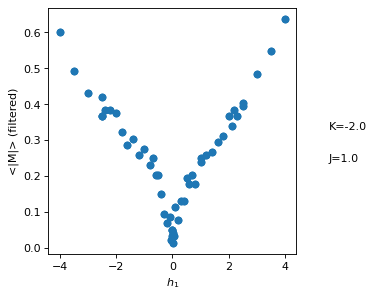

In [10]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-15-23').glob('*')

h1s=[]
avgmags=[]
sdmags=[]
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            mags,avgmag,sdmag=magnetization(resp,filter_E=True)
            h1s.append(paramsarray[1][2])
            avgmags.append(np.abs(avgmag))
            sdmags.append(sdmag)
            
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])

plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi']=80
plt.scatter(h1s,avgmags)
plt.errorbar(h1s,avgmags,yerr=sdmags,fmt='o')
plt.figtext(x=1,y=0.5,s="K="+k2)
plt.figtext(x=1,y=0.4,s="J="+j)
plt.xlabel(r'$h_1$')
plt.ylabel('<|M|> (filtered)')
plt.show()

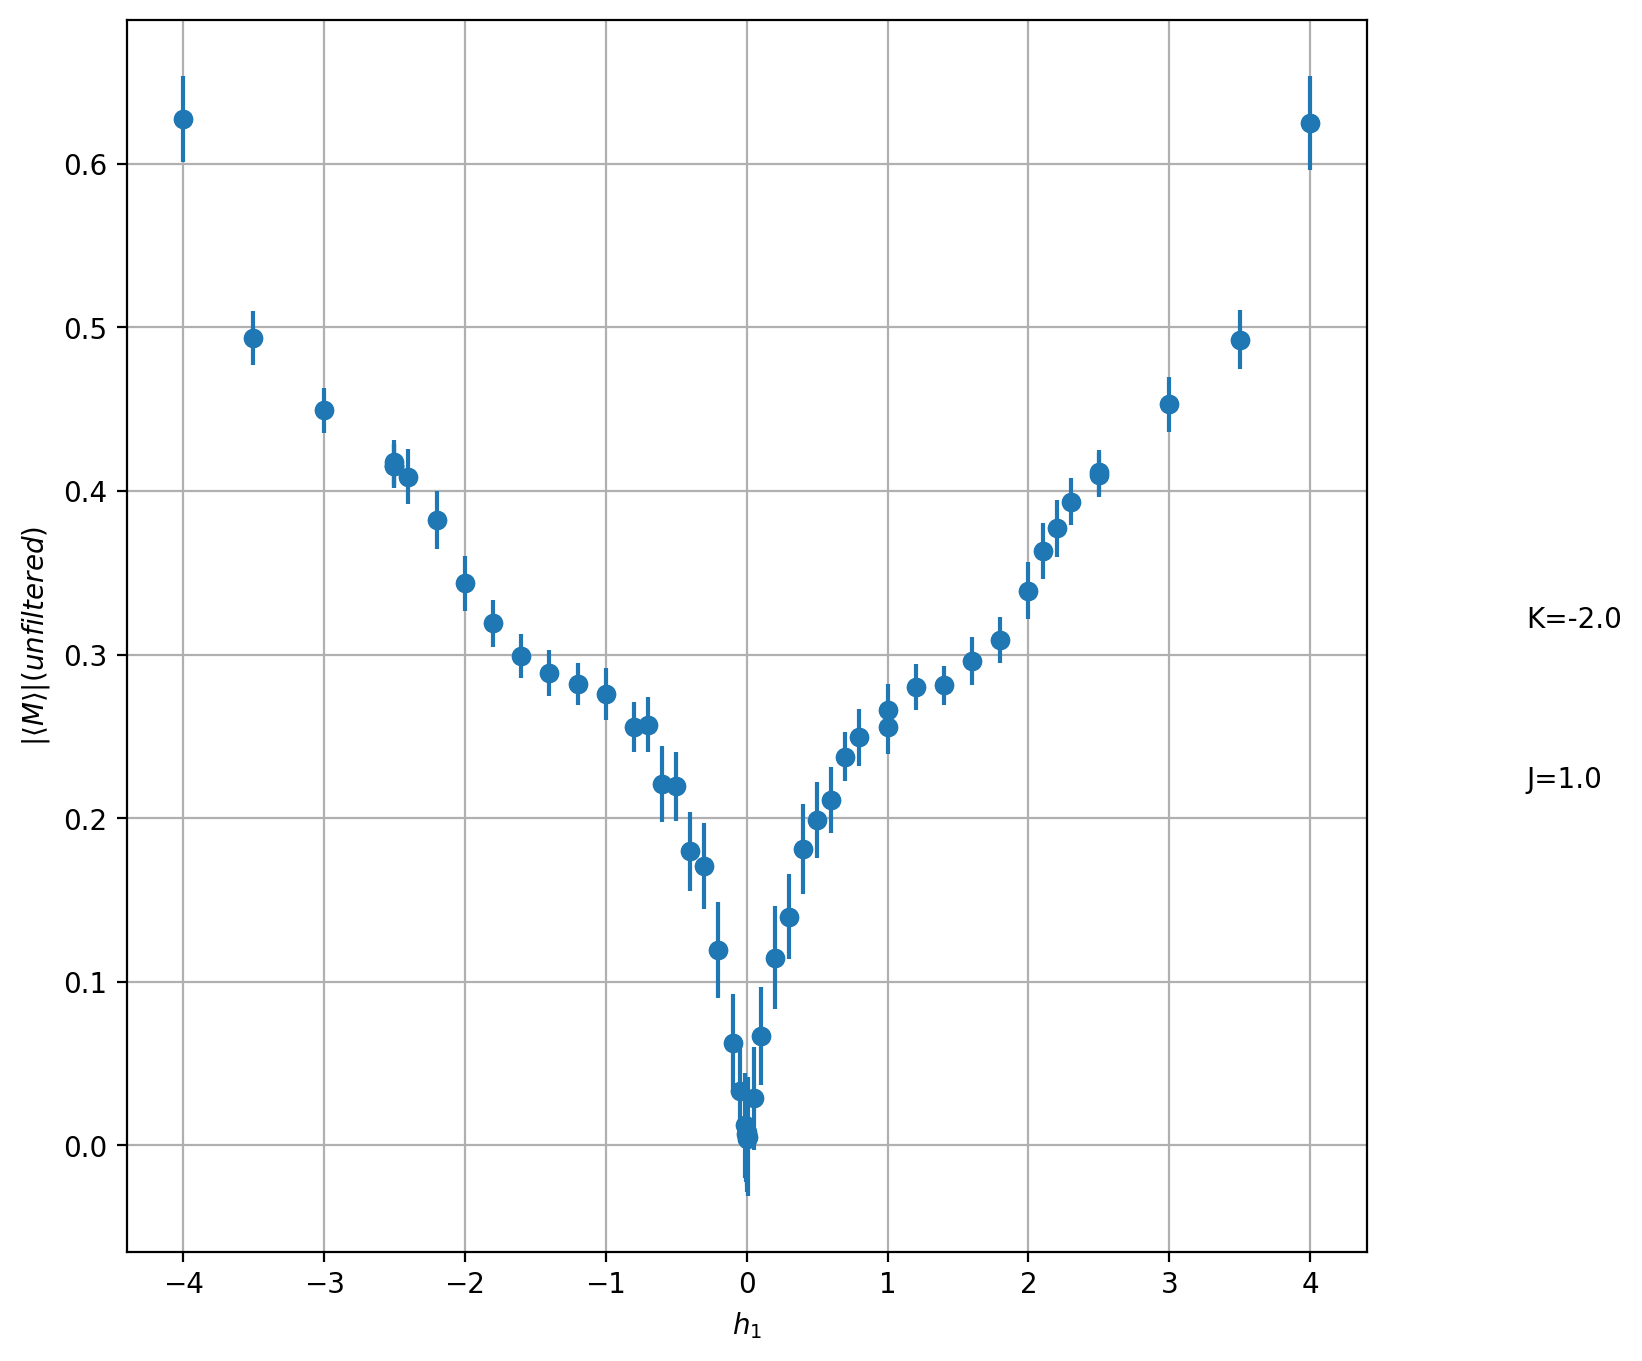

In [11]:
# folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-23-23').glob('*')
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-15-23').glob('*')

h1s=[]
avgmags=[]
sdmags=[]
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            mags,avgmag,sdmag=magnetization(resp,filter_E=False)
            h1s.append(paramsarray[1][2])
            avgmags.append(np.abs(avgmag))
            sdmags.append(sdmag)
            
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])
    


plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=200
plt.scatter(h1s,avgmags)
plt.errorbar(h1s,avgmags,yerr=sdmags,fmt='o')
plt.figtext(x=1.0,y=0.5,s="K="+k2)
plt.figtext(x=1.0,y=0.4,s="J="+j)
plt.grid(True)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ |\langle M \rangle| (unfiltered) $')
plt.show()

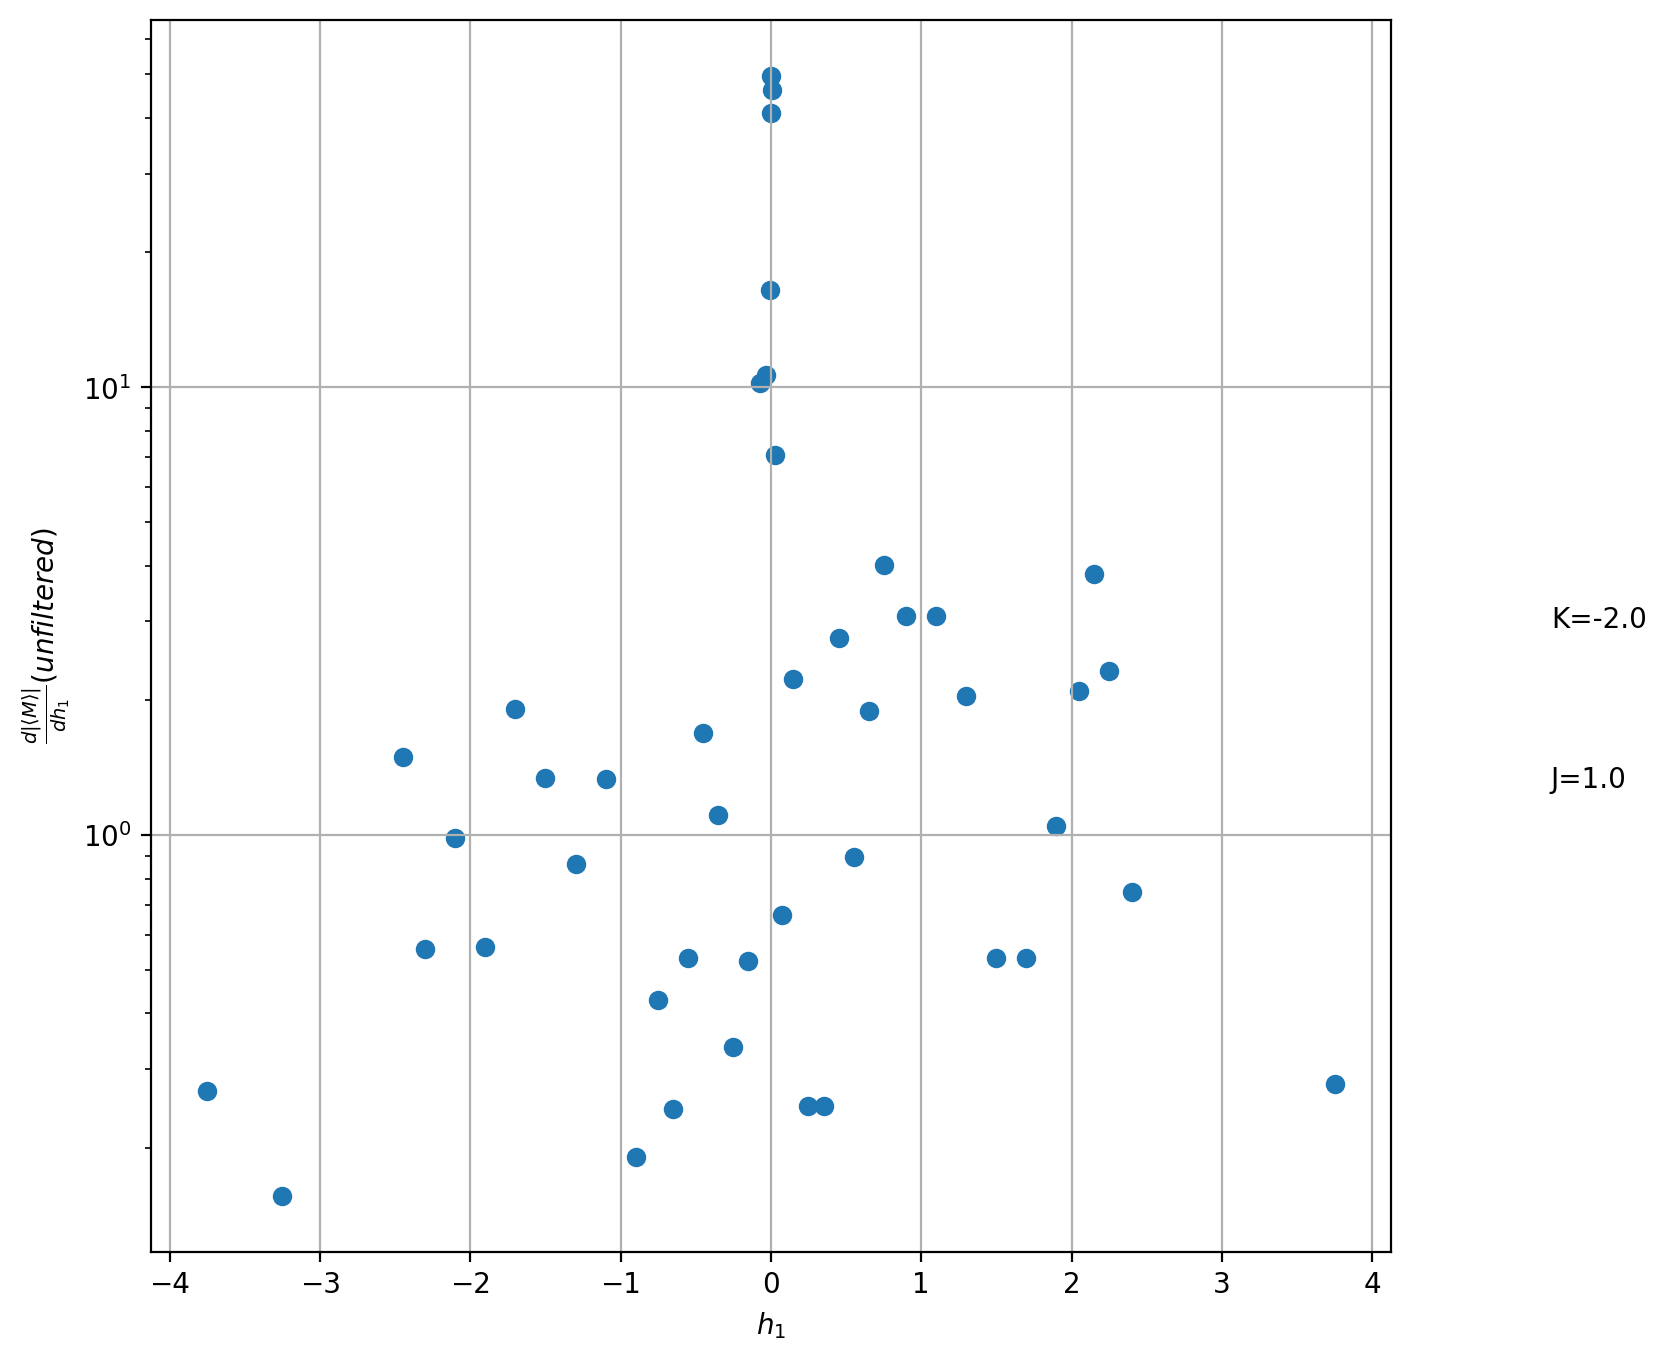

In [12]:
h1scopy=h1s.copy()
h1sord=[]
avgmagsord=[]

cond=0
while cond==0:
    for h1 in h1scopy:
        if h1==min(h1scopy):
            if h1 not in h1sord:
                h1sord.append(h1)
                index=h1scopy.index(h1)
                avgmagsord.append(avgmags[index])
            h1scopy.remove(h1)
    if len(h1scopy)==0:
        cond=1

plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=200
dx=np.diff(h1sord)
dy=np.diff(avgmagsord)
dmdh=dy/dx
h1smid=[(h1sord[i+1] + h1sord[i])/2 for i in range(len(h1sord)-1)]
plt.scatter(h1smid,np.abs(dmdh))
plt.figtext(x=1.0,y=0.5,s="K="+k2)
plt.figtext(x=1.0,y=0.4,s="J="+j)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ \frac{d |\langle M \rangle|}{dh_1} (unfiltered)$')
plt.yscale("log")
plt.grid(True)
plt.show()

# energy

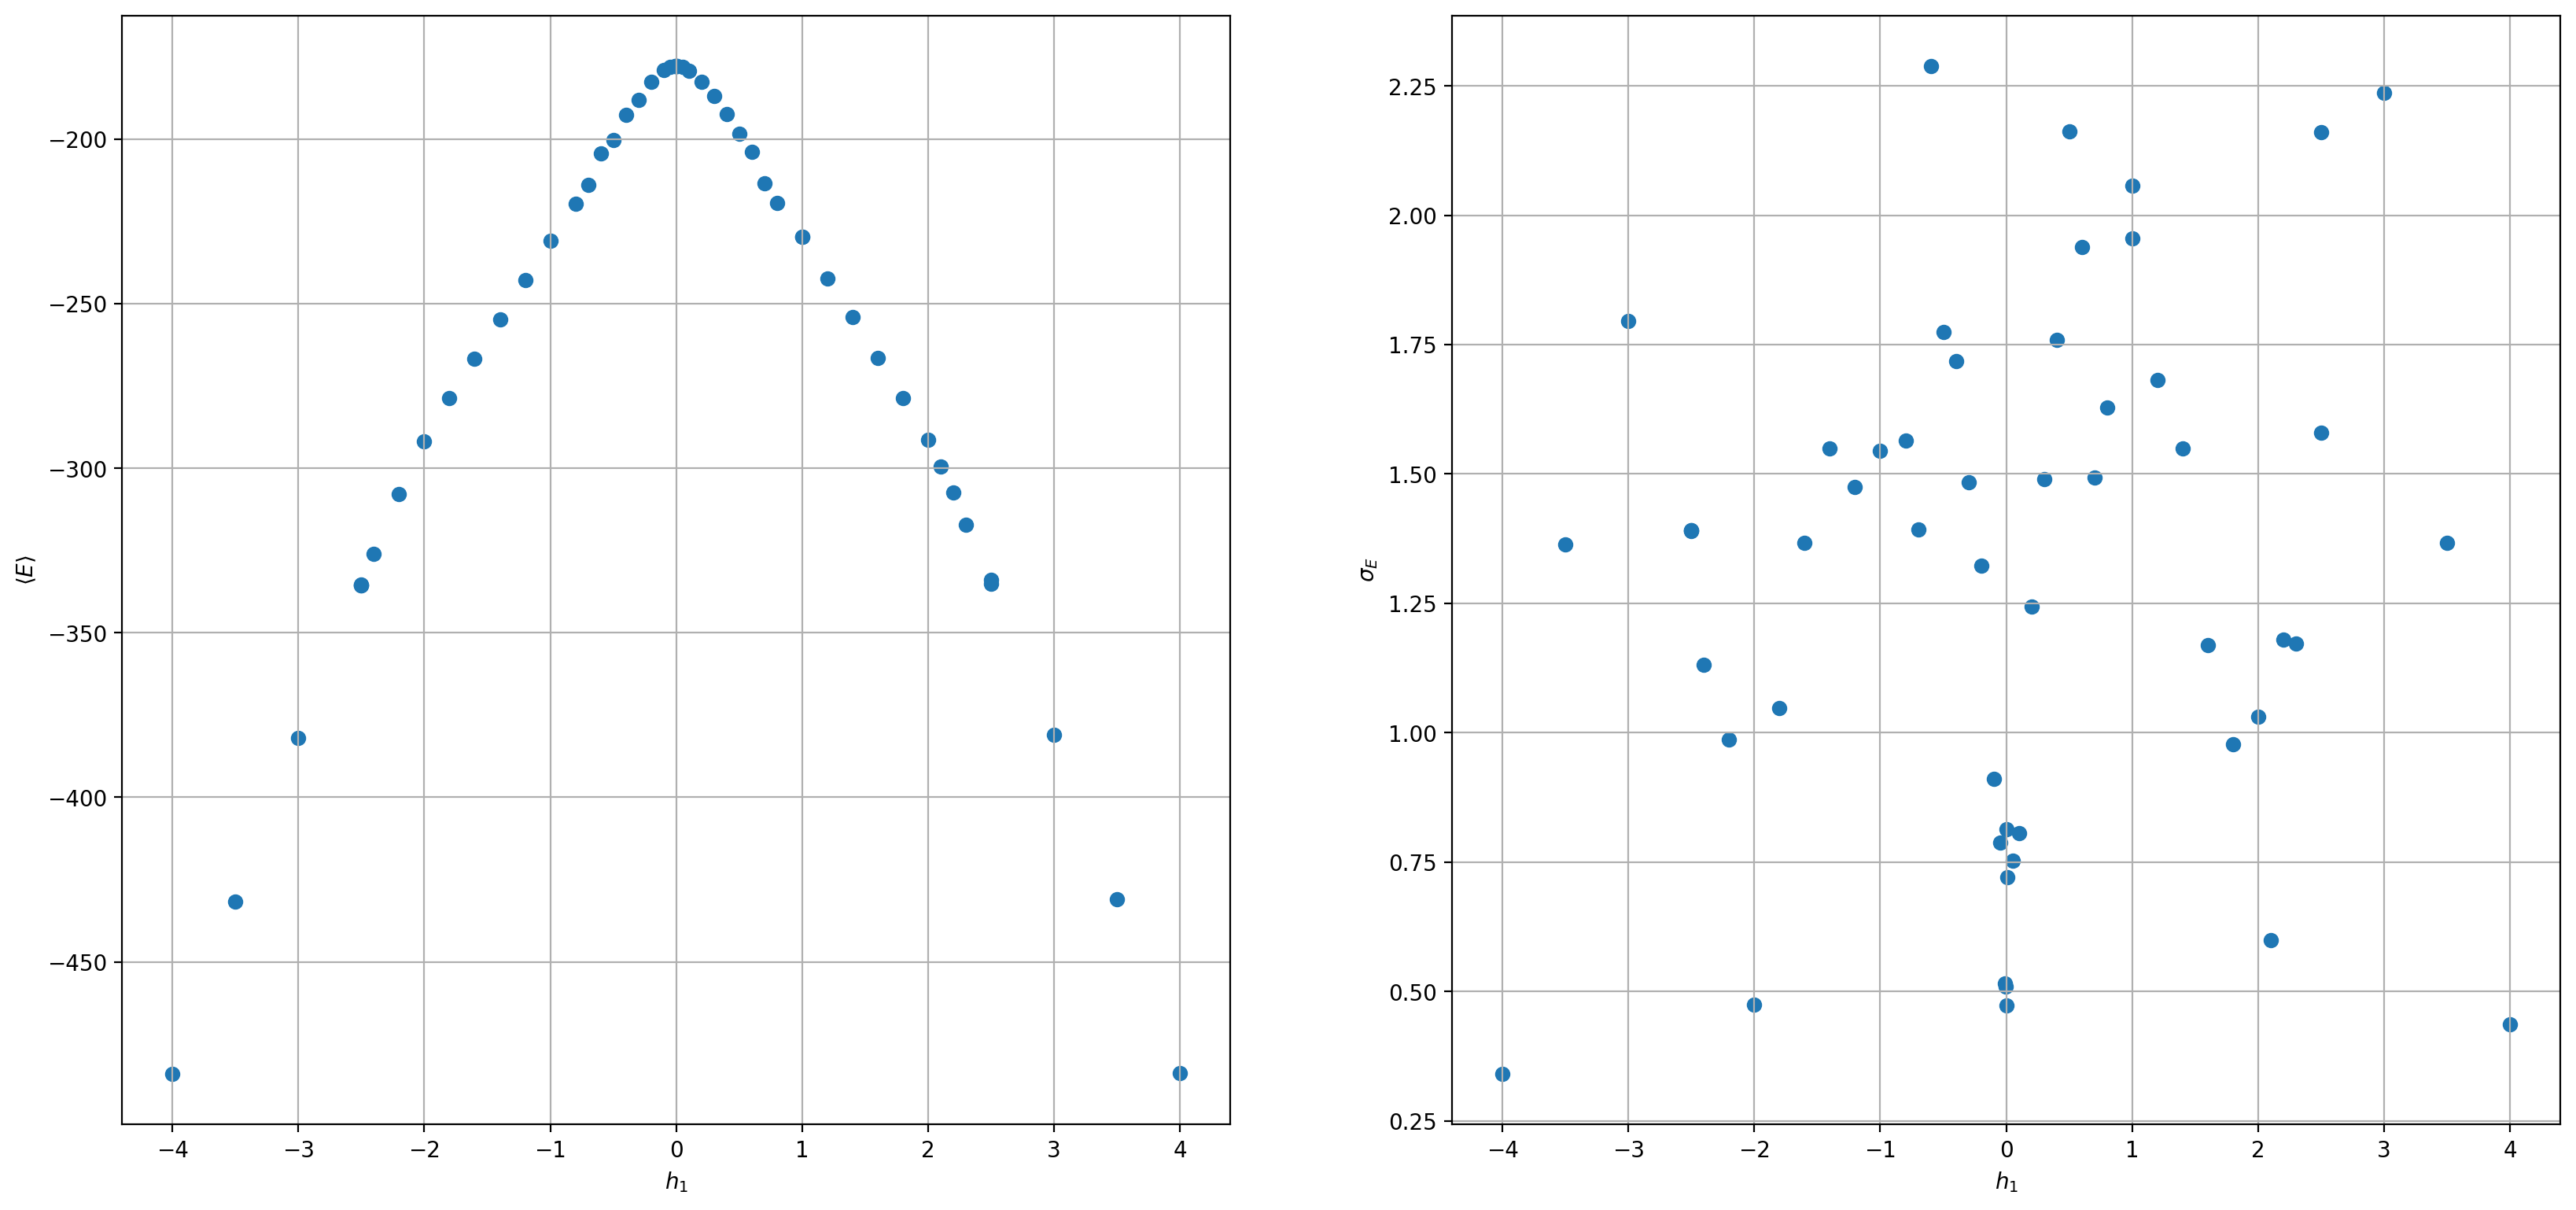

In [13]:
folder = Path(
    '/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-15-23'
).glob('*')

avgEs = []
sdEs = []
h1s = []

for file in folder:
    name = os.path.basename(file)
    if name != 'regs.npz':
        try:
            energies = []
            resp, paramsarray, missingqs, twochains, nodes = open_file(file)
            for i in range(len(resp)):
                E = resp[i][1]
                energies.append(E)
            avgE = np.mean(energies)
            sdE = np.std(energies)
            avgEs.append(avgE)
            sdEs.append(sdE)
            h1s.append(paramsarray[1][2])
            k2 = paramsarray[1][1]
            j = paramsarray[1][0]
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])

fig= plt.figure(figsize = (20,20) )
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


ax1.scatter(h1s,avgEs)
ax1.set_xlabel(r'$h_1$')
ax1.set_ylabel(r'$\langle E \rangle$')
ax1.grid(True)
ax1.set_box_aspect(1)

ax2.scatter(h1s,sdEs)
# ax2.text(x=1,y=0.5,s="K="+k2)
# ax2.text(x=1,y=0.4,s="J="+j)
ax2.set_xlabel(r'$h_1$')
ax2.set_ylabel(r'$\sigma_E$')
ax2.grid(True)
ax2.set_box_aspect(1)

plt.show()


In [14]:
h1s[np.where(sdEs==max(sdEs))[0][0]]

-0.6

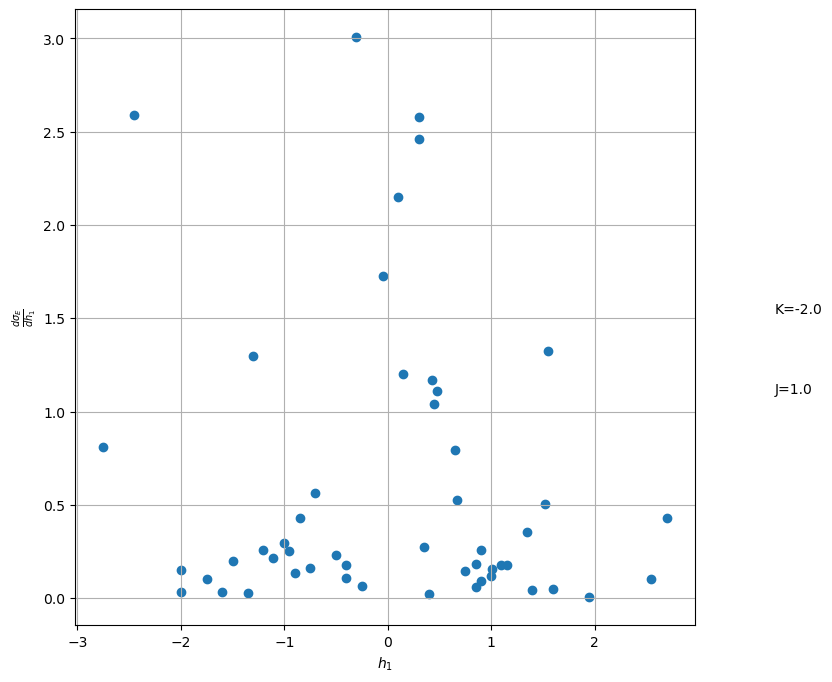

In [15]:
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=100
dx=np.diff(h1s)
dy=np.diff(sdEs)
dsigdh=dy/dx
h1snew=[(h1s[i+1] + h1s[i])/2 for i in range(len(h1s)-1)]
plt.scatter(h1snew,np.abs(dsigdh))
plt.figtext(x=1.0,y=0.5,s="K="+k2)
plt.figtext(x=1.0,y=0.4,s="J="+j)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ \frac{d\sigma_E}{dh_1}$')
plt.grid(True)
plt.show()

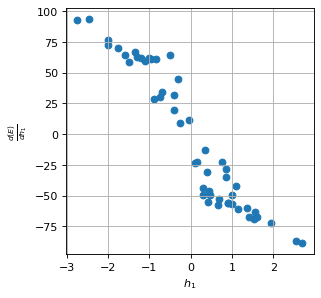

In [16]:
plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi']=80
plt.grid(True)
dx=np.diff(h1s)
dy=np.diff(avgEs)
d=dy/dx
h1snew=[(h1s[i+1] + h1s[i])/2 for i in range(len(h1s)-1)]
plt.scatter(h1snew,d)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ \frac{d \langle E \rangle}{dh_1} $')
plt.show()

# chain breaks

In [17]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-28-23').glob('*')

js=[]
ks=[]
avgbrokens=[]
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            brokens,avgbroken=chain_breaks(resp, twochains, nodes)
            print("j=",paramsarray[1][0],",k=",paramsarray[1][1])
            js.append(paramsarray[1][0])
            ks.append(paramsarray[1][1])
            avgbrokens.append(avgbroken)
            if avgbroken!=0:
                print(avgbroken)
        except ValueError:
            pass
        
joverk=[float(js[i])/float(ks[i]) for i in range(len(js))]

j= 2.0 ,k= -1.5
6.714
j= 1.8 ,k= -2
1.132
j= 1.25 ,k= -1
6.38
j= 0 ,k= -0.4
j= 0.5 ,k= -2.0
0.002
j= 2.0 ,k= -0.6
6.99
j= 1.4 ,k= -2
0.124
j= 1.2 ,k= -2
0.032
j= 1.0 ,k= -2
0.002
j= 1.6 ,k= -2
0.396
j= 1.0 ,k= -0.4
6.986
j= 2.0 ,k= -2
3.03


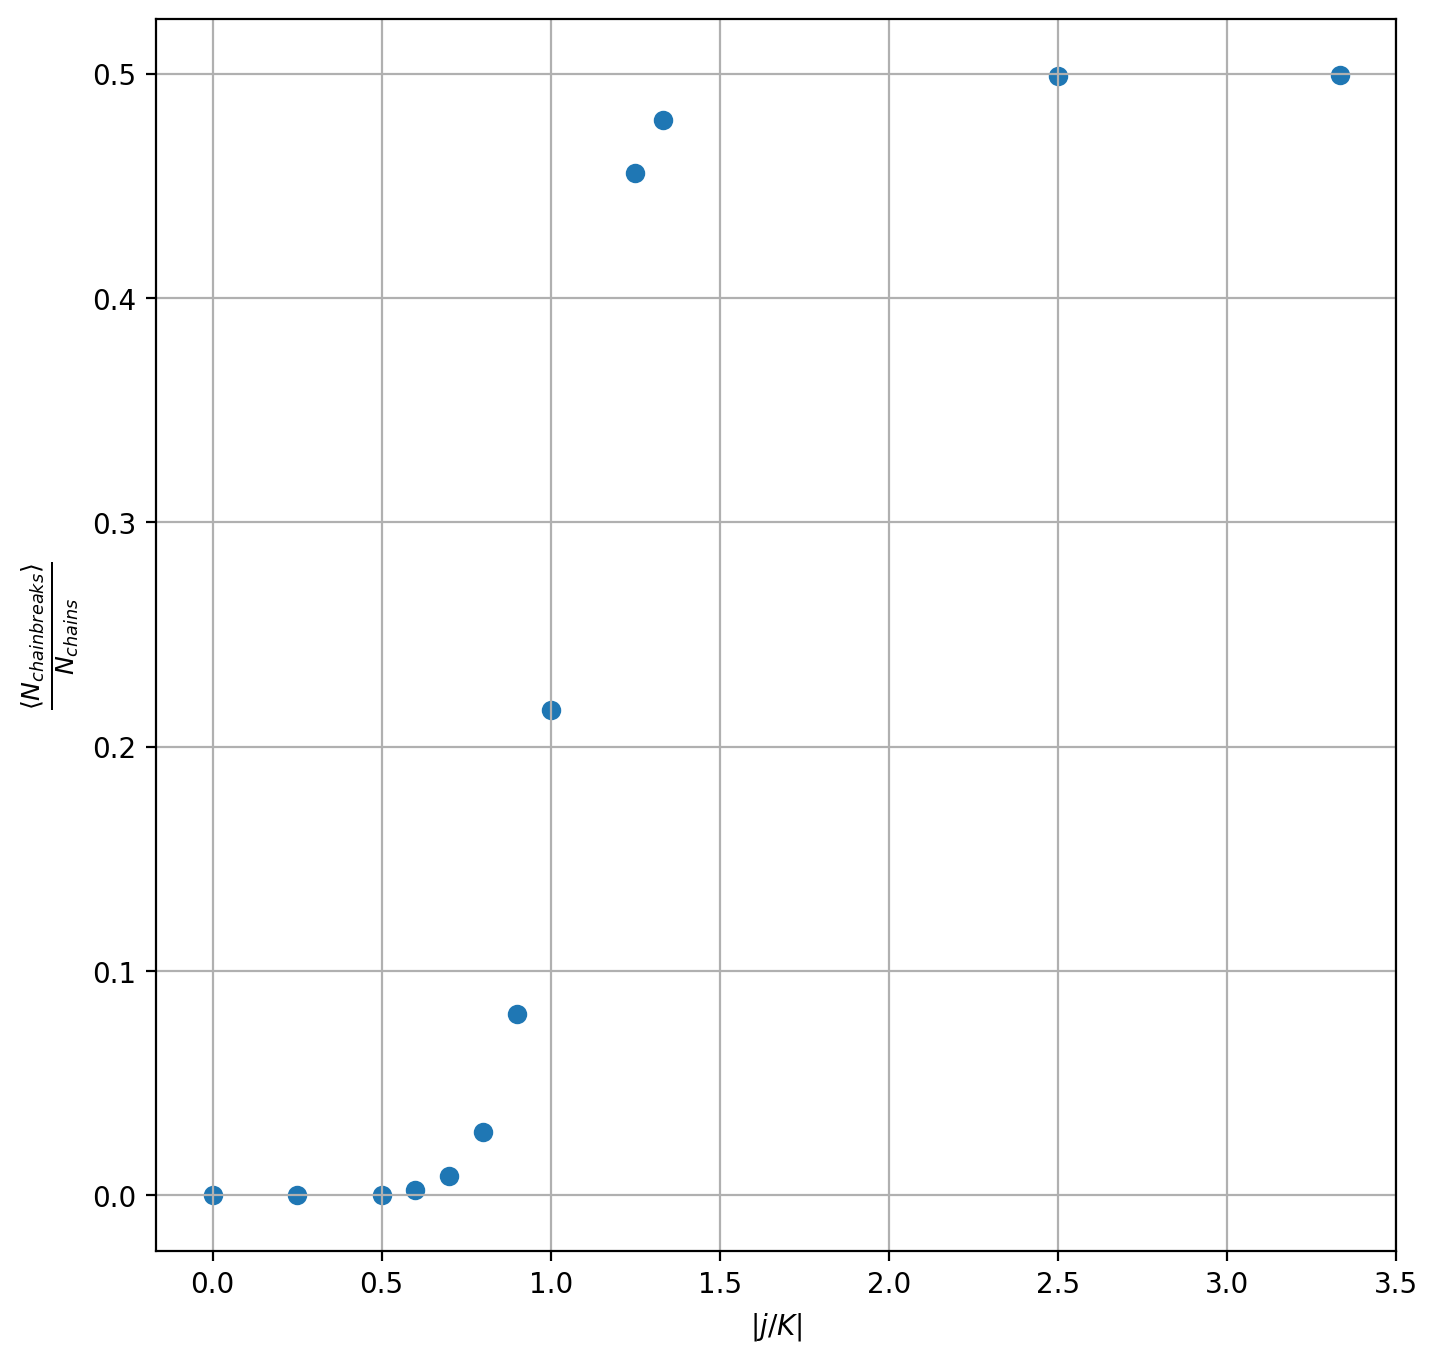

In [18]:
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=200
plt.scatter(np.abs(joverk),[avgbrokens[i]/len(twochains) for i in range(len(avgbrokens))])
# plt.errorbar(h1s,avgmags,yerr=sdmags,fmt='o')
plt.grid(True)
plt.xlabel(r'$ |j/K| $')
plt.ylabel(r'$ \frac {\langle N_{chain breaks} \rangle} {N_{chains}}  $',fontsize=13)
# plt.figtext(s=r'$ N_{chains}= $' + r'${}$'.format(len(twochains)),y=0.5,x=1)
plt.show()         

# order parameter 1 - phi

In [19]:
allhex1nodes=[]
hex1lists=[]
for i in range(len(hex1)):
    hex1lists.append(hex1[i][0])
    for j in hex1[i][0]:
        allhex1nodes.append(j)
allhex2nodes=[]
hex2lists=[]
for i in range(len(hex2)):
    hex2lists.append(hex2[i][0])
    for j in hex2[i][0]:
        allhex2nodes.append(j)
allhex3nodes=[]
hex3lists=[]
for i in range(len(hex3)):
    hex3lists.append(hex3[i][0])
    for j in hex3[i][0]:
        allhex3nodes.append(j)
allhex4nodes=[]
hex4lists=[]
for i in range(len(hex4)):
    hex4lists.append(hex4[i][0])
    for j in hex4[i][0]:
        allhex4nodes.append(j)
allhex5nodes=[]
hex5lists=[]
for i in range(len(hex5)):
    hex5lists.append(hex5[i][0])
    for j in hex5[i][0]:
        allhex5nodes.append(j)

allhexnodes=list(set(allhex1nodes+allhex2nodes+allhex3nodes+allhex4nodes+allhex5nodes))
#a list of all hex lists. each hex list has the nodes starting from the top of the hex, clockwise
allhexlist=hex1lists+hex2lists+hex3lists+hex4lists+hex5lists

In [20]:
twochainnodes=[]
for chain in twochains:
    twochainnodes.append(chain[0])
    twochainnodes.append(chain[1])    
twochainnodes=list(set(twochainnodes))
len(twochainnodes)

bounds=[]
for node in nodes:
    if node not in allhexnodes:
        if node not in twochainnodes:
            if node not in missingqs:
                bounds.append(node)
bounds

[23, 16]

In [21]:
abc=[]
for i in range(len(allhexlist)):
    abc.append(['a','b','c','a','b','c'])

a=[]
b=[]
c=[]
for i in range(len(allhexlist)):
    hexa=allhexlist[i]
    for j in range(len(hexa)):
        node=hexa[j]
        letter=abc[i][j]
        if letter=='a':
            a.append(node)
        if letter=='b':
            b.append(node)
        if letter=='c':
            c.append(node)

a=list(set(a))
b=list(set(b))
c=list(set(c))

In [22]:
len(allhexlist)

56

In [23]:
len(allhexnodes)

206

In [24]:
len(a+b+c)

206

In [25]:
len(nodes)-len(twochainnodes)

193

In [26]:
count=0
for node in nodes:
    if node not in allhexnodes:
        print(node)
        count+=1
print("")
print(count)

23
30
543
541
16
93
159
216
252
255
286
350
351
412
472
511

16


In [27]:
# count=0
# for node in [tup[0] for tup in twochains]+[tup[1] for tup in twochains]:
#     if node not in allhexnodes:
#         print(node)
#         count+=1
# print(count)

In [28]:
omega=np.exp(2*1j*np.pi/3)

In [29]:
for node in (a+b+c):
    if node not in nodes:
        print(node)

151.0


In [30]:
# for node in allhex3nodes:
#     checkabc(node)

In [31]:
#all of the nodes, period
for node in nodes:
    #all nodes that are contained in a hexagon
    if node not in allhexnodes:
        #nodes that are contained in a twochain
        if node not in twochainnodes:
            print(node)
            #these nodes are neither in a hexagon nor in a twochain.
            #these are the two I have already left out

23
16


In [32]:
len(allhexnodes)==len(a+b+c)

True

In [33]:
#yet,
print(len(a))
print(len(b))
print(len(c))

72
67
67


# order parameter 2 - phi

In [34]:
alltri1nodes=[]
tri1lists=[]
for i in range(len(tri1)):
    tri1lists.append(tri1[i][0])
    for j in tri1[i][0]:
        alltri1nodes.append(j)
alltri4nodes=[]
tri4lists=[]
for i in range(len(tri4)):
    tri4lists.append(tri4[i][0])
    for j in tri4[i][0]:
        alltri4nodes.append(j)
alltri5nodes=[]
tri5lists=[]
for i in range(len(tri5)):
    tri5lists.append(tri5[i][0])
    for j in tri5[i][0]:
        alltri5nodes.append(j)
alltri7nodes=[]
tri7lists=[]
for i in range(len(tri7)):
    tri7lists.append(tri7[i][0])
    for j in tri7[i][0]:
        alltri7nodes.append(j)
alltri9nodes=[]
tri9lists=[]
for i in range(len(tri9)):
    tri9lists.append(tri9[i][0])
    for j in tri9[i][0]:
        alltri9nodes.append(j)
        
alltrinodes=list(set(alltri1nodes+alltri4nodes+alltri5nodes+alltri7nodes+alltri9nodes))
#a list of all: right pointing triangle lists (layer1) and left pointing triangle lists (layer2) 
#each tri list has the nodes starting from the top of the triangle, clockwise (layer1), counterclockwise (layer2)
alltrilist=tri1lists+tri4lists+tri5lists+tri7lists+tri9lists

In [35]:
bounds=[]
for node in nodes:
    if node not in alltrinodes:
        if node not in twochainnodes:
            if node not in missingqs:
                bounds.append(node)
# bounds

In [36]:
pqr=[]
for i in range(len(alltrilist)):
    pqr.append(['p','q','r'])

p=[]
q=[]
r=[]
for i in range(len(alltrilist)):
    tri=alltrilist[i]
    for j in range(len(tri)):
        node=tri[j]
        letter=pqr[i][j]
        if letter=='p':
            p.append(node)
        if letter=='q':
            q.append(node)
        if letter=='r':
            r.append(node)

p=list(set(p))
q=list(set(q))
r=list(set(r))

In [37]:
print(len(p))
print(len(q))
print(len(r))

56
56
56


In [38]:
p_vals=[]
for qubit in p:
    index=np.where(nodes==qubit)[0][0]
    pm=(resp[0][0][index]+1)/2
    p_vals.append(pm)
p_sum=sum(p_vals)
q_vals=[]
for qubit in q:
    index=np.where(nodes==qubit)[0][0]
    pm=(resp[0][0][index]+1)/2
    q_vals.append(pm)
q_sum=sum(q_vals)
r_vals=[]
for qubit in p:
    index=np.where(nodes==qubit)[0][0]
    pm=(resp[0][0][index]+1)/2
    r_vals.append(pm)
r_sum=sum(r_vals)

phi=(3/56)*(p_sum)+omega*q_sum+omega**2*r_sum

In [39]:
np.abs(omega**2)

1.0

In [40]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-23-23').glob('*')

nodes=sorted(nodes)

h1s=[]
avg_phi_abs=[]
sds=[]
avg_phi_reals=[]
avg_phi_imags=[]
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1s.append(paramsarray[1][2])
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
            
            phis=[]
            phis_abs=[]
            phi_reals=[]
            phi_imags=[]
            for i in range(len(resp)):
                p_vals=[]
                for qubit in p:
                    index=np.where(nodes==qubit)[0][0]
#                     pm=(resp[i][0][index]+1)/2
                    pm=resp[i][0][index]
                    p_vals.append(pm)
                p_sum=sum(p_vals)
                q_vals=[]
                for qubit in q:
                    index=np.where(nodes==qubit)[0][0]
#                     pm=(resp[i][0][index]+1)/2
                    pm=resp[i][0][index]
                    q_vals.append(pm)
                q_sum=sum(q_vals)
                r_vals=[]
                for qubit in p:
                    index=np.where(nodes==qubit)[0][0]
#                     pm=(resp[i][0][index]+1)/2
                    pm=resp[i][0][index]
                    r_vals.append(pm)
                r_sum=sum(r_vals)

                phi=(3/56)*(
                    p_sum+
                    omega*q_sum+
                    (omega**2)*r_sum
                              )
                
                phi_abs=np.real(phi)**2+np.imag(phi)**2
                phis.append(phi)
                phi_reals.append(np.real(phi))
                phi_imags.append(np.imag(phi))
                phis_abs.append(phi_abs)
              
            #take norm before average
            avg_phi_abs.append(np.mean(phis_abs))
            avg_phi_reals.append(np.mean(phi_reals))
            avg_phi_imags.append(np.mean(phi_imags))
            sds.append(np.std(phis_abs))
            #take norm after average
            
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])
    

  

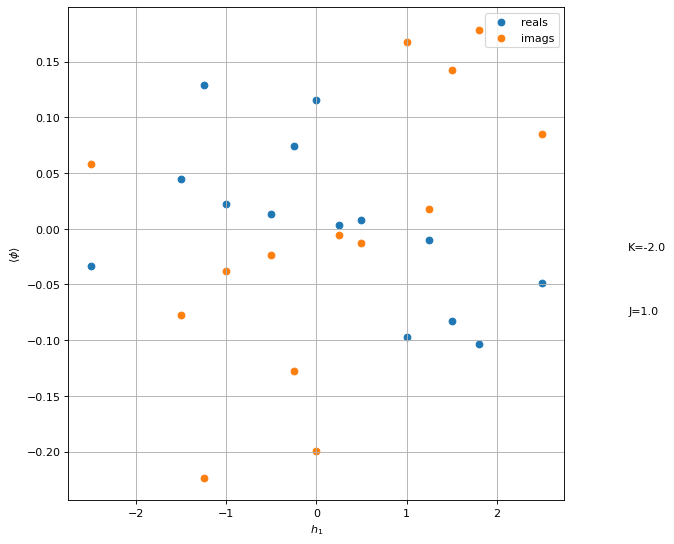

In [41]:
  
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=80
plt.scatter(h1s,avg_phi_reals,label='reals')
plt.scatter(h1s,avg_phi_imags,label='imags')
# plt.errorbar(h1s,avg_phi_abs,yerr=sds,fmt='o')
plt.figtext(x=1,y=0.5,s="K="+k2)
plt.figtext(x=1,y=0.4,s="J="+j)
plt.xlabel(r'$h_1$')
plt.ylabel(r'$ \langle \phi \rangle $')
plt.legend()
plt.grid(True)
plt.show() 

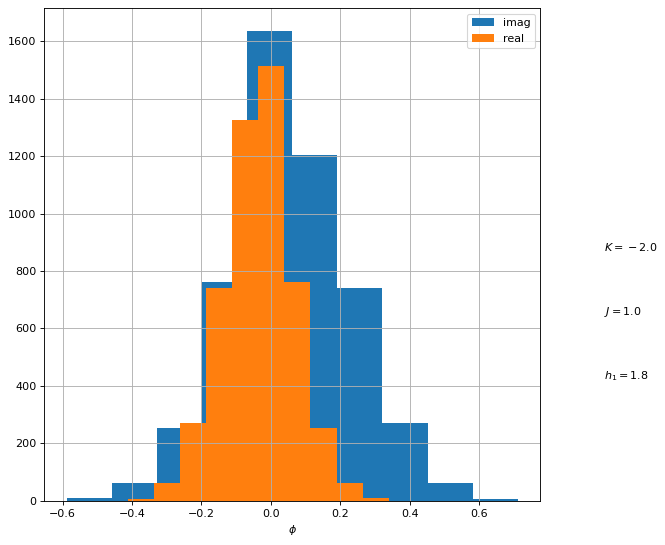

In [42]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-23-23').glob('*')

phi_abs_list=[]
phi_real = []
phi_imag=[]
phis=[]

for file in folder:
    name=os.path.basename(file)
    
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1=paramsarray[1][2]
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
            if h1=='1.8':
                h1val=h1
                for i in range(len(resp)):
                    p_vals=[]
                    for qubit in p:
                        index=np.where(nodes==qubit)[0][0]
    #                     pm=(resp[i][0][index]+1)/2
                        pm=resp[i][0][index]
                        p_vals.append(pm)
                    p_sum=sum(p_vals)
                    q_vals=[]
                    for qubit in q:
                        index=np.where(nodes==qubit)[0][0]
    #                     pm=(resp[i][0][index]+1)/2
                        pm=resp[i][0][index]
                        q_vals.append(pm)
                    q_sum=sum(q_vals)
                    r_vals=[]
                    for qubit in p:
                        index=np.where(nodes==qubit)[0][0]
    #                     pm=(resp[i][0][index]+1)/2
                        pm=resp[i][0][index]
                        r_vals.append(pm)
                    r_sum=sum(r_vals)

                    phi=(1/56)*(
                        p_sum+
                        omega*q_sum+
                        omega**2*r_sum
                                  )
                    phis.append(phi)
                    phi_abs=np.abs(phi)
                    phi_abs_list.append(phi_abs)
                    phi_real.append(np.real(phi))
                    phi_imag.append(np.imag(phi))
                    
        except ValueError:
            pass
        
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=80
plt.hist(phi_imag, label='imag')
plt.hist(phi_real, label='real')
plt.figtext(x=1,y=0.5,s=r'$K={}$'.format(k2))
plt.figtext(x=1,y=0.4,s=r'$J={}$'.format(j))
plt.figtext(x=1,y=0.3,s=r'$h_1={}$'.format(h1val))
plt.xlabel(r'$\phi$')
plt.legend()
plt.grid(True)
plt.show() 

In [43]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-23-23').glob('*')

for file in folder:
    name=os.path.basename(file)
    
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            print(len(resp[0][0]))
        except ValueError:
            pass

221
221
221
221
221
221
221
221
221
221
221
221
221
221


In [44]:
resp=2*np.random.randint(2,size=len(resp[0][0]))-np.ones(len(resp[0][0]))

In [45]:
phi_avg = []

for i in range(1000):
    #resp=2*np.random.randint(2,size=228)-np.ones(228)
    resp=np.ones(228)
    for j in range(228):
        if np.random.rand() < 1/3:
            resp[j] = -1
    p_vals=[]
    for qubit in p:
        index=np.where(nodes==qubit)
    #                     pm=(resp[i][0][index]+1)/2
        pm=resp[index]
        p_vals.append(pm)
    p_sum=sum(p_vals)
    q_vals=[]
    for qubit in q:
        index=np.where(nodes==qubit)
    #                     pm=(resp[i][0][index]+1)/2
        pm=resp[index]
        q_vals.append(pm)
    q_sum=sum(q_vals)
    r_vals=[]
    for qubit in p:
        index=np.where(nodes==qubit)
    #                     pm=(resp[i][0][index]+1)/2
        pm=resp[index]
        r_vals.append(pm)
    r_sum=sum(r_vals)

    phi=(1/56)*(
        p_sum+
        omega*q_sum+
        omega**2*r_sum
    )
    phi_avg.append(phi)

In [46]:
np.mean(phi_avg)

(0.0034999999999998825-0.006062177826490958j)

In [47]:
phi_avg[0]

array([-0.03571429+0.06185896j])

# order parameter 3 - triangle magnetization

This order parameter should tell us whether every triangle has an {up,down,down} or {down,up,up} state (regardless of chirality)

In [48]:
# folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-23-23').glob('*')
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/02-15-23').glob('*')
h1s=[]
avgmags=[]
sds=[]

for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1s.append(paramsarray[1][2])
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
            
            
            trimeans_h1=[]
            for i in range(len(resp)):
                arr=resp[i][0]
                trimeans=[]
                for tri in alltrilist:
                    tripms=[]           
                    for qubit in tri:
                        index=np.where(nodes==qubit)[0][0]
                        tripms.append(arr[index])
                    #for each triangle in the lattice, average the sites and add it to the list
                    avg_over_tri=np.mean(tripms)
                    trimeans.append(avg_over_tri)
                #after doing all the triangles for a run, there should be 56 means (56 triangles)
                #average these and add to this list
                avg_over_alltris=np.mean(trimeans)
                trimeans_h1.append(avg_over_alltris)
            #after doing all the runs, there should be N_runs values
            #average these and add to this list
            avgmags.append(np.abs(np.mean(trimeans_h1)))
            # ^this is a list of:
            #the average over all triangles in the lattice, and then over all runs, and then  
            sds.append(np.std(trimeans_h1))

            
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])
    

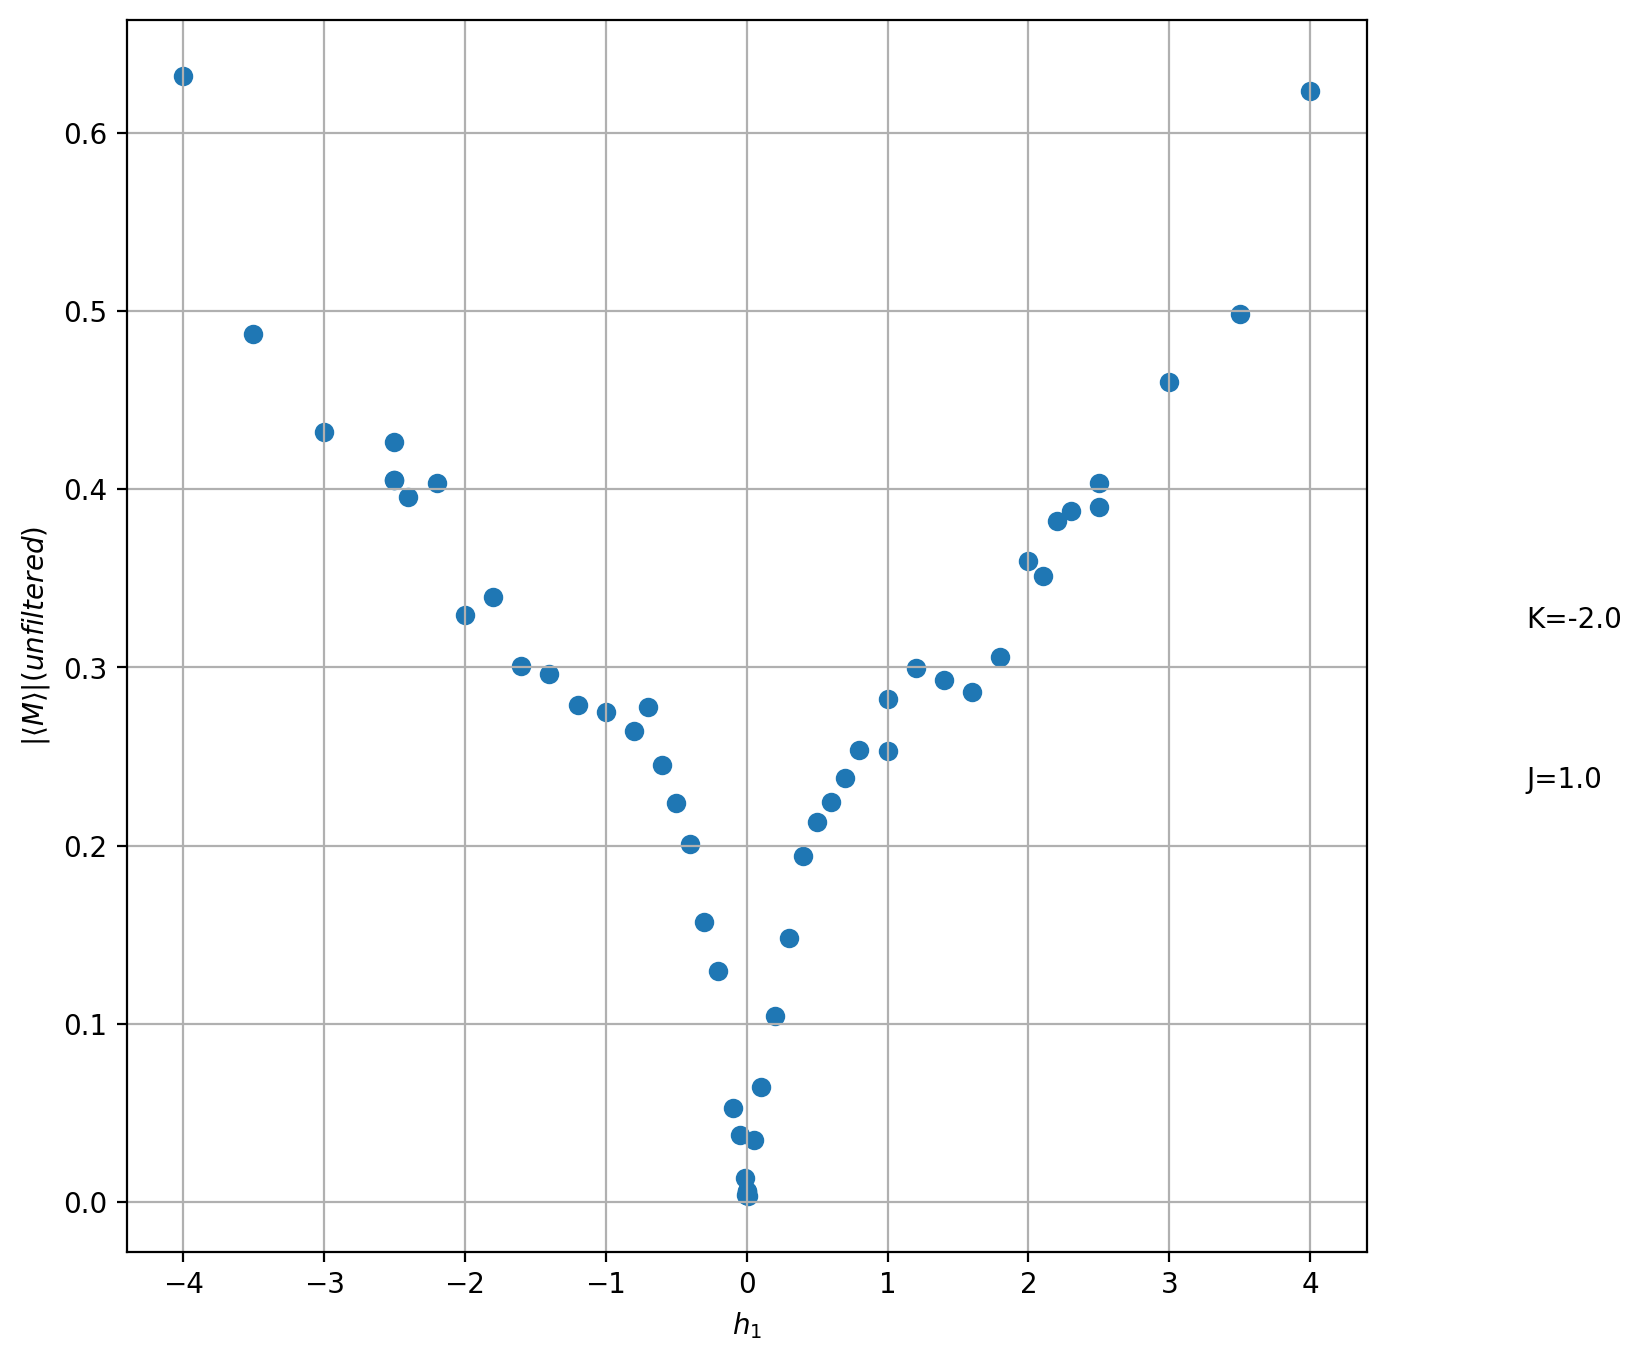

In [49]:
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=200
plt.scatter(h1s,avgmags)
# plt.errorbar(h1s,avgmags,yerr=sds,fmt='o')
plt.figtext(x=1.0,y=0.5,s="K="+k2)
plt.figtext(x=1.0,y=0.4,s="J="+j)
plt.grid(True)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ |\langle M \rangle| (unfiltered) $')
plt.show()

In [50]:
len(h1s)

52

In [51]:
h1scopy=h1s.copy()
h1sord=[]
avgmagsord=[]

cond=0
while cond==0:
    for h1 in h1scopy:
        if h1==min(h1scopy):
            if h1 not in h1sord:
                h1sord.append(h1)
                index=h1scopy.index(h1)
                avgmagsord.append(avgmags[index])
            h1scopy.remove(h1)
    if len(h1scopy)==0:
        cond=1

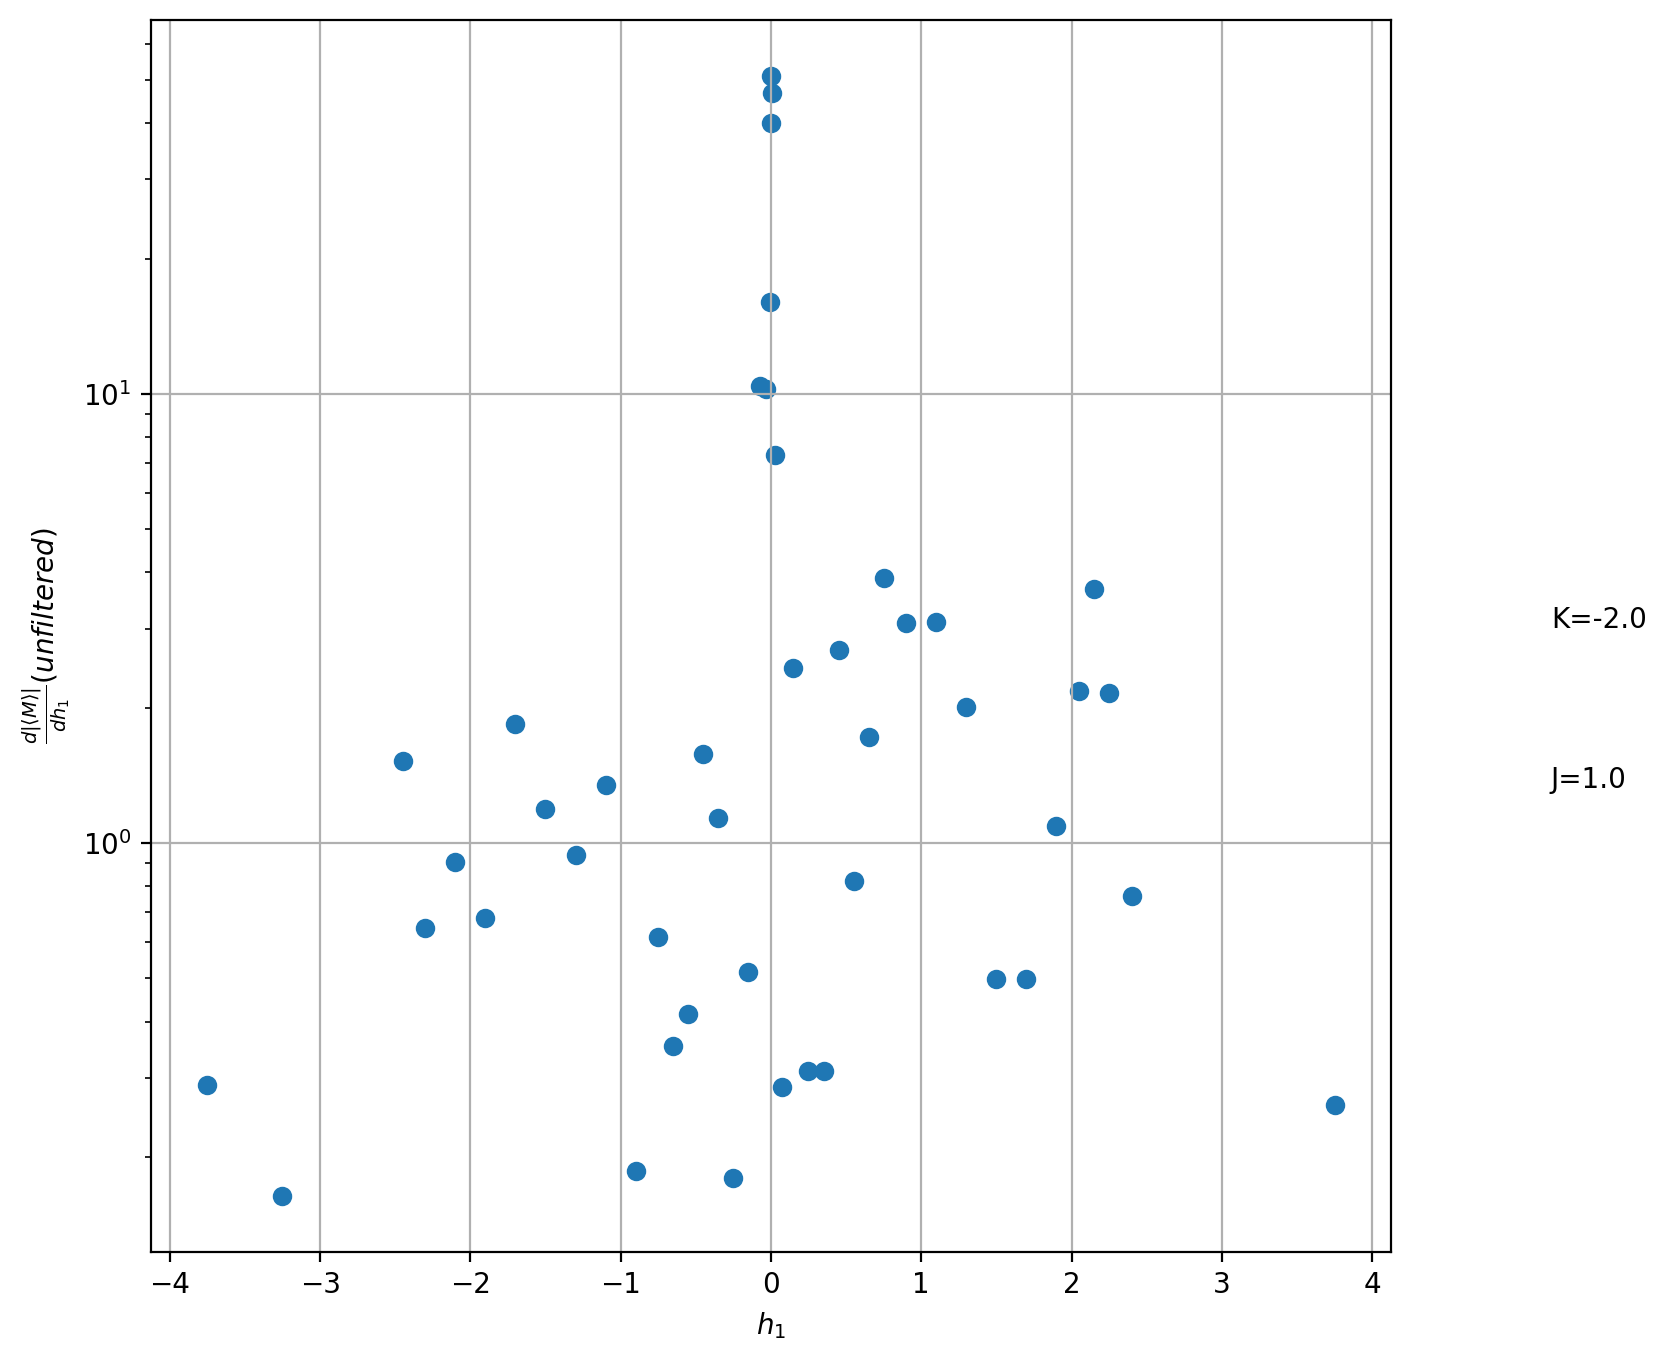

In [52]:
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=200
dx=np.diff(h1sord)
dy=np.diff(avgmagsord)
dmdh=dy/dx
h1smid=[(h1sord[i+1] + h1sord[i])/2 for i in range(len(h1sord)-1)]
plt.scatter(h1smid,np.abs(dmdh))
plt.figtext(x=1.0,y=0.5,s="K="+k2)
plt.figtext(x=1.0,y=0.4,s="J="+j)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ \frac{d| \langle M \rangle|}{dh_1} (unfiltered)$')
plt.yscale("log")
plt.grid(True)
plt.show()

# phase diagram

In [53]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-02-23--12').glob('*')
h1s=[]
slist=[]
avgmags=[]
sds=[]

for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1s.append(paramsarray[1][2])
            slist.append(paramsarray[1][4])
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
            print(paramsarray[1][2],paramsarray[1][4])
            
            
            trimeans_h1=[]
            for i in range(len(resp)):
                arr=resp[i][0]
                trimeans=[]
                for tri in alltrilist:
                    tripms=[]           
                    for qubit in tri:
                        index=np.where(nodes==qubit)[0][0]
                        tripms.append(arr[index])
                    #for each triangle in the lattice, average the sites and add it to the list
                    avg_over_tri=np.mean(tripms)
                    trimeans.append(avg_over_tri)
                #after doing all the triangles for a run, there should be 56 means (56 triangles)
                #average these and add to this list
                avg_over_alltris=np.mean(trimeans)
                trimeans_h1.append(avg_over_alltris)
            #after doing all the runs, there should be N_runs values
            #average these and add to this list
            avgmags.append(np.mean(trimeans_h1))
            # ^this is a list of:
            #the average over all triangles in the lattice, and then over all runs, and then  
            sds.append(np.std(trimeans_h1))

            
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])
for i in range(len(slist)):
    slist[i]=float(slist[i])
    

-3.2 0.765
-0.3999999999999999 0.0
2.8000000000000007 0.6749999999999999
-3.2 0.63
2.0 0.36
-1.5999999999999996 0.0
1.2000000000000002 0.8099999999999999
-2.0 0.765
-1.1999999999999997 0.40499999999999997
-2.8 0.72
-0.7999999999999998 0.40499999999999997
-1.5999999999999996 0.135
0.40000000000000036 0.54
0.8000000000000007 0.9
2.4000000000000004 0.8099999999999999
2.0 0.315
3.2 0.22499999999999998
-3.2 0.54
-3.2 0.495
-4.0 0.0
-2.0 0.045
2.0 0.72
2.0 0.135
-4.0 0.27
-1.1999999999999997 0.8099999999999999
0.0 0.22499999999999998
0.40000000000000036 0.6749999999999999
-4.0 0.54
0.8000000000000007 0.0
-3.2 0.27
0.40000000000000036 0.855
-2.0 0.18
2.8000000000000007 0.135
-3.2 0.0
-4.0 0.22499999999999998
0.40000000000000036 0.09
2.8000000000000007 0.315
-0.7999999999999998 0.765
-2.8 0.495
-2.0 0.44999999999999996
-1.1999999999999997 0.585
1.6000000000000005 0.44999999999999996
-3.2 0.8099999999999999
2.4000000000000004 0.045
-1.5999999999999996 0.63
-1.5999999999999996 0.54
-2.8 0.36
-2.

-4.0 0.72
3.2 0.09
0.40000000000000036 0.18
3.6000000000000005 0.315
0.40000000000000036 0.045
1.2000000000000002 0.09
0.40000000000000036 0.22499999999999998
-2.4 0.36
-3.6 0.36
-0.7999999999999998 0.495
-3.6 0.27
0.8000000000000007 0.6749999999999999
-3.6 0.22499999999999998
2.4000000000000004 0.22499999999999998
-2.0 0.6749999999999999
-3.2 0.315
-1.1999999999999997 0.9
3.6000000000000005 0.6749999999999999
-3.6 0.495
4.0 0.0
3.2 0.8099999999999999
-2.8 0.44999999999999996
-1.1999999999999997 0.135
-3.6 0.765
-1.1999999999999997 0.54
0.8000000000000007 0.8099999999999999
-0.7999999999999998 0.9
-0.7999999999999998 0.44999999999999996
1.2000000000000002 0.495
-2.0 0.09
-3.6 0.9
4.0 0.9
-3.6 0.72
1.6000000000000005 0.765
2.0 0.18
3.6000000000000005 0.765
2.0 0.9
-1.1999999999999997 0.27
2.0 0.765
-3.2 0.045
-1.5999999999999996 0.9
-0.7999999999999998 0.09
-1.5999999999999996 0.72
0.8000000000000007 0.36
-0.7999999999999998 0.315
-0.7999999999999998 0.0
2.0 0.27
-3.6 0.0
2.0 0.22499999

In [54]:
from scipy.interpolate import griddata
from matplotlib import cm

N = 1600
X = np.array(slist)
Y = np.array(h1s)
Z = np.array(sds)

# nx = int(np.sqrt(N))
# xg = np.linspace(X.min(), X.max(), nx)
# yg = np.linspace(Y.min(), Y.max(), nx)
# xgrid, ygrid = np.meshgrid(xg, yg)
# ctr_f = griddata((X, Y), Z, (xgrid, ygrid), method='linear')
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1) 
# u = ax.contourf(xgrid, ygrid, ctr_f, cmap=cm.coolwarm)
# fig.colorbar(u)

# plt.show()

In [55]:
plt.plot(h1s, avgmags)

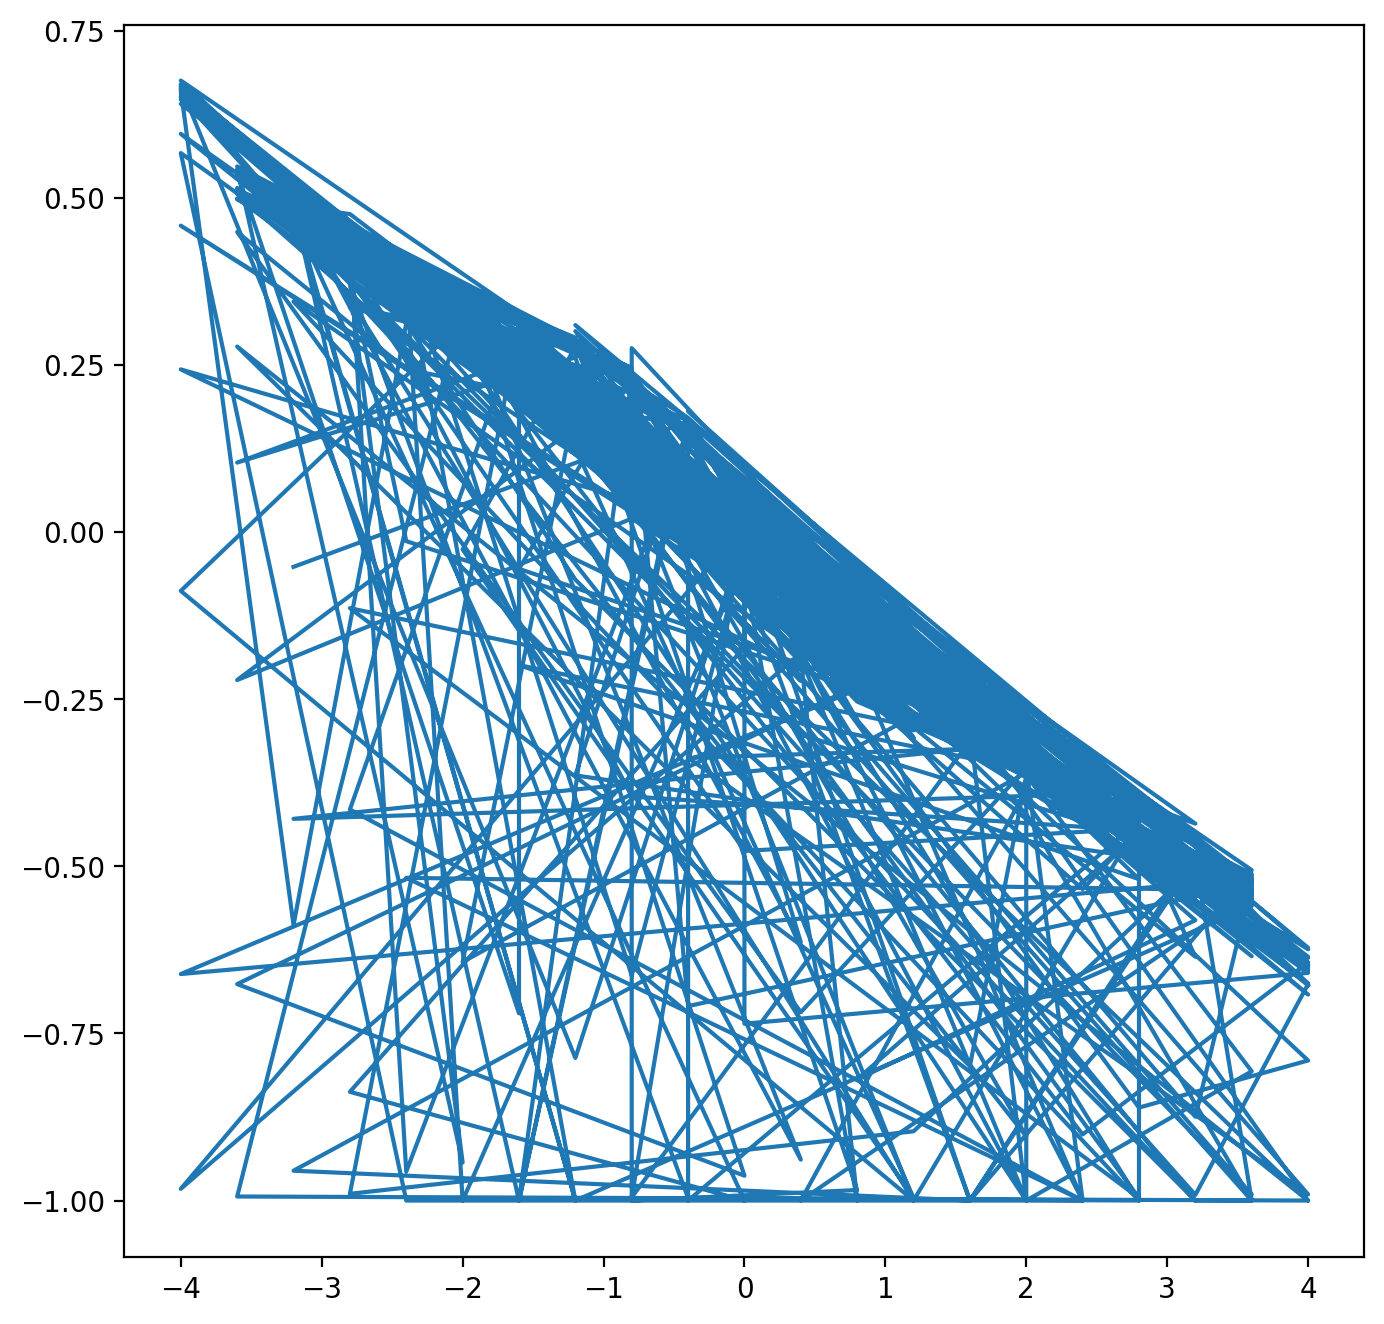

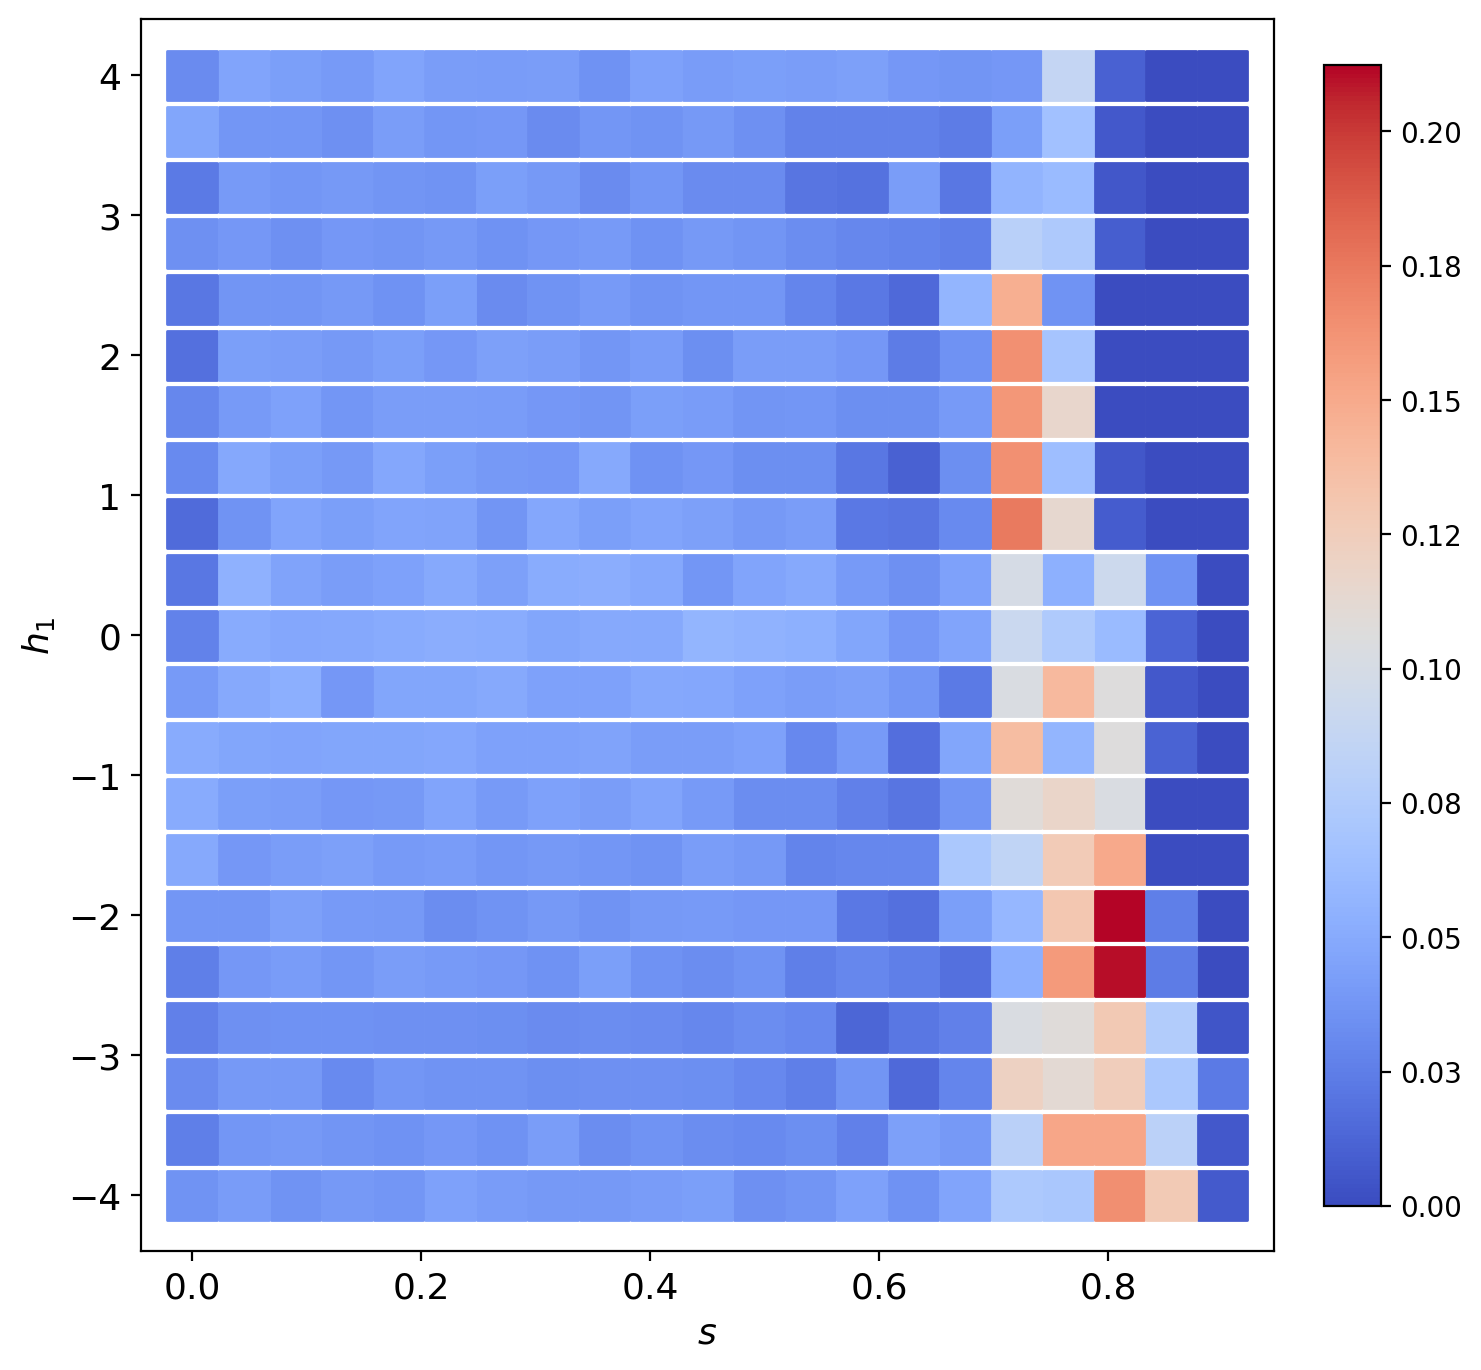

In [56]:
fig, ax = plt.subplots(1)

cmap = cm.get_cmap('coolwarm')
color = cmap(Z)[..., :3]

plot=ax.scatter(X,Y,c=Z,marker='s',cmap=cmap,s=320)
fig.colorbar(plot,format='%.2f',fraction=0.046, pad=0.04)
ax.set_xlabel(r'$s$',fontsize=13)
ax.set_ylabel(r'$h_1$',fontsize=13)

#set fig size

#and ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.show()

In [57]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-02-23--12').glob('*')
h1s=[]
slist=[]
avgmags=[]
sdmags=[]

for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1s.append(paramsarray[1][2])
            slist.append(paramsarray[1][4])
            k2=paramsarray[1][1]
            j=paramsarray[1][0]
            print(paramsarray[1][2],paramsarray[1][4])
            
            mags,avgmag,sdmag=magnetization(resp,filter_E=False)
            avgmags.append(np.abs(avgmag))
            sdmags.append(sdmag)
                
        except ValueError:
            pass

for i in range(len(h1s)):
    h1s[i]=float(h1s[i])
for i in range(len(slist)):
    slist[i]=float(slist[i])
    

-3.2 0.765
-0.3999999999999999 0.0
2.8000000000000007 0.6749999999999999
-3.2 0.63
2.0 0.36
-1.5999999999999996 0.0
1.2000000000000002 0.8099999999999999
-2.0 0.765
-1.1999999999999997 0.40499999999999997
-2.8 0.72
-0.7999999999999998 0.40499999999999997
-1.5999999999999996 0.135
0.40000000000000036 0.54
0.8000000000000007 0.9
2.4000000000000004 0.8099999999999999
2.0 0.315
3.2 0.22499999999999998
-3.2 0.54
-3.2 0.495
-4.0 0.0
-2.0 0.045
2.0 0.72
2.0 0.135
-4.0 0.27
-1.1999999999999997 0.8099999999999999
0.0 0.22499999999999998
0.40000000000000036 0.6749999999999999
-4.0 0.54
0.8000000000000007 0.0
-3.2 0.27
0.40000000000000036 0.855
-2.0 0.18
2.8000000000000007 0.135
-3.2 0.0
-4.0 0.22499999999999998
0.40000000000000036 0.09
2.8000000000000007 0.315
-0.7999999999999998 0.765
-2.8 0.495
-2.0 0.44999999999999996
-1.1999999999999997 0.585
1.6000000000000005 0.44999999999999996
-3.2 0.8099999999999999
2.4000000000000004 0.045
-1.5999999999999996 0.63
-1.5999999999999996 0.54
-2.8 0.36
-2.

2.0 0.765
-3.2 0.045
-1.5999999999999996 0.9
-0.7999999999999998 0.09
-1.5999999999999996 0.72
0.8000000000000007 0.36
-0.7999999999999998 0.315
-0.7999999999999998 0.0
2.0 0.27
-3.6 0.0
2.0 0.22499999999999998
-2.4 0.585
0.0 0.09
2.4000000000000004 0.18
4.0 0.6749999999999999


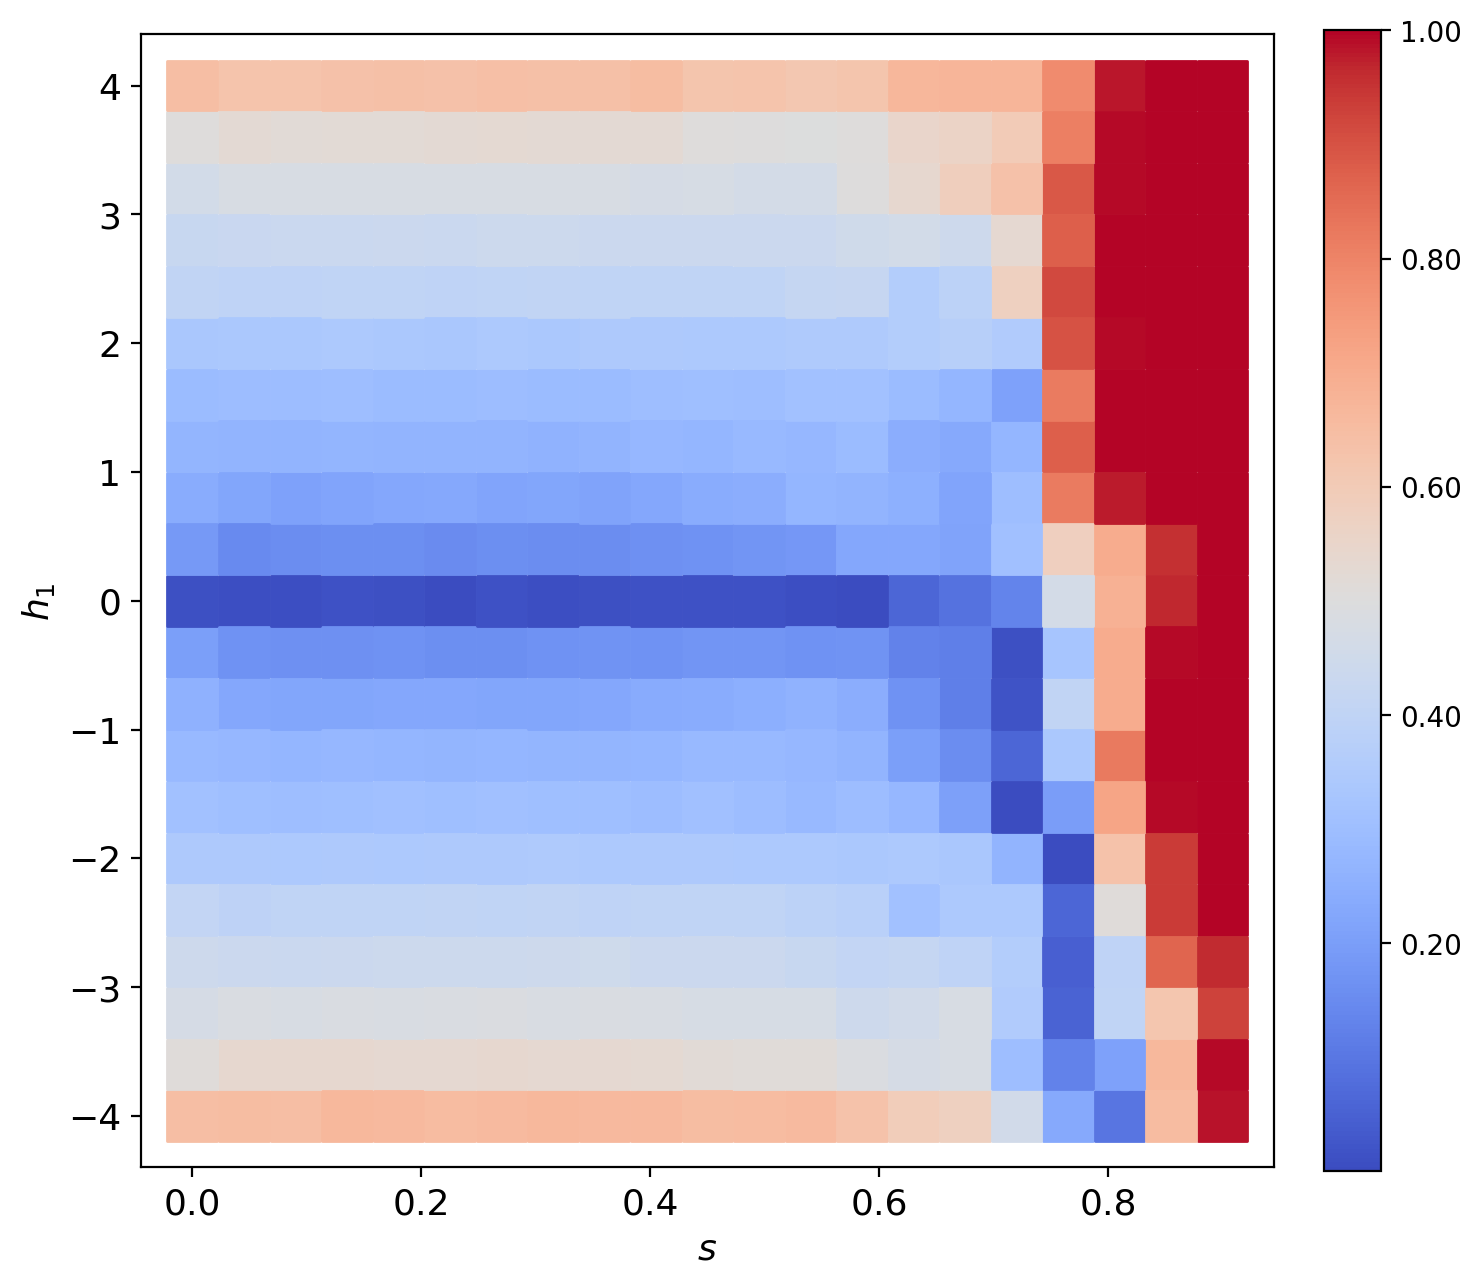

In [58]:
X = np.array(slist)
Y = np.array(h1s)
Z = np.array(avgmags)

fig, ax = plt.subplots(1)

cmap = cm.get_cmap('coolwarm')
color = cmap(Z)[..., :3]

plot=ax.scatter(X,Y,c=Z,marker='s',cmap=cmap,s=320)
fig.colorbar(plot,format='%.2f',fraction=0.046, pad=0.04)
ax.set_xlabel(r'$s$',fontsize=13)
ax.set_ylabel(r'$h_1$',fontsize=13)

#set fig size
ax.set_aspect(0.9/8)
#and ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.show()

# triangle magnetization time series

In [59]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-13-23--21').glob('*')

h1_s=[]

for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1=float(paramsarray[1][2])
            s=float(paramsarray[1][4])
            h1_s.append((h1,s))
            k2=float(paramsarray[1][1])
            j=float(paramsarray[1][0])
        except ValueError:
            pass

h1_s=list(set(h1_s))
print(h1_s)

[(-1.5, 0.7), (3.0, 0.9), (2.0, 0.5), (-1.0, 0.2)]


In [60]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-13-23--21').glob('*')

mags=[]
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1=float(paramsarray[1][2])
            s=float(paramsarray[1][4])
            k2=float(paramsarray[1][1])
            j=float(paramsarray[1][0])


            if ((h1,s))==(-1.5, 0.7):
                h1glob,sglob=h1,s
                trimeans_h1=[]
                for i in range(len(resp)):
                    arr=resp[i][0]
                    trimeans=[]
                    for tri in alltrilist:
                        tripms=[]           
                        for qubit in tri:
                            index=np.where(nodes==qubit)[0][0]
                            tripms.append(arr[index])
                        #for each triangle in the lattice, average the sites and add it to the list
                        avg_over_tri=np.mean(tripms)
                        trimeans.append(avg_over_tri)
                    #after doing all the triangles for a run, there should be 56 means (56 triangles)
                    #average these and add to this list
                    avg_over_alltris=np.mean(trimeans)
                    trimeans_h1.append(avg_over_alltris)
                mags.append(trimeans_h1)
                #after doing all the runs, there should be N_runs values               
                
                
        except ValueError:
            pass
    

In [61]:
time_series=[]
for i in range(len(mags[0])):
    pms=[]
    for j in range(len(mags)):
        pms.append(mags[j][i])
    time_series.append(np.mean(pms))

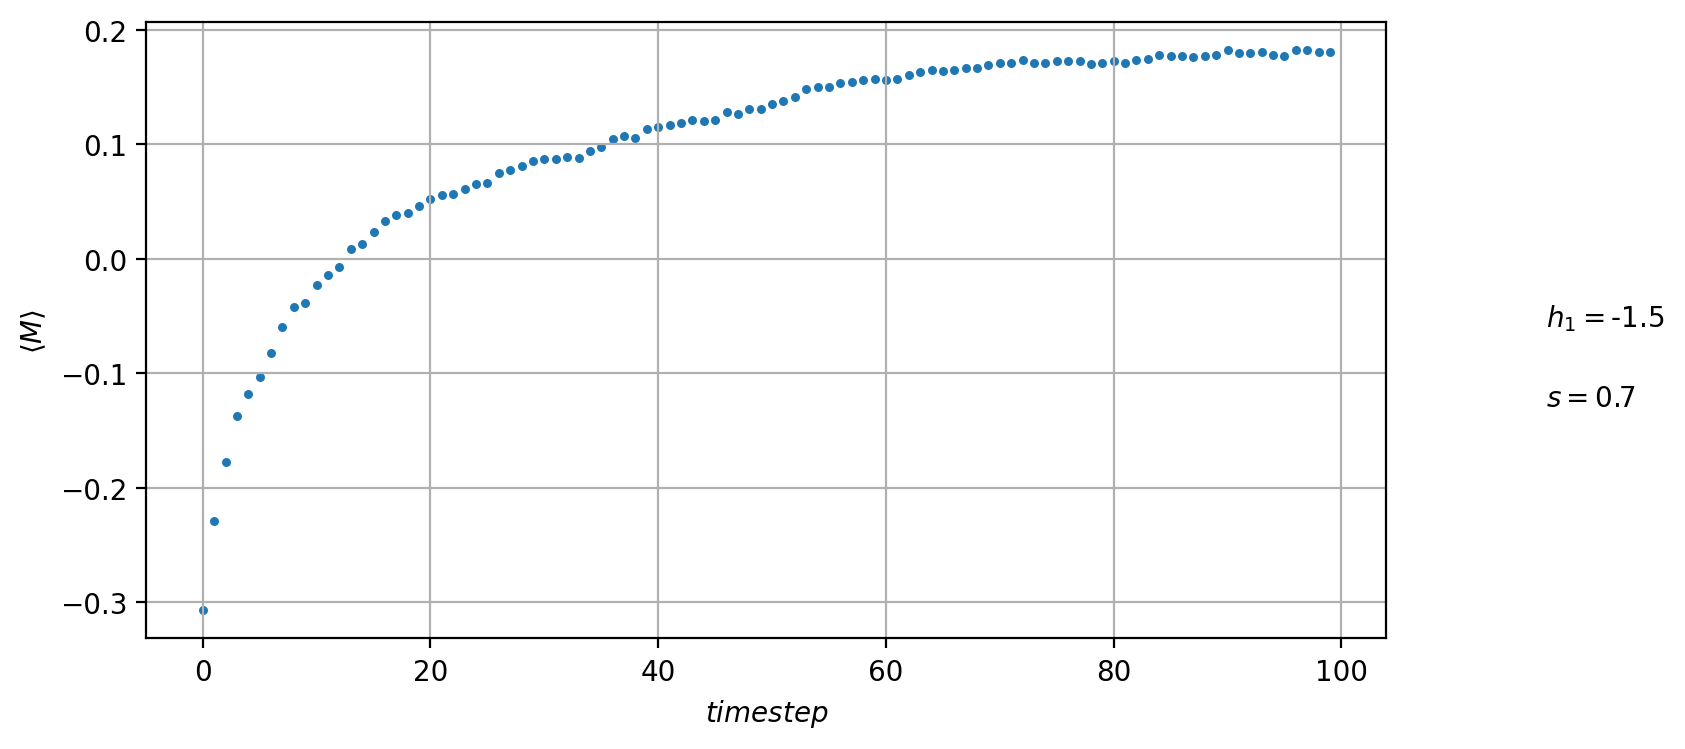

In [62]:
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=200
x=[i for i in range(100)]
plt.scatter(x,time_series,s=5)
plt.figtext(x=1.0,y=0.5,s=r'$h_1=$'+str(h1glob))
plt.figtext(x=1.0,y=0.4,s=r'$s=$'+str(sglob))
plt.grid(True)
plt.xlabel(r'$ time step $')
plt.ylabel(r'$ \langle M \rangle $')
plt.show()

# triangle magnetization time series - J

In [63]:
folder=Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-15-23--14').glob('*')

js=[]
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1=float(paramsarray[1][2])
            s=float(paramsarray[1][4])
            k2=float(paramsarray[1][1])
            j=float(paramsarray[1][0])
            js.append((j))
        except ValueError:
            pass
js=list(set(js))
print(js)

[0.7, 1.0, 1.3]


In [64]:
globfolder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-15-23--14').glob('*'))

js_avgmags=[]

for jval in js:
    print("")
    print("")
    print(jval)
    j_avgmags=[]
    for file in globfolder:
        name=os.path.basename(file)
        if name!='regs.npz':
            try:
                resp,paramsarray,missingqs,twochains,nodes=open_file(file)
                h1=float(paramsarray[1][2])
                s=float(paramsarray[1][4])
                k2=float(paramsarray[1][1])
                j=float(paramsarray[1][0])
                
                if j==jval:

                    trimeans_h1=[]
                    for i in range(len(resp)):
                        arr=resp[i][0]
                        trimeans=[]
                        for tri in alltrilist:
                            tripms=[]           
                            for qubit in tri:
                                index=np.where(nodes==qubit)[0][0]
                                tripms.append(arr[index])
                            #for each triangle in the lattice, average the sites and add it to the list
                            avg_over_tri=np.mean(tripms)
                            trimeans.append(avg_over_tri)
                        #after doing all the triangles for a run, there should be 56 means (56 triangles)
                        #average these and add to this list
                        avg_over_alltris=np.mean(trimeans)
                        trimeans_h1.append(avg_over_alltris)
                    j_avgmags.append(trimeans_h1)
                    #after doing all the runs, there should be N_runs values


            except ValueError:
                pass
    js_avgmags.append(j_avgmags)



0.7


1.0


1.3


In [65]:
js_avgmags=np.array(js_avgmags)
for i in range(len(js_avgmags)):
    time_series=[]
    for j in range(len(js_avgmags[i])):
        pms=[]
        for k in range(len(js_avgmags[i][j])):
            print(js_avgmags[i][j][k])

0.07142857142857144
0.047619047619047616
-0.011904761904761894
0.0
0.03571428571428572
-0.09523809523809523
-0.035714285714285705
0.011904761904761902
-0.02380952380952381
-0.03571428571428571
-0.01190476190476191
-0.0357142857142857
-0.03571428571428572
0.09523809523809522
-0.08333333333333334
-0.047619047619047616
-0.04761904761904762
-0.011904761904761906
0.035714285714285705
-0.03571428571428571
7.93016446160826e-18
-0.08333333333333333
0.011904761904761906
0.023809523809523808
0.01190476190476189
-0.047619047619047616
-0.14285714285714285
-0.05952380952380952
0.047619047619047616
0.04761904761904761
-0.11904761904761905
7.93016446160826e-18
-0.09523809523809522
0.011904761904761906
0.0
0.011904761904761906
-0.023809523809523826
0.02380952380952382
-0.023809523809523805
-0.04761904761904761
0.011904761904761902
-0.05952380952380953
-0.08333333333333333
0.011904761904761899
-0.0238095238095238
-0.02380952380952381
-0.03571428571428571
-0.09523809523809525
-0.04761904761904761
0.0119

-0.023809523809523808
0.04761904761904761
0.01190476190476191
-0.07142857142857144
-0.08333333333333334
0.01190476190476191
-0.011904761904761906
-0.011904761904761902
0.011904761904761902
0.011904761904761906
0.035714285714285705
-0.02380952380952382
0.023809523809523808
0.0
-0.08333333333333333
-0.011904761904761902
0.04761904761904762
0.07142857142857142
0.03571428571428572
3.96508223080413e-18
0.05952380952380952
-0.047619047619047616
-0.10714285714285714
0.0
0.011904761904761894
-0.07142857142857142
0.011904761904761902
-0.02380952380952381
-0.01190476190476191
9.912705577010326e-18
0.08333333333333333
0.04761904761904761
-0.08333333333333333
-0.023809523809523805
0.10714285714285714
-0.035714285714285705
-0.0238095238095238
0.0119047619047619
-0.011904761904761904
0.09523809523809523
-0.16666666666666666
0.059523809523809534
1.982541115402065e-18
-0.04761904761904762
0.011904761904761915
0.011904761904761906
0.011904761904761906
-0.02380952380952381
-0.03571428571428571
0.0476190

In [66]:
# time_series=[]
# for i in range(len(mags[0])):
#     pms=[]
#     for j in range(len(mags)):
#         pms.append(mags[j][i])
#     time_series.append(np.mean(pms))

# triangle magnetization - three J values

In [67]:
folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/data/03-15-23--15').glob('*'))

js=[]
avgmags_j=[]
hs_j=[]
sds_j=[]

count=1
for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1=float(paramsarray[1][2])
            hs_j.append(h1)
            k2=paramsarray[1][1]
            j=float(paramsarray[1][0])
            print("J=",j)
            js.append(j)

            
            trimeans_h1=[]
            for i in range(len(resp)):
                arr=resp[i][0]
                broken,Nbrokens=chain_break_single(arr,twochains,nodes)
                
                if Nbrokens==0:
#                     print("no broken chains")
                    trimeans=[]
                    for tri in alltrilist:
                        tripms=[]           
                        for qubit in tri:
                            index=np.where(nodes==qubit)[0][0]
                            tripms.append(arr[index])
                        #for each triangle in the lattice, average the sites and add it to the list
                        avg_over_tri=np.mean(tripms)
                        trimeans.append(avg_over_tri)
                    #after doing all the triangles for a run, there should be 56 means (56 triangles)
                    #average these and add to this list
                    avg_over_alltris=np.mean(trimeans)

                    if resp[i][2]==1:
                        trimeans_h1.append(avg_over_alltris)

                    if resp[i][2]!=1:
                        print(resp[i][2])
                        for num in range(resp[i][2]):
                            trimeans_h1.append(avg_over_alltris)
                if Nbrokens!=0:
                    print("there are",Nbrokens,"broken chains. Run",i)
                
            if len(trimeans_h1) !=1000:
                print(name)
                print(len(trimeans_h1))
                       
            avgmags_j.append(np.abs(np.mean(trimeans_h1)))
            sds_j.append(np.std(trimeans_h1))
        except ValueError:
            pass
    
    print(count,"done")
    count+=1

        
#     avgmags_js.append(avgmags)
#     sds_js.append(sds)

# for i in range(len(h1s)):
#     h1s[i]=float(h1s[i])
    

J= 2.5
there are 6 broken chains. Run 0
there are 6 broken chains. Run 1
there are 6 broken chains. Run 2
there are 7 broken chains. Run 3
there are 7 broken chains. Run 4
there are 4 broken chains. Run 5
there are 4 broken chains. Run 6
there are 4 broken chains. Run 7
there are 4 broken chains. Run 8
there are 4 broken chains. Run 9
there are 5 broken chains. Run 10
there are 5 broken chains. Run 11
there are 5 broken chains. Run 12
there are 5 broken chains. Run 13
there are 5 broken chains. Run 14
there are 5 broken chains. Run 15
there are 5 broken chains. Run 16
there are 5 broken chains. Run 17
there are 5 broken chains. Run 18
there are 5 broken chains. Run 19
there are 5 broken chains. Run 20
there are 5 broken chains. Run 21
there are 5 broken chains. Run 22
there are 5 broken chains. Run 23
there are 5 broken chains. Run 24
there are 5 broken chains. Run 25
there are 5 broken chains. Run 26
there are 5 broken chains. Run 27
there are 5 broken chains. Run 28
there are 5 broke

there are 5 broken chains. Run 259
there are 5 broken chains. Run 260
there are 5 broken chains. Run 261
there are 5 broken chains. Run 262
there are 5 broken chains. Run 263
there are 5 broken chains. Run 264
there are 5 broken chains. Run 265
there are 5 broken chains. Run 266
there are 5 broken chains. Run 267
there are 5 broken chains. Run 268
there are 5 broken chains. Run 269
there are 5 broken chains. Run 270
there are 5 broken chains. Run 271
there are 5 broken chains. Run 272
there are 5 broken chains. Run 273
there are 5 broken chains. Run 274
there are 5 broken chains. Run 275
there are 5 broken chains. Run 276
there are 5 broken chains. Run 277
there are 5 broken chains. Run 278
there are 5 broken chains. Run 279
there are 5 broken chains. Run 280
there are 5 broken chains. Run 281
there are 5 broken chains. Run 282
there are 5 broken chains. Run 283
there are 5 broken chains. Run 284
there are 5 broken chains. Run 285
there are 5 broken chains. Run 286
there are 5 broken c

there are 7 broken chains. Run 534
there are 7 broken chains. Run 535
there are 7 broken chains. Run 536
there are 7 broken chains. Run 537
there are 7 broken chains. Run 538
there are 7 broken chains. Run 539
there are 7 broken chains. Run 540
there are 7 broken chains. Run 541
there are 7 broken chains. Run 542
there are 7 broken chains. Run 543
there are 7 broken chains. Run 544
there are 7 broken chains. Run 545
there are 7 broken chains. Run 546
there are 7 broken chains. Run 547
there are 1 broken chains. Run 548
there are 2 broken chains. Run 549
there are 2 broken chains. Run 550
there are 2 broken chains. Run 551
there are 2 broken chains. Run 552
there are 2 broken chains. Run 553
there are 3 broken chains. Run 554
there are 3 broken chains. Run 555
there are 3 broken chains. Run 556
there are 3 broken chains. Run 557
there are 3 broken chains. Run 558
there are 3 broken chains. Run 559
there are 3 broken chains. Run 560
there are 3 broken chains. Run 561
there are 3 broken c

there are 6 broken chains. Run 789
there are 6 broken chains. Run 790
there are 6 broken chains. Run 791
there are 6 broken chains. Run 792
there are 6 broken chains. Run 793
there are 6 broken chains. Run 794
there are 6 broken chains. Run 795
there are 6 broken chains. Run 796
there are 6 broken chains. Run 797
there are 6 broken chains. Run 798
there are 6 broken chains. Run 799
there are 6 broken chains. Run 800
there are 6 broken chains. Run 801
there are 6 broken chains. Run 802
there are 6 broken chains. Run 803
there are 6 broken chains. Run 804
there are 6 broken chains. Run 805
there are 6 broken chains. Run 806
there are 6 broken chains. Run 807
there are 6 broken chains. Run 808
there are 6 broken chains. Run 809
there are 6 broken chains. Run 810
there are 6 broken chains. Run 811
there are 6 broken chains. Run 812
there are 6 broken chains. Run 813
there are 6 broken chains. Run 814
there are 6 broken chains. Run 815
there are 6 broken chains. Run 816
there are 6 broken c

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


there are 1 broken chains. Run 224
there are 1 broken chains. Run 850
there are 1 broken chains. Run 996
J=1.3__h1,h2,k2,s=-0.3419951893353394,-0.1709975946676697,-2.0,0__03-15-23__15-23-32.npz
997
2 done
J= 1.0
there are 1 broken chains. Run 997
J=1.0__h1,h2,k2,s=4.0,2.0,-2.0,0__03-15-23__15-23-21.npz
999
3 done
J= 1.3
there are 1 broken chains. Run 911
there are 1 broken chains. Run 912
there are 1 broken chains. Run 913
there are 1 broken chains. Run 914
there are 1 broken chains. Run 915
there are 1 broken chains. Run 916
there are 1 broken chains. Run 917
there are 1 broken chains. Run 918
there are 1 broken chains. Run 919
there are 1 broken chains. Run 920
there are 1 broken chains. Run 921
there are 1 broken chains. Run 922
there are 1 broken chains. Run 923
there are 1 broken chains. Run 924
there are 1 broken chains. Run 925
there are 1 broken chains. Run 926
there are 1 broken chains. Run 927
there are 1 broken chains. Run 928
there are 1 broken chains. Run 929
there are 1 b

there are 4 broken chains. Run 185
there are 4 broken chains. Run 186
there are 4 broken chains. Run 187
there are 3 broken chains. Run 188
there are 4 broken chains. Run 189
there are 4 broken chains. Run 190
there are 6 broken chains. Run 191
there are 5 broken chains. Run 192
there are 6 broken chains. Run 193
there are 4 broken chains. Run 194
there are 5 broken chains. Run 195
there are 5 broken chains. Run 196
there are 4 broken chains. Run 197
there are 5 broken chains. Run 198
there are 4 broken chains. Run 199
there are 6 broken chains. Run 200
there are 4 broken chains. Run 201
there are 6 broken chains. Run 202
there are 6 broken chains. Run 203
there are 5 broken chains. Run 204
there are 4 broken chains. Run 205
there are 5 broken chains. Run 206
there are 5 broken chains. Run 207
there are 4 broken chains. Run 208
there are 4 broken chains. Run 209
there are 5 broken chains. Run 210
there are 4 broken chains. Run 211
there are 5 broken chains. Run 212
there are 4 broken c

there are 4 broken chains. Run 454
there are 5 broken chains. Run 455
there are 3 broken chains. Run 456
there are 5 broken chains. Run 457
there are 6 broken chains. Run 458
there are 3 broken chains. Run 459
there are 5 broken chains. Run 460
there are 3 broken chains. Run 461
there are 4 broken chains. Run 462
there are 5 broken chains. Run 463
there are 5 broken chains. Run 464
there are 6 broken chains. Run 465
there are 4 broken chains. Run 466
there are 6 broken chains. Run 467
there are 4 broken chains. Run 468
there are 3 broken chains. Run 469
there are 3 broken chains. Run 470
there are 6 broken chains. Run 471
there are 5 broken chains. Run 472
there are 5 broken chains. Run 473
there are 5 broken chains. Run 474
there are 4 broken chains. Run 475
there are 4 broken chains. Run 476
there are 3 broken chains. Run 477
there are 5 broken chains. Run 478
there are 4 broken chains. Run 479
there are 4 broken chains. Run 480
there are 4 broken chains. Run 481
there are 4 broken c

there are 5 broken chains. Run 732
there are 3 broken chains. Run 733
there are 3 broken chains. Run 734
there are 2 broken chains. Run 735
there are 4 broken chains. Run 736
there are 3 broken chains. Run 737
there are 4 broken chains. Run 738
there are 5 broken chains. Run 739
there are 3 broken chains. Run 740
there are 4 broken chains. Run 741
there are 4 broken chains. Run 742
there are 5 broken chains. Run 743
there are 5 broken chains. Run 744
there are 5 broken chains. Run 745
there are 3 broken chains. Run 746
there are 4 broken chains. Run 747
there are 3 broken chains. Run 748
there are 5 broken chains. Run 749
there are 4 broken chains. Run 750
there are 5 broken chains. Run 751
there are 5 broken chains. Run 752
there are 5 broken chains. Run 753
there are 3 broken chains. Run 754
there are 3 broken chains. Run 755
there are 2 broken chains. Run 756
there are 4 broken chains. Run 757
there are 5 broken chains. Run 758
there are 3 broken chains. Run 759
there are 4 broken c

there are 1 broken chains. Run 285
there are 1 broken chains. Run 286
there are 1 broken chains. Run 287
there are 1 broken chains. Run 288
there are 1 broken chains. Run 289
there are 1 broken chains. Run 290
there are 1 broken chains. Run 291
there are 1 broken chains. Run 292
there are 1 broken chains. Run 293
there are 1 broken chains. Run 294
there are 1 broken chains. Run 295
there are 1 broken chains. Run 296
there are 1 broken chains. Run 297
there are 1 broken chains. Run 298
there are 1 broken chains. Run 299
there are 1 broken chains. Run 300
there are 1 broken chains. Run 301
there are 1 broken chains. Run 302
there are 1 broken chains. Run 303
there are 1 broken chains. Run 374
there are 1 broken chains. Run 375
there are 1 broken chains. Run 597
there are 1 broken chains. Run 598
there are 1 broken chains. Run 599
there are 1 broken chains. Run 600
there are 1 broken chains. Run 601
there are 1 broken chains. Run 602
there are 1 broken chains. Run 603
there are 1 broken c

there are 6 broken chains. Run 172
there are 6 broken chains. Run 173
there are 6 broken chains. Run 174
there are 6 broken chains. Run 175
there are 6 broken chains. Run 176
there are 6 broken chains. Run 177
there are 6 broken chains. Run 178
there are 6 broken chains. Run 179
there are 5 broken chains. Run 180
there are 5 broken chains. Run 181
there are 5 broken chains. Run 182
there are 5 broken chains. Run 183
there are 5 broken chains. Run 184
there are 5 broken chains. Run 185
there are 5 broken chains. Run 186
there are 5 broken chains. Run 187
there are 5 broken chains. Run 188
there are 5 broken chains. Run 189
there are 5 broken chains. Run 190
there are 5 broken chains. Run 191
there are 5 broken chains. Run 192
there are 5 broken chains. Run 193
there are 5 broken chains. Run 194
there are 5 broken chains. Run 195
there are 5 broken chains. Run 196
there are 5 broken chains. Run 197
there are 5 broken chains. Run 198
there are 5 broken chains. Run 199
there are 5 broken c

there are 6 broken chains. Run 450
there are 6 broken chains. Run 451
there are 6 broken chains. Run 452
there are 6 broken chains. Run 453
there are 6 broken chains. Run 454
there are 6 broken chains. Run 455
there are 6 broken chains. Run 456
there are 6 broken chains. Run 457
there are 6 broken chains. Run 458
there are 6 broken chains. Run 459
there are 6 broken chains. Run 460
there are 6 broken chains. Run 461
there are 6 broken chains. Run 462
there are 6 broken chains. Run 463
there are 6 broken chains. Run 464
there are 5 broken chains. Run 465
there are 5 broken chains. Run 466
there are 5 broken chains. Run 467
there are 5 broken chains. Run 468
there are 5 broken chains. Run 469
there are 5 broken chains. Run 470
there are 5 broken chains. Run 471
there are 5 broken chains. Run 472
there are 5 broken chains. Run 473
there are 5 broken chains. Run 474
there are 5 broken chains. Run 475
there are 5 broken chains. Run 476
there are 5 broken chains. Run 477
there are 5 broken c

there are 6 broken chains. Run 722
there are 6 broken chains. Run 723
there are 6 broken chains. Run 724
there are 6 broken chains. Run 725
there are 6 broken chains. Run 726
there are 6 broken chains. Run 727
there are 6 broken chains. Run 728
there are 6 broken chains. Run 729
there are 6 broken chains. Run 730
there are 6 broken chains. Run 731
there are 6 broken chains. Run 732
there are 6 broken chains. Run 733
there are 6 broken chains. Run 734
there are 6 broken chains. Run 735
there are 6 broken chains. Run 736
there are 6 broken chains. Run 737
there are 6 broken chains. Run 738
there are 6 broken chains. Run 739
there are 6 broken chains. Run 740
there are 6 broken chains. Run 741
there are 6 broken chains. Run 742
there are 6 broken chains. Run 743
there are 6 broken chains. Run 744
there are 6 broken chains. Run 745
there are 6 broken chains. Run 746
there are 6 broken chains. Run 747
there are 6 broken chains. Run 748
there are 6 broken chains. Run 749
there are 6 broken c

J= 2.5
there are 7 broken chains. Run 0
there are 7 broken chains. Run 1
there are 7 broken chains. Run 2
there are 7 broken chains. Run 3
there are 7 broken chains. Run 4
there are 7 broken chains. Run 5
there are 7 broken chains. Run 6
there are 7 broken chains. Run 7
there are 7 broken chains. Run 8
there are 7 broken chains. Run 9
there are 7 broken chains. Run 10
there are 7 broken chains. Run 11
there are 7 broken chains. Run 12
there are 7 broken chains. Run 13
there are 7 broken chains. Run 14
there are 7 broken chains. Run 15
there are 7 broken chains. Run 16
there are 7 broken chains. Run 17
there are 7 broken chains. Run 18
there are 7 broken chains. Run 19
there are 7 broken chains. Run 20
there are 7 broken chains. Run 21
there are 7 broken chains. Run 22
there are 7 broken chains. Run 23
there are 7 broken chains. Run 24
there are 7 broken chains. Run 25
there are 7 broken chains. Run 26
there are 7 broken chains. Run 27
there are 7 broken chains. Run 28
there are 7 broke

there are 7 broken chains. Run 276
there are 7 broken chains. Run 277
there are 7 broken chains. Run 278
there are 7 broken chains. Run 279
there are 7 broken chains. Run 280
there are 7 broken chains. Run 281
there are 7 broken chains. Run 282
there are 7 broken chains. Run 283
there are 7 broken chains. Run 284
there are 7 broken chains. Run 285
there are 7 broken chains. Run 286
there are 7 broken chains. Run 287
there are 7 broken chains. Run 288
there are 7 broken chains. Run 289
there are 7 broken chains. Run 290
there are 7 broken chains. Run 291
there are 7 broken chains. Run 292
there are 7 broken chains. Run 293
there are 7 broken chains. Run 294
there are 7 broken chains. Run 295
there are 7 broken chains. Run 296
there are 7 broken chains. Run 297
there are 7 broken chains. Run 298
there are 7 broken chains. Run 299
there are 7 broken chains. Run 300
there are 7 broken chains. Run 301
there are 7 broken chains. Run 302
there are 7 broken chains. Run 303
there are 7 broken c

there are 7 broken chains. Run 524
there are 7 broken chains. Run 525
there are 7 broken chains. Run 526
there are 7 broken chains. Run 527
there are 7 broken chains. Run 528
there are 7 broken chains. Run 529
there are 7 broken chains. Run 530
there are 7 broken chains. Run 531
there are 7 broken chains. Run 532
there are 7 broken chains. Run 533
there are 7 broken chains. Run 534
there are 7 broken chains. Run 535
there are 7 broken chains. Run 536
there are 7 broken chains. Run 537
there are 7 broken chains. Run 538
there are 7 broken chains. Run 539
there are 7 broken chains. Run 540
there are 7 broken chains. Run 541
there are 7 broken chains. Run 542
there are 7 broken chains. Run 543
there are 7 broken chains. Run 544
there are 7 broken chains. Run 545
there are 7 broken chains. Run 546
there are 7 broken chains. Run 547
there are 7 broken chains. Run 548
there are 7 broken chains. Run 549
there are 7 broken chains. Run 550
there are 7 broken chains. Run 551
there are 7 broken c

there are 7 broken chains. Run 808
there are 7 broken chains. Run 809
there are 7 broken chains. Run 810
there are 7 broken chains. Run 811
there are 7 broken chains. Run 812
there are 7 broken chains. Run 813
there are 7 broken chains. Run 814
there are 7 broken chains. Run 815
there are 7 broken chains. Run 816
there are 7 broken chains. Run 817
there are 7 broken chains. Run 818
there are 7 broken chains. Run 819
there are 7 broken chains. Run 820
there are 7 broken chains. Run 821
there are 7 broken chains. Run 822
there are 7 broken chains. Run 823
there are 7 broken chains. Run 824
there are 6 broken chains. Run 825
there are 6 broken chains. Run 826
there are 6 broken chains. Run 827
there are 6 broken chains. Run 828
there are 6 broken chains. Run 829
there are 6 broken chains. Run 830
there are 6 broken chains. Run 831
there are 6 broken chains. Run 832
there are 6 broken chains. Run 833
there are 6 broken chains. Run 834
there are 6 broken chains. Run 835
there are 6 broken c

there are 7 broken chains. Run 61
there are 7 broken chains. Run 62
there are 7 broken chains. Run 63
there are 7 broken chains. Run 64
there are 7 broken chains. Run 65
there are 7 broken chains. Run 66
there are 7 broken chains. Run 67
there are 7 broken chains. Run 68
there are 7 broken chains. Run 69
there are 7 broken chains. Run 70
there are 7 broken chains. Run 71
there are 7 broken chains. Run 72
there are 7 broken chains. Run 73
there are 7 broken chains. Run 74
there are 7 broken chains. Run 75
there are 7 broken chains. Run 76
there are 7 broken chains. Run 77
there are 7 broken chains. Run 78
there are 7 broken chains. Run 79
there are 7 broken chains. Run 80
there are 7 broken chains. Run 81
there are 7 broken chains. Run 82
there are 7 broken chains. Run 83
there are 7 broken chains. Run 84
there are 7 broken chains. Run 85
there are 7 broken chains. Run 86
there are 7 broken chains. Run 87
there are 7 broken chains. Run 88
there are 7 broken chains. Run 89
there are 7 br

there are 7 broken chains. Run 354
there are 7 broken chains. Run 355
there are 7 broken chains. Run 356
there are 7 broken chains. Run 357
there are 7 broken chains. Run 358
there are 7 broken chains. Run 359
there are 7 broken chains. Run 360
there are 7 broken chains. Run 361
there are 7 broken chains. Run 362
there are 7 broken chains. Run 363
there are 7 broken chains. Run 364
there are 7 broken chains. Run 365
there are 7 broken chains. Run 366
there are 7 broken chains. Run 367
there are 7 broken chains. Run 368
there are 7 broken chains. Run 369
there are 7 broken chains. Run 370
there are 7 broken chains. Run 371
there are 7 broken chains. Run 372
there are 7 broken chains. Run 373
there are 7 broken chains. Run 374
there are 7 broken chains. Run 375
there are 7 broken chains. Run 376
there are 7 broken chains. Run 377
there are 7 broken chains. Run 378
there are 7 broken chains. Run 379
there are 7 broken chains. Run 380
there are 7 broken chains. Run 381
there are 7 broken c

there are 6 broken chains. Run 631
there are 6 broken chains. Run 632
there are 6 broken chains. Run 633
there are 6 broken chains. Run 634
there are 6 broken chains. Run 635
there are 6 broken chains. Run 636
there are 6 broken chains. Run 637
there are 6 broken chains. Run 638
there are 6 broken chains. Run 639
there are 6 broken chains. Run 640
there are 6 broken chains. Run 641
there are 6 broken chains. Run 642
there are 6 broken chains. Run 643
there are 6 broken chains. Run 644
there are 6 broken chains. Run 645
there are 6 broken chains. Run 646
there are 6 broken chains. Run 647
there are 6 broken chains. Run 648
there are 6 broken chains. Run 649
there are 6 broken chains. Run 650
there are 6 broken chains. Run 651
there are 6 broken chains. Run 652
there are 6 broken chains. Run 653
there are 6 broken chains. Run 654
there are 6 broken chains. Run 655
there are 6 broken chains. Run 656
there are 6 broken chains. Run 657
there are 6 broken chains. Run 658
there are 6 broken c

there are 7 broken chains. Run 899
there are 7 broken chains. Run 900
there are 7 broken chains. Run 901
there are 7 broken chains. Run 902
there are 7 broken chains. Run 903
there are 7 broken chains. Run 904
there are 7 broken chains. Run 905
there are 7 broken chains. Run 906
there are 7 broken chains. Run 907
there are 7 broken chains. Run 908
there are 7 broken chains. Run 909
there are 7 broken chains. Run 910
there are 7 broken chains. Run 911
there are 7 broken chains. Run 912
there are 7 broken chains. Run 913
there are 7 broken chains. Run 914
there are 7 broken chains. Run 915
there are 7 broken chains. Run 916
there are 7 broken chains. Run 917
there are 7 broken chains. Run 918
there are 7 broken chains. Run 919
there are 7 broken chains. Run 920
there are 7 broken chains. Run 921
there are 7 broken chains. Run 922
there are 7 broken chains. Run 923
there are 7 broken chains. Run 924
there are 7 broken chains. Run 925
there are 7 broken chains. Run 926
there are 7 broken c

there are 2 broken chains. Run 183
there are 4 broken chains. Run 184
there are 2 broken chains. Run 185
there are 4 broken chains. Run 186
there are 4 broken chains. Run 187
there are 4 broken chains. Run 188
there are 4 broken chains. Run 189
there are 2 broken chains. Run 190
there are 2 broken chains. Run 191
there are 2 broken chains. Run 192
there are 2 broken chains. Run 193
there are 4 broken chains. Run 194
there are 2 broken chains. Run 195
there are 2 broken chains. Run 196
there are 4 broken chains. Run 197
there are 2 broken chains. Run 198
there are 4 broken chains. Run 199
there are 4 broken chains. Run 200
there are 2 broken chains. Run 201
there are 2 broken chains. Run 202
there are 2 broken chains. Run 203
there are 4 broken chains. Run 204
there are 4 broken chains. Run 205
there are 4 broken chains. Run 206
there are 2 broken chains. Run 207
there are 2 broken chains. Run 208
there are 2 broken chains. Run 209
there are 2 broken chains. Run 210
there are 4 broken c

there are 1 broken chains. Run 440
there are 3 broken chains. Run 441
there are 1 broken chains. Run 442
there are 1 broken chains. Run 443
there are 1 broken chains. Run 444
there are 5 broken chains. Run 445
there are 1 broken chains. Run 446
there are 3 broken chains. Run 447
there are 5 broken chains. Run 448
there are 1 broken chains. Run 449
there are 1 broken chains. Run 450
there are 1 broken chains. Run 451
there are 1 broken chains. Run 452
there are 3 broken chains. Run 453
there are 3 broken chains. Run 454
there are 3 broken chains. Run 455
there are 3 broken chains. Run 456
there are 1 broken chains. Run 457
there are 1 broken chains. Run 458
there are 3 broken chains. Run 459
there are 5 broken chains. Run 460
there are 3 broken chains. Run 461
there are 3 broken chains. Run 462
there are 1 broken chains. Run 463
there are 1 broken chains. Run 464
there are 3 broken chains. Run 465
there are 5 broken chains. Run 466
there are 3 broken chains. Run 467
there are 3 broken c

there are 2 broken chains. Run 700
there are 4 broken chains. Run 701
there are 2 broken chains. Run 702
there are 4 broken chains. Run 703
there are 2 broken chains. Run 704
there are 4 broken chains. Run 705
there are 4 broken chains. Run 707
there are 4 broken chains. Run 708
there are 2 broken chains. Run 709
there are 4 broken chains. Run 710
there are 4 broken chains. Run 711
there are 4 broken chains. Run 712
there are 4 broken chains. Run 713
there are 2 broken chains. Run 714
there are 2 broken chains. Run 715
there are 4 broken chains. Run 716
there are 4 broken chains. Run 717
there are 2 broken chains. Run 718
there are 2 broken chains. Run 719
there are 4 broken chains. Run 720
there are 2 broken chains. Run 721
there are 2 broken chains. Run 722
there are 2 broken chains. Run 723
there are 4 broken chains. Run 724
there are 4 broken chains. Run 725
there are 2 broken chains. Run 726
there are 2 broken chains. Run 727
there are 2 broken chains. Run 728
there are 2 broken c

there are 5 broken chains. Run 978
there are 3 broken chains. Run 979
there are 4 broken chains. Run 980
there are 4 broken chains. Run 981
there are 2 broken chains. Run 982
there are 2 broken chains. Run 983
there are 2 broken chains. Run 984
there are 4 broken chains. Run 985
there are 2 broken chains. Run 986
there are 2 broken chains. Run 987
there are 2 broken chains. Run 988
there are 5 broken chains. Run 989
there are 3 broken chains. Run 990
there are 3 broken chains. Run 991
there are 4 broken chains. Run 992
there are 4 broken chains. Run 993
there are 2 broken chains. Run 994
there are 2 broken chains. Run 995
there are 4 broken chains. Run 996
there are 2 broken chains. Run 997
there are 3 broken chains. Run 998
there are 4 broken chains. Run 999
J=2.0__h1,h2,k2,s=2.6549315324802287,1.3274657662401144,-2.0,0__03-16-23__12-37-36.npz
5
14 done
J= 2.5
there are 7 broken chains. Run 0
there are 7 broken chains. Run 1
there are 7 broken chains. Run 2
there are 7 broken chains. 

there are 7 broken chains. Run 257
there are 7 broken chains. Run 258
there are 7 broken chains. Run 259
there are 7 broken chains. Run 260
there are 7 broken chains. Run 261
there are 7 broken chains. Run 262
there are 7 broken chains. Run 263
there are 7 broken chains. Run 264
there are 7 broken chains. Run 265
there are 7 broken chains. Run 266
there are 7 broken chains. Run 267
there are 7 broken chains. Run 268
there are 7 broken chains. Run 269
there are 7 broken chains. Run 270
there are 7 broken chains. Run 271
there are 7 broken chains. Run 272
there are 7 broken chains. Run 273
there are 7 broken chains. Run 274
there are 7 broken chains. Run 275
there are 7 broken chains. Run 276
there are 7 broken chains. Run 277
there are 7 broken chains. Run 278
there are 7 broken chains. Run 279
there are 7 broken chains. Run 280
there are 7 broken chains. Run 281
there are 7 broken chains. Run 282
there are 7 broken chains. Run 283
there are 7 broken chains. Run 284
there are 7 broken c

there are 7 broken chains. Run 523
there are 7 broken chains. Run 524
there are 7 broken chains. Run 525
there are 7 broken chains. Run 526
there are 7 broken chains. Run 527
there are 7 broken chains. Run 528
there are 7 broken chains. Run 529
there are 7 broken chains. Run 530
there are 7 broken chains. Run 531
there are 7 broken chains. Run 532
there are 7 broken chains. Run 533
there are 7 broken chains. Run 534
there are 7 broken chains. Run 535
there are 7 broken chains. Run 536
there are 7 broken chains. Run 537
there are 7 broken chains. Run 538
there are 7 broken chains. Run 539
there are 7 broken chains. Run 540
there are 7 broken chains. Run 541
there are 7 broken chains. Run 542
there are 7 broken chains. Run 543
there are 7 broken chains. Run 544
there are 7 broken chains. Run 545
there are 7 broken chains. Run 546
there are 7 broken chains. Run 547
there are 7 broken chains. Run 548
there are 7 broken chains. Run 549
there are 7 broken chains. Run 550
there are 7 broken c

there are 7 broken chains. Run 821
there are 7 broken chains. Run 822
there are 7 broken chains. Run 823
there are 7 broken chains. Run 824
there are 7 broken chains. Run 825
there are 7 broken chains. Run 826
there are 7 broken chains. Run 827
there are 7 broken chains. Run 828
there are 7 broken chains. Run 829
there are 7 broken chains. Run 830
there are 7 broken chains. Run 831
there are 7 broken chains. Run 832
there are 7 broken chains. Run 833
there are 7 broken chains. Run 834
there are 7 broken chains. Run 835
there are 7 broken chains. Run 836
there are 7 broken chains. Run 837
there are 7 broken chains. Run 838
there are 7 broken chains. Run 839
there are 7 broken chains. Run 840
there are 7 broken chains. Run 841
there are 7 broken chains. Run 842
there are 7 broken chains. Run 843
there are 7 broken chains. Run 844
there are 7 broken chains. Run 845
there are 7 broken chains. Run 846
there are 7 broken chains. Run 847
there are 7 broken chains. Run 848
there are 7 broken c

there are 6 broken chains. Run 99
there are 6 broken chains. Run 100
there are 6 broken chains. Run 101
there are 6 broken chains. Run 102
there are 6 broken chains. Run 103
there are 6 broken chains. Run 104
there are 6 broken chains. Run 105
there are 6 broken chains. Run 106
there are 6 broken chains. Run 107
there are 6 broken chains. Run 108
there are 6 broken chains. Run 109
there are 6 broken chains. Run 110
there are 6 broken chains. Run 111
there are 6 broken chains. Run 112
there are 6 broken chains. Run 113
there are 6 broken chains. Run 114
there are 6 broken chains. Run 115
there are 6 broken chains. Run 116
there are 6 broken chains. Run 117
there are 6 broken chains. Run 118
there are 6 broken chains. Run 119
there are 6 broken chains. Run 120
there are 6 broken chains. Run 121
there are 6 broken chains. Run 122
there are 6 broken chains. Run 123
there are 6 broken chains. Run 124
there are 6 broken chains. Run 125
there are 6 broken chains. Run 126
there are 6 broken ch

there are 5 broken chains. Run 372
there are 5 broken chains. Run 373
there are 5 broken chains. Run 374
there are 5 broken chains. Run 375
there are 5 broken chains. Run 376
there are 5 broken chains. Run 377
there are 5 broken chains. Run 378
there are 5 broken chains. Run 379
there are 5 broken chains. Run 380
there are 5 broken chains. Run 381
there are 5 broken chains. Run 382
there are 5 broken chains. Run 383
there are 5 broken chains. Run 384
there are 5 broken chains. Run 385
there are 5 broken chains. Run 386
there are 5 broken chains. Run 387
there are 5 broken chains. Run 388
there are 5 broken chains. Run 389
there are 5 broken chains. Run 390
there are 5 broken chains. Run 391
there are 5 broken chains. Run 392
there are 5 broken chains. Run 393
there are 5 broken chains. Run 394
there are 5 broken chains. Run 395
there are 5 broken chains. Run 396
there are 5 broken chains. Run 397
there are 5 broken chains. Run 398
there are 5 broken chains. Run 399
there are 5 broken c

there are 3 broken chains. Run 650
there are 3 broken chains. Run 651
there are 3 broken chains. Run 652
there are 3 broken chains. Run 653
there are 3 broken chains. Run 654
there are 3 broken chains. Run 655
there are 3 broken chains. Run 656
there are 3 broken chains. Run 657
there are 3 broken chains. Run 658
there are 3 broken chains. Run 659
there are 3 broken chains. Run 660
there are 3 broken chains. Run 661
there are 3 broken chains. Run 662
there are 3 broken chains. Run 663
there are 3 broken chains. Run 664
there are 3 broken chains. Run 665
there are 3 broken chains. Run 666
there are 3 broken chains. Run 667
there are 3 broken chains. Run 668
there are 3 broken chains. Run 669
there are 3 broken chains. Run 670
there are 3 broken chains. Run 671
there are 3 broken chains. Run 672
there are 3 broken chains. Run 673
there are 3 broken chains. Run 674
there are 3 broken chains. Run 675
there are 3 broken chains. Run 676
there are 3 broken chains. Run 677
there are 3 broken c

there are 2 broken chains. Run 926
there are 2 broken chains. Run 927
there are 2 broken chains. Run 928
there are 3 broken chains. Run 929
there are 3 broken chains. Run 930
there are 3 broken chains. Run 931
there are 3 broken chains. Run 932
there are 3 broken chains. Run 933
there are 3 broken chains. Run 934
there are 3 broken chains. Run 935
there are 3 broken chains. Run 936
there are 3 broken chains. Run 937
there are 3 broken chains. Run 938
there are 3 broken chains. Run 939
there are 3 broken chains. Run 940
there are 3 broken chains. Run 941
there are 3 broken chains. Run 942
there are 3 broken chains. Run 943
there are 3 broken chains. Run 944
there are 3 broken chains. Run 945
there are 3 broken chains. Run 946
there are 3 broken chains. Run 947
there are 3 broken chains. Run 948
there are 3 broken chains. Run 949
there are 3 broken chains. Run 950
there are 4 broken chains. Run 951
there are 4 broken chains. Run 952
there are 4 broken chains. Run 953
there are 4 broken c

there are 7 broken chains. Run 187
there are 7 broken chains. Run 188
there are 7 broken chains. Run 189
there are 7 broken chains. Run 190
there are 7 broken chains. Run 191
there are 7 broken chains. Run 192
there are 7 broken chains. Run 193
there are 7 broken chains. Run 194
there are 7 broken chains. Run 195
there are 7 broken chains. Run 196
there are 7 broken chains. Run 197
there are 7 broken chains. Run 198
there are 7 broken chains. Run 199
there are 7 broken chains. Run 200
there are 7 broken chains. Run 201
there are 7 broken chains. Run 202
there are 7 broken chains. Run 203
there are 5 broken chains. Run 204
there are 6 broken chains. Run 205
there are 6 broken chains. Run 206
there are 6 broken chains. Run 207
there are 6 broken chains. Run 208
there are 6 broken chains. Run 209
there are 6 broken chains. Run 210
there are 6 broken chains. Run 211
there are 6 broken chains. Run 212
there are 6 broken chains. Run 213
there are 6 broken chains. Run 214
there are 6 broken c

there are 7 broken chains. Run 499
there are 7 broken chains. Run 500
there are 7 broken chains. Run 501
there are 7 broken chains. Run 502
there are 7 broken chains. Run 503
there are 7 broken chains. Run 504
there are 7 broken chains. Run 505
there are 7 broken chains. Run 506
there are 7 broken chains. Run 507
there are 7 broken chains. Run 508
there are 7 broken chains. Run 509
there are 7 broken chains. Run 510
there are 7 broken chains. Run 511
there are 7 broken chains. Run 512
there are 7 broken chains. Run 513
there are 7 broken chains. Run 514
there are 7 broken chains. Run 515
there are 7 broken chains. Run 516
there are 7 broken chains. Run 517
there are 7 broken chains. Run 518
there are 7 broken chains. Run 519
there are 7 broken chains. Run 520
there are 7 broken chains. Run 521
there are 7 broken chains. Run 522
there are 7 broken chains. Run 523
there are 7 broken chains. Run 524
there are 7 broken chains. Run 525
there are 7 broken chains. Run 526
there are 7 broken c

there are 7 broken chains. Run 769
there are 7 broken chains. Run 770
there are 7 broken chains. Run 771
there are 7 broken chains. Run 772
there are 7 broken chains. Run 773
there are 7 broken chains. Run 774
there are 7 broken chains. Run 775
there are 7 broken chains. Run 776
there are 7 broken chains. Run 777
there are 7 broken chains. Run 778
there are 7 broken chains. Run 779
there are 7 broken chains. Run 780
there are 7 broken chains. Run 781
there are 7 broken chains. Run 782
there are 7 broken chains. Run 783
there are 7 broken chains. Run 784
there are 7 broken chains. Run 785
there are 7 broken chains. Run 786
there are 7 broken chains. Run 787
there are 7 broken chains. Run 788
there are 7 broken chains. Run 789
there are 7 broken chains. Run 790
there are 7 broken chains. Run 791
there are 7 broken chains. Run 792
there are 7 broken chains. Run 793
there are 5 broken chains. Run 794
there are 5 broken chains. Run 795
there are 5 broken chains. Run 796
there are 5 broken c

there are 4 broken chains. Run 39
there are 4 broken chains. Run 40
there are 2 broken chains. Run 41
there are 2 broken chains. Run 42
there are 4 broken chains. Run 43
there are 2 broken chains. Run 44
there are 4 broken chains. Run 45
there are 4 broken chains. Run 46
there are 2 broken chains. Run 47
there are 2 broken chains. Run 48
there are 4 broken chains. Run 49
there are 2 broken chains. Run 50
there are 4 broken chains. Run 51
there are 2 broken chains. Run 52
there are 4 broken chains. Run 53
there are 4 broken chains. Run 54
there are 4 broken chains. Run 55
there are 4 broken chains. Run 56
there are 6 broken chains. Run 57
there are 2 broken chains. Run 58
there are 4 broken chains. Run 59
there are 2 broken chains. Run 60
there are 2 broken chains. Run 61
there are 4 broken chains. Run 62
there are 4 broken chains. Run 63
there are 2 broken chains. Run 64
there are 4 broken chains. Run 65
there are 4 broken chains. Run 66
there are 4 broken chains. Run 67
there are 4 br

there are 3 broken chains. Run 326
there are 3 broken chains. Run 327
there are 3 broken chains. Run 328
there are 3 broken chains. Run 329
there are 3 broken chains. Run 330
there are 3 broken chains. Run 331
there are 3 broken chains. Run 332
there are 3 broken chains. Run 333
there are 3 broken chains. Run 334
there are 3 broken chains. Run 335
there are 3 broken chains. Run 336
there are 5 broken chains. Run 337
there are 3 broken chains. Run 338
there are 5 broken chains. Run 339
there are 3 broken chains. Run 340
there are 3 broken chains. Run 341
there are 3 broken chains. Run 342
there are 3 broken chains. Run 343
there are 3 broken chains. Run 344
there are 1 broken chains. Run 345
there are 3 broken chains. Run 346
there are 3 broken chains. Run 347
there are 3 broken chains. Run 348
there are 1 broken chains. Run 349
there are 3 broken chains. Run 350
there are 5 broken chains. Run 351
there are 5 broken chains. Run 352
there are 3 broken chains. Run 353
there are 1 broken c

there are 2 broken chains. Run 602
there are 2 broken chains. Run 603
there are 2 broken chains. Run 604
there are 4 broken chains. Run 605
there are 4 broken chains. Run 606
there are 4 broken chains. Run 607
there are 2 broken chains. Run 608
there are 6 broken chains. Run 609
there are 2 broken chains. Run 610
there are 4 broken chains. Run 611
there are 4 broken chains. Run 612
there are 4 broken chains. Run 613
there are 4 broken chains. Run 614
there are 2 broken chains. Run 615
there are 2 broken chains. Run 616
there are 2 broken chains. Run 617
there are 4 broken chains. Run 618
there are 4 broken chains. Run 619
there are 2 broken chains. Run 620
there are 4 broken chains. Run 621
there are 2 broken chains. Run 622
there are 4 broken chains. Run 623
there are 4 broken chains. Run 624
there are 2 broken chains. Run 625
there are 4 broken chains. Run 626
there are 2 broken chains. Run 627
there are 6 broken chains. Run 628
there are 4 broken chains. Run 629
there are 2 broken c

there are 6 broken chains. Run 869
there are 6 broken chains. Run 870
there are 2 broken chains. Run 871
there are 4 broken chains. Run 872
there are 2 broken chains. Run 873
there are 2 broken chains. Run 874
there are 2 broken chains. Run 875
there are 6 broken chains. Run 876
there are 2 broken chains. Run 877
there are 4 broken chains. Run 878
there are 5 broken chains. Run 880
there are 1 broken chains. Run 881
there are 1 broken chains. Run 882
there are 3 broken chains. Run 883
there are 5 broken chains. Run 884
there are 3 broken chains. Run 885
there are 3 broken chains. Run 886
there are 3 broken chains. Run 887
there are 3 broken chains. Run 888
there are 3 broken chains. Run 889
there are 3 broken chains. Run 890
there are 3 broken chains. Run 891
there are 3 broken chains. Run 892
there are 3 broken chains. Run 893
there are 3 broken chains. Run 894
there are 3 broken chains. Run 895
there are 3 broken chains. Run 896
there are 3 broken chains. Run 897
there are 3 broken c

there are 2 broken chains. Run 179
there are 2 broken chains. Run 180
there are 2 broken chains. Run 181
there are 2 broken chains. Run 182
there are 2 broken chains. Run 183
there are 2 broken chains. Run 184
there are 2 broken chains. Run 185
there are 2 broken chains. Run 186
there are 2 broken chains. Run 187
there are 4 broken chains. Run 188
there are 2 broken chains. Run 189
there are 4 broken chains. Run 191
there are 2 broken chains. Run 192
there are 2 broken chains. Run 193
there are 2 broken chains. Run 194
there are 2 broken chains. Run 195
there are 4 broken chains. Run 196
there are 2 broken chains. Run 197
there are 2 broken chains. Run 198
there are 2 broken chains. Run 199
there are 4 broken chains. Run 200
there are 2 broken chains. Run 201
there are 4 broken chains. Run 202
there are 2 broken chains. Run 203
there are 2 broken chains. Run 204
there are 2 broken chains. Run 205
there are 2 broken chains. Run 206
there are 2 broken chains. Run 207
there are 2 broken c

there are 3 broken chains. Run 444
there are 3 broken chains. Run 445
there are 1 broken chains. Run 446
there are 3 broken chains. Run 447
there are 3 broken chains. Run 448
there are 3 broken chains. Run 449
there are 3 broken chains. Run 450
there are 3 broken chains. Run 451
there are 3 broken chains. Run 452
there are 3 broken chains. Run 453
there are 3 broken chains. Run 454
there are 3 broken chains. Run 455
there are 3 broken chains. Run 456
there are 3 broken chains. Run 457
there are 3 broken chains. Run 458
there are 3 broken chains. Run 459
there are 5 broken chains. Run 460
there are 3 broken chains. Run 461
there are 3 broken chains. Run 462
there are 1 broken chains. Run 463
there are 3 broken chains. Run 464
there are 3 broken chains. Run 465
there are 3 broken chains. Run 466
there are 1 broken chains. Run 467
there are 3 broken chains. Run 468
there are 3 broken chains. Run 469
there are 3 broken chains. Run 470
there are 3 broken chains. Run 471
there are 3 broken c

there are 2 broken chains. Run 718
there are 4 broken chains. Run 719
there are 2 broken chains. Run 720
there are 2 broken chains. Run 721
there are 2 broken chains. Run 722
there are 4 broken chains. Run 723
there are 2 broken chains. Run 724
there are 4 broken chains. Run 725
there are 2 broken chains. Run 726
there are 2 broken chains. Run 727
there are 4 broken chains. Run 728
there are 4 broken chains. Run 729
there are 2 broken chains. Run 730
there are 4 broken chains. Run 731
there are 2 broken chains. Run 732
there are 2 broken chains. Run 733
there are 2 broken chains. Run 734
there are 4 broken chains. Run 735
there are 4 broken chains. Run 736
there are 4 broken chains. Run 737
there are 4 broken chains. Run 738
there are 4 broken chains. Run 739
there are 2 broken chains. Run 740
there are 2 broken chains. Run 741
there are 4 broken chains. Run 742
there are 4 broken chains. Run 743
there are 2 broken chains. Run 744
there are 4 broken chains. Run 745
there are 2 broken c

there are 3 broken chains. Run 994
there are 3 broken chains. Run 995
there are 2 broken chains. Run 996
there are 2 broken chains. Run 997
there are 3 broken chains. Run 998
there are 5 broken chains. Run 999
J=2.0__h1,h2,k2,s=0.7763066894712858,0.3881533447356429,-2.0,0__03-16-23__12-37-31.npz
19
19 done
J= 0.7
20 done
J= 1.3
there are 1 broken chains. Run 788
there are 1 broken chains. Run 979
there are 1 broken chains. Run 993
there are 1 broken chains. Run 994
there are 1 broken chains. Run 995
J=1.3__h1,h2,k2,s=0.15066301902946677,0.07533150951473339,-2.0,0__03-15-23__15-23-41.npz
995
21 done
J= 0.7
22 done
J= 1.3
there are 1 broken chains. Run 251
there are 1 broken chains. Run 608
there are 1 broken chains. Run 609
J=1.3__h1,h2,k2,s=0.22699345303073468,0.11349672651536734,-2.0,0__03-15-23__15-23-43.npz
997
23 done
J= 2.0
there are 4 broken chains. Run 0
there are 4 broken chains. Run 1
there are 4 broken chains. Run 2
there are 2 broken chains. Run 3
there are 2 broken chains. 

there are 3 broken chains. Run 311
there are 5 broken chains. Run 312
there are 3 broken chains. Run 313
there are 3 broken chains. Run 314
there are 1 broken chains. Run 315
there are 5 broken chains. Run 316
there are 5 broken chains. Run 317
there are 3 broken chains. Run 318
there are 5 broken chains. Run 319
there are 3 broken chains. Run 320
there are 3 broken chains. Run 321
there are 3 broken chains. Run 322
there are 5 broken chains. Run 323
there are 1 broken chains. Run 324
there are 3 broken chains. Run 325
there are 5 broken chains. Run 326
there are 5 broken chains. Run 327
there are 3 broken chains. Run 328
there are 3 broken chains. Run 329
there are 5 broken chains. Run 330
there are 5 broken chains. Run 331
there are 3 broken chains. Run 332
there are 3 broken chains. Run 333
there are 3 broken chains. Run 334
there are 3 broken chains. Run 335
there are 3 broken chains. Run 336
there are 3 broken chains. Run 337
there are 3 broken chains. Run 338
there are 5 broken c

there are 5 broken chains. Run 579
there are 5 broken chains. Run 580
there are 5 broken chains. Run 581
there are 5 broken chains. Run 582
there are 3 broken chains. Run 583
there are 5 broken chains. Run 584
there are 5 broken chains. Run 585
there are 5 broken chains. Run 586
there are 5 broken chains. Run 587
there are 3 broken chains. Run 588
there are 3 broken chains. Run 589
there are 5 broken chains. Run 590
there are 3 broken chains. Run 591
there are 3 broken chains. Run 592
there are 5 broken chains. Run 593
there are 3 broken chains. Run 594
there are 3 broken chains. Run 595
there are 5 broken chains. Run 596
there are 3 broken chains. Run 597
there are 5 broken chains. Run 598
there are 1 broken chains. Run 599
there are 3 broken chains. Run 600
there are 3 broken chains. Run 601
there are 5 broken chains. Run 602
there are 1 broken chains. Run 603
there are 5 broken chains. Run 604
there are 1 broken chains. Run 605
there are 5 broken chains. Run 606
there are 5 broken c

there are 4 broken chains. Run 854
there are 2 broken chains. Run 855
there are 4 broken chains. Run 856
there are 4 broken chains. Run 857
there are 2 broken chains. Run 858
there are 4 broken chains. Run 859
there are 4 broken chains. Run 860
there are 4 broken chains. Run 861
there are 4 broken chains. Run 862
there are 4 broken chains. Run 863
there are 6 broken chains. Run 864
there are 4 broken chains. Run 865
there are 2 broken chains. Run 866
there are 2 broken chains. Run 867
there are 4 broken chains. Run 868
there are 4 broken chains. Run 869
there are 4 broken chains. Run 870
there are 2 broken chains. Run 871
there are 4 broken chains. Run 872
there are 4 broken chains. Run 873
there are 4 broken chains. Run 874
there are 4 broken chains. Run 875
there are 2 broken chains. Run 876
there are 2 broken chains. Run 877
there are 4 broken chains. Run 878
there are 6 broken chains. Run 879
there are 2 broken chains. Run 880
there are 4 broken chains. Run 881
there are 4 broken c

there are 7 broken chains. Run 26
there are 7 broken chains. Run 27
there are 7 broken chains. Run 28
there are 7 broken chains. Run 29
there are 7 broken chains. Run 30
there are 7 broken chains. Run 31
there are 7 broken chains. Run 32
there are 7 broken chains. Run 33
there are 7 broken chains. Run 34
there are 7 broken chains. Run 35
there are 7 broken chains. Run 36
there are 7 broken chains. Run 37
there are 7 broken chains. Run 38
there are 7 broken chains. Run 39
there are 7 broken chains. Run 40
there are 7 broken chains. Run 41
there are 7 broken chains. Run 42
there are 7 broken chains. Run 43
there are 7 broken chains. Run 44
there are 7 broken chains. Run 45
there are 7 broken chains. Run 46
there are 7 broken chains. Run 47
there are 7 broken chains. Run 48
there are 7 broken chains. Run 49
there are 7 broken chains. Run 50
there are 7 broken chains. Run 51
there are 7 broken chains. Run 52
there are 7 broken chains. Run 53
there are 7 broken chains. Run 54
there are 7 br

there are 7 broken chains. Run 337
there are 7 broken chains. Run 338
there are 7 broken chains. Run 339
there are 7 broken chains. Run 340
there are 7 broken chains. Run 341
there are 7 broken chains. Run 342
there are 7 broken chains. Run 343
there are 7 broken chains. Run 344
there are 7 broken chains. Run 345
there are 7 broken chains. Run 346
there are 7 broken chains. Run 347
there are 7 broken chains. Run 348
there are 7 broken chains. Run 349
there are 7 broken chains. Run 350
there are 7 broken chains. Run 351
there are 7 broken chains. Run 352
there are 7 broken chains. Run 353
there are 7 broken chains. Run 354
there are 7 broken chains. Run 355
there are 7 broken chains. Run 356
there are 7 broken chains. Run 357
there are 7 broken chains. Run 358
there are 7 broken chains. Run 359
there are 7 broken chains. Run 360
there are 7 broken chains. Run 361
there are 7 broken chains. Run 362
there are 7 broken chains. Run 363
there are 7 broken chains. Run 364
there are 7 broken c

there are 7 broken chains. Run 618
there are 7 broken chains. Run 619
there are 7 broken chains. Run 620
there are 7 broken chains. Run 621
there are 7 broken chains. Run 622
there are 7 broken chains. Run 623
there are 7 broken chains. Run 624
there are 7 broken chains. Run 625
there are 7 broken chains. Run 626
there are 7 broken chains. Run 627
there are 7 broken chains. Run 628
there are 7 broken chains. Run 629
there are 7 broken chains. Run 630
there are 7 broken chains. Run 631
there are 7 broken chains. Run 632
there are 7 broken chains. Run 633
there are 7 broken chains. Run 634
there are 7 broken chains. Run 635
there are 7 broken chains. Run 636
there are 7 broken chains. Run 637
there are 7 broken chains. Run 638
there are 7 broken chains. Run 639
there are 7 broken chains. Run 640
there are 7 broken chains. Run 641
there are 7 broken chains. Run 642
there are 7 broken chains. Run 643
there are 7 broken chains. Run 644
there are 7 broken chains. Run 645
there are 7 broken c

there are 6 broken chains. Run 894
there are 6 broken chains. Run 895
there are 7 broken chains. Run 896
there are 7 broken chains. Run 897
there are 7 broken chains. Run 898
there are 7 broken chains. Run 899
there are 7 broken chains. Run 900
there are 7 broken chains. Run 901
there are 7 broken chains. Run 902
there are 7 broken chains. Run 903
there are 7 broken chains. Run 904
there are 7 broken chains. Run 905
there are 7 broken chains. Run 906
there are 7 broken chains. Run 907
there are 7 broken chains. Run 908
there are 7 broken chains. Run 909
there are 7 broken chains. Run 910
there are 7 broken chains. Run 911
there are 6 broken chains. Run 912
there are 6 broken chains. Run 913
there are 6 broken chains. Run 914
there are 6 broken chains. Run 915
there are 6 broken chains. Run 916
there are 6 broken chains. Run 917
there are 6 broken chains. Run 918
there are 6 broken chains. Run 919
there are 6 broken chains. Run 920
there are 6 broken chains. Run 921
there are 6 broken c

there are 4 broken chains. Run 170
there are 3 broken chains. Run 171
there are 2 broken chains. Run 172
there are 4 broken chains. Run 173
there are 3 broken chains. Run 174
there are 4 broken chains. Run 175
there are 4 broken chains. Run 176
there are 2 broken chains. Run 177
there are 1 broken chains. Run 178
there are 4 broken chains. Run 179
there are 3 broken chains. Run 180
there are 3 broken chains. Run 181
there are 2 broken chains. Run 182
there are 2 broken chains. Run 183
there are 2 broken chains. Run 184
there are 2 broken chains. Run 185
there are 1 broken chains. Run 186
there are 4 broken chains. Run 187
there are 3 broken chains. Run 188
there are 1 broken chains. Run 189
there are 3 broken chains. Run 190
there are 3 broken chains. Run 191
there are 4 broken chains. Run 192
there are 2 broken chains. Run 193
there are 2 broken chains. Run 194
there are 4 broken chains. Run 195
there are 2 broken chains. Run 196
there are 5 broken chains. Run 197
there are 2 broken c

there are 4 broken chains. Run 444
there are 3 broken chains. Run 445
there are 4 broken chains. Run 446
there are 4 broken chains. Run 447
there are 5 broken chains. Run 448
there are 4 broken chains. Run 449
there are 5 broken chains. Run 450
there are 5 broken chains. Run 451
there are 1 broken chains. Run 452
there are 4 broken chains. Run 453
there are 2 broken chains. Run 454
there are 2 broken chains. Run 455
there are 4 broken chains. Run 456
there are 2 broken chains. Run 457
there are 2 broken chains. Run 458
there are 4 broken chains. Run 459
there are 2 broken chains. Run 460
there are 4 broken chains. Run 461
there are 2 broken chains. Run 463
there are 1 broken chains. Run 464
there are 1 broken chains. Run 465
there are 3 broken chains. Run 466
there are 1 broken chains. Run 467
there are 4 broken chains. Run 468
there are 1 broken chains. Run 469
there are 2 broken chains. Run 470
there are 4 broken chains. Run 471
there are 2 broken chains. Run 472
there are 4 broken c

there are 3 broken chains. Run 710
there are 4 broken chains. Run 711
there are 3 broken chains. Run 712
there are 1 broken chains. Run 713
there are 4 broken chains. Run 714
there are 1 broken chains. Run 715
there are 3 broken chains. Run 716
there are 5 broken chains. Run 717
there are 4 broken chains. Run 718
there are 1 broken chains. Run 719
there are 2 broken chains. Run 720
there are 2 broken chains. Run 721
there are 1 broken chains. Run 722
there are 1 broken chains. Run 723
there are 2 broken chains. Run 724
there are 3 broken chains. Run 725
there are 3 broken chains. Run 726
there are 5 broken chains. Run 727
there are 4 broken chains. Run 728
there are 1 broken chains. Run 729
there are 4 broken chains. Run 730
there are 4 broken chains. Run 731
there are 2 broken chains. Run 732
there are 5 broken chains. Run 733
there are 3 broken chains. Run 734
there are 2 broken chains. Run 735
there are 3 broken chains. Run 736
there are 3 broken chains. Run 737
there are 4 broken c

there are 3 broken chains. Run 985
there are 5 broken chains. Run 986
there are 3 broken chains. Run 987
there are 2 broken chains. Run 988
there are 2 broken chains. Run 989
there are 3 broken chains. Run 990
there are 1 broken chains. Run 991
there are 3 broken chains. Run 992
there are 1 broken chains. Run 993
there are 1 broken chains. Run 995
there are 3 broken chains. Run 996
there are 5 broken chains. Run 997
there are 3 broken chains. Run 998
there are 3 broken chains. Run 999
J=2.0__h1,h2,k2,s=4.0,2.0,-2.0,0__03-16-23__12-37-37.npz
21
29 done
J= 1.3
there are 1 broken chains. Run 406
there are 1 broken chains. Run 899
there are 1 broken chains. Run 983
J=1.3__h1,h2,k2,s=-0.15066301902946677,-0.07533150951473339,-2.0,0__03-15-23__15-23-35.npz
997
30 done
J= 1.3
there are 1 broken chains. Run 971
there are 1 broken chains. Run 972
there are 1 broken chains. Run 996
J=1.3__h1,h2,k2,s=0.1,0.05,-2.0,0__03-15-23__15-23-40.npz
997
31 done
J= 2.5
there are 7 broken chains. Run 0
there

there are 7 broken chains. Run 235
there are 7 broken chains. Run 236
there are 7 broken chains. Run 237
there are 7 broken chains. Run 238
there are 7 broken chains. Run 239
there are 7 broken chains. Run 240
there are 7 broken chains. Run 241
there are 7 broken chains. Run 242
there are 7 broken chains. Run 243
there are 7 broken chains. Run 244
there are 7 broken chains. Run 245
there are 7 broken chains. Run 246
there are 7 broken chains. Run 247
there are 7 broken chains. Run 248
there are 7 broken chains. Run 249
there are 7 broken chains. Run 250
there are 7 broken chains. Run 251
there are 7 broken chains. Run 252
there are 7 broken chains. Run 253
there are 7 broken chains. Run 254
there are 7 broken chains. Run 255
there are 7 broken chains. Run 256
there are 7 broken chains. Run 257
there are 7 broken chains. Run 258
there are 7 broken chains. Run 259
there are 7 broken chains. Run 260
there are 7 broken chains. Run 261
there are 7 broken chains. Run 262
there are 7 broken c

there are 7 broken chains. Run 511
there are 7 broken chains. Run 512
there are 7 broken chains. Run 513
there are 7 broken chains. Run 514
there are 7 broken chains. Run 515
there are 7 broken chains. Run 516
there are 7 broken chains. Run 517
there are 7 broken chains. Run 518
there are 7 broken chains. Run 519
there are 7 broken chains. Run 520
there are 7 broken chains. Run 521
there are 7 broken chains. Run 522
there are 7 broken chains. Run 523
there are 7 broken chains. Run 524
there are 7 broken chains. Run 525
there are 7 broken chains. Run 526
there are 7 broken chains. Run 527
there are 7 broken chains. Run 528
there are 7 broken chains. Run 529
there are 7 broken chains. Run 530
there are 7 broken chains. Run 531
there are 7 broken chains. Run 532
there are 7 broken chains. Run 533
there are 7 broken chains. Run 534
there are 7 broken chains. Run 535
there are 7 broken chains. Run 536
there are 7 broken chains. Run 537
there are 7 broken chains. Run 538
there are 7 broken c

there are 7 broken chains. Run 784
there are 7 broken chains. Run 785
there are 7 broken chains. Run 786
there are 7 broken chains. Run 787
there are 7 broken chains. Run 788
there are 7 broken chains. Run 789
there are 7 broken chains. Run 790
there are 7 broken chains. Run 791
there are 7 broken chains. Run 792
there are 7 broken chains. Run 793
there are 7 broken chains. Run 794
there are 7 broken chains. Run 795
there are 7 broken chains. Run 796
there are 7 broken chains. Run 797
there are 7 broken chains. Run 798
there are 7 broken chains. Run 799
there are 7 broken chains. Run 800
there are 7 broken chains. Run 801
there are 7 broken chains. Run 802
there are 7 broken chains. Run 803
there are 7 broken chains. Run 804
there are 7 broken chains. Run 805
there are 7 broken chains. Run 806
there are 7 broken chains. Run 807
there are 7 broken chains. Run 808
there are 7 broken chains. Run 809
there are 7 broken chains. Run 810
there are 7 broken chains. Run 811
there are 7 broken c

there are 2 broken chains. Run 166
there are 2 broken chains. Run 167
there are 4 broken chains. Run 168
there are 2 broken chains. Run 169
there are 4 broken chains. Run 170
there are 2 broken chains. Run 171
there are 6 broken chains. Run 172
there are 2 broken chains. Run 173
there are 6 broken chains. Run 174
there are 2 broken chains. Run 175
there are 2 broken chains. Run 176
there are 2 broken chains. Run 177
there are 2 broken chains. Run 178
there are 2 broken chains. Run 179
there are 2 broken chains. Run 180
there are 2 broken chains. Run 181
there are 4 broken chains. Run 182
there are 2 broken chains. Run 183
there are 2 broken chains. Run 184
there are 4 broken chains. Run 185
there are 4 broken chains. Run 186
there are 2 broken chains. Run 187
there are 2 broken chains. Run 188
there are 3 broken chains. Run 189
there are 5 broken chains. Run 190
there are 5 broken chains. Run 191
there are 1 broken chains. Run 192
there are 3 broken chains. Run 193
there are 3 broken c

there are 2 broken chains. Run 442
there are 4 broken chains. Run 443
there are 2 broken chains. Run 444
there are 6 broken chains. Run 445
there are 4 broken chains. Run 446
there are 4 broken chains. Run 447
there are 2 broken chains. Run 448
there are 4 broken chains. Run 450
there are 2 broken chains. Run 451
there are 4 broken chains. Run 452
there are 2 broken chains. Run 453
there are 2 broken chains. Run 455
there are 4 broken chains. Run 456
there are 1 broken chains. Run 457
there are 3 broken chains. Run 458
there are 1 broken chains. Run 459
there are 3 broken chains. Run 460
there are 1 broken chains. Run 461
there are 3 broken chains. Run 462
there are 3 broken chains. Run 463
there are 1 broken chains. Run 464
there are 3 broken chains. Run 465
there are 3 broken chains. Run 466
there are 3 broken chains. Run 467
there are 3 broken chains. Run 468
there are 3 broken chains. Run 469
there are 1 broken chains. Run 470
there are 3 broken chains. Run 471
there are 5 broken c

there are 1 broken chains. Run 703
there are 5 broken chains. Run 704
there are 3 broken chains. Run 705
there are 3 broken chains. Run 706
there are 1 broken chains. Run 707
there are 3 broken chains. Run 708
there are 1 broken chains. Run 709
there are 1 broken chains. Run 710
there are 3 broken chains. Run 711
there are 3 broken chains. Run 712
there are 1 broken chains. Run 713
there are 3 broken chains. Run 714
there are 3 broken chains. Run 715
there are 3 broken chains. Run 716
there are 1 broken chains. Run 717
there are 3 broken chains. Run 718
there are 3 broken chains. Run 719
there are 3 broken chains. Run 720
there are 1 broken chains. Run 721
there are 3 broken chains. Run 722
there are 3 broken chains. Run 723
there are 1 broken chains. Run 724
there are 3 broken chains. Run 725
there are 1 broken chains. Run 726
there are 1 broken chains. Run 727
there are 3 broken chains. Run 728
there are 3 broken chains. Run 729
there are 1 broken chains. Run 730
there are 1 broken c

there are 3 broken chains. Run 971
there are 4 broken chains. Run 972
there are 4 broken chains. Run 973
there are 2 broken chains. Run 974
there are 2 broken chains. Run 975
there are 2 broken chains. Run 976
there are 4 broken chains. Run 977
there are 4 broken chains. Run 978
there are 2 broken chains. Run 979
there are 4 broken chains. Run 980
there are 2 broken chains. Run 981
there are 4 broken chains. Run 982
there are 3 broken chains. Run 983
there are 3 broken chains. Run 984
there are 3 broken chains. Run 985
there are 4 broken chains. Run 987
there are 4 broken chains. Run 988
there are 1 broken chains. Run 989
there are 3 broken chains. Run 990
there are 1 broken chains. Run 991
there are 5 broken chains. Run 992
there are 2 broken chains. Run 993
there are 1 broken chains. Run 994
there are 3 broken chains. Run 995
there are 3 broken chains. Run 996
there are 2 broken chains. Run 997
there are 3 broken chains. Run 998
there are 1 broken chains. Run 999
J=2.0__h1,h2,k2,s=0.

there are 7 broken chains. Run 239
there are 7 broken chains. Run 240
there are 7 broken chains. Run 241
there are 7 broken chains. Run 242
there are 7 broken chains. Run 243
there are 7 broken chains. Run 244
there are 7 broken chains. Run 245
there are 7 broken chains. Run 246
there are 7 broken chains. Run 247
there are 7 broken chains. Run 248
there are 7 broken chains. Run 249
there are 7 broken chains. Run 250
there are 7 broken chains. Run 251
there are 7 broken chains. Run 252
there are 7 broken chains. Run 253
there are 5 broken chains. Run 254
there are 6 broken chains. Run 255
there are 6 broken chains. Run 256
there are 6 broken chains. Run 257
there are 6 broken chains. Run 258
there are 6 broken chains. Run 259
there are 6 broken chains. Run 260
there are 6 broken chains. Run 261
there are 6 broken chains. Run 262
there are 6 broken chains. Run 263
there are 6 broken chains. Run 264
there are 6 broken chains. Run 265
there are 7 broken chains. Run 266
there are 7 broken c

there are 7 broken chains. Run 508
there are 7 broken chains. Run 509
there are 7 broken chains. Run 510
there are 7 broken chains. Run 511
there are 7 broken chains. Run 512
there are 7 broken chains. Run 513
there are 7 broken chains. Run 514
there are 7 broken chains. Run 515
there are 7 broken chains. Run 516
there are 7 broken chains. Run 517
there are 7 broken chains. Run 518
there are 7 broken chains. Run 519
there are 7 broken chains. Run 520
there are 7 broken chains. Run 521
there are 7 broken chains. Run 522
there are 7 broken chains. Run 523
there are 7 broken chains. Run 524
there are 7 broken chains. Run 525
there are 7 broken chains. Run 526
there are 7 broken chains. Run 527
there are 6 broken chains. Run 528
there are 6 broken chains. Run 529
there are 6 broken chains. Run 530
there are 6 broken chains. Run 531
there are 6 broken chains. Run 532
there are 6 broken chains. Run 533
there are 6 broken chains. Run 534
there are 6 broken chains. Run 535
there are 6 broken c

there are 6 broken chains. Run 811
there are 6 broken chains. Run 812
there are 7 broken chains. Run 813
there are 7 broken chains. Run 814
there are 7 broken chains. Run 815
there are 7 broken chains. Run 816
there are 7 broken chains. Run 817
there are 7 broken chains. Run 818
there are 7 broken chains. Run 819
there are 7 broken chains. Run 820
there are 7 broken chains. Run 821
there are 7 broken chains. Run 822
there are 7 broken chains. Run 823
there are 7 broken chains. Run 824
there are 7 broken chains. Run 825
there are 7 broken chains. Run 826
there are 7 broken chains. Run 827
there are 7 broken chains. Run 828
there are 7 broken chains. Run 829
there are 7 broken chains. Run 830
there are 7 broken chains. Run 831
there are 7 broken chains. Run 832
there are 7 broken chains. Run 833
there are 7 broken chains. Run 834
there are 7 broken chains. Run 835
there are 7 broken chains. Run 836
there are 7 broken chains. Run 837
there are 7 broken chains. Run 838
there are 7 broken c

there are 3 broken chains. Run 76
there are 3 broken chains. Run 77
there are 3 broken chains. Run 78
there are 5 broken chains. Run 79
there are 3 broken chains. Run 80
there are 1 broken chains. Run 81
there are 1 broken chains. Run 82
there are 3 broken chains. Run 83
there are 1 broken chains. Run 84
there are 3 broken chains. Run 85
there are 3 broken chains. Run 86
there are 3 broken chains. Run 87
there are 3 broken chains. Run 88
there are 1 broken chains. Run 89
there are 3 broken chains. Run 90
there are 3 broken chains. Run 91
there are 3 broken chains. Run 92
there are 3 broken chains. Run 93
there are 5 broken chains. Run 94
there are 5 broken chains. Run 95
there are 1 broken chains. Run 96
there are 3 broken chains. Run 97
there are 3 broken chains. Run 98
there are 3 broken chains. Run 99
there are 5 broken chains. Run 100
there are 2 broken chains. Run 101
there are 2 broken chains. Run 103
there are 2 broken chains. Run 104
there are 2 broken chains. Run 105
there are

there are 3 broken chains. Run 355
there are 3 broken chains. Run 356
there are 3 broken chains. Run 357
there are 3 broken chains. Run 358
there are 1 broken chains. Run 359
there are 3 broken chains. Run 360
there are 3 broken chains. Run 361
there are 5 broken chains. Run 362
there are 3 broken chains. Run 363
there are 5 broken chains. Run 364
there are 5 broken chains. Run 365
there are 3 broken chains. Run 366
there are 1 broken chains. Run 367
there are 5 broken chains. Run 368
there are 1 broken chains. Run 369
there are 3 broken chains. Run 370
there are 5 broken chains. Run 371
there are 5 broken chains. Run 372
there are 1 broken chains. Run 373
there are 3 broken chains. Run 374
there are 3 broken chains. Run 375
there are 3 broken chains. Run 376
there are 5 broken chains. Run 377
there are 3 broken chains. Run 378
there are 1 broken chains. Run 379
there are 5 broken chains. Run 380
there are 3 broken chains. Run 381
there are 3 broken chains. Run 382
there are 3 broken c

there are 4 broken chains. Run 612
there are 4 broken chains. Run 613
there are 4 broken chains. Run 614
there are 4 broken chains. Run 615
there are 2 broken chains. Run 616
there are 2 broken chains. Run 617
there are 2 broken chains. Run 618
there are 2 broken chains. Run 619
there are 2 broken chains. Run 620
there are 4 broken chains. Run 622
there are 4 broken chains. Run 623
there are 4 broken chains. Run 624
there are 2 broken chains. Run 625
there are 2 broken chains. Run 626
there are 2 broken chains. Run 627
there are 2 broken chains. Run 628
there are 2 broken chains. Run 630
there are 6 broken chains. Run 631
there are 2 broken chains. Run 632
there are 4 broken chains. Run 633
there are 2 broken chains. Run 634
there are 2 broken chains. Run 635
there are 4 broken chains. Run 636
there are 4 broken chains. Run 637
there are 2 broken chains. Run 638
there are 2 broken chains. Run 639
there are 2 broken chains. Run 640
there are 2 broken chains. Run 641
there are 2 broken c

there are 4 broken chains. Run 878
there are 2 broken chains. Run 879
there are 4 broken chains. Run 880
there are 4 broken chains. Run 881
there are 4 broken chains. Run 882
there are 2 broken chains. Run 883
there are 2 broken chains. Run 884
there are 4 broken chains. Run 885
there are 2 broken chains. Run 886
there are 4 broken chains. Run 887
there are 2 broken chains. Run 888
there are 4 broken chains. Run 889
there are 2 broken chains. Run 890
there are 2 broken chains. Run 891
there are 4 broken chains. Run 892
there are 2 broken chains. Run 893
there are 2 broken chains. Run 896
there are 4 broken chains. Run 897
there are 2 broken chains. Run 898
there are 4 broken chains. Run 899
there are 2 broken chains. Run 900
there are 4 broken chains. Run 901
there are 4 broken chains. Run 902
there are 1 broken chains. Run 903
there are 3 broken chains. Run 904
there are 3 broken chains. Run 905
there are 3 broken chains. Run 906
there are 3 broken chains. Run 907
there are 3 broken c

there are 7 broken chains. Run 255
there are 7 broken chains. Run 256
there are 7 broken chains. Run 257
there are 7 broken chains. Run 258
there are 7 broken chains. Run 259
there are 7 broken chains. Run 260
there are 7 broken chains. Run 261
there are 7 broken chains. Run 262
there are 7 broken chains. Run 263
there are 7 broken chains. Run 264
there are 7 broken chains. Run 265
there are 7 broken chains. Run 266
there are 7 broken chains. Run 267
there are 7 broken chains. Run 268
there are 7 broken chains. Run 269
there are 7 broken chains. Run 270
there are 7 broken chains. Run 271
there are 7 broken chains. Run 272
there are 7 broken chains. Run 273
there are 7 broken chains. Run 274
there are 7 broken chains. Run 275
there are 7 broken chains. Run 276
there are 7 broken chains. Run 277
there are 7 broken chains. Run 278
there are 7 broken chains. Run 279
there are 7 broken chains. Run 280
there are 7 broken chains. Run 281
there are 7 broken chains. Run 282
there are 7 broken c

there are 7 broken chains. Run 516
there are 7 broken chains. Run 517
there are 7 broken chains. Run 518
there are 7 broken chains. Run 519
there are 7 broken chains. Run 520
there are 7 broken chains. Run 521
there are 7 broken chains. Run 522
there are 7 broken chains. Run 523
there are 7 broken chains. Run 524
there are 7 broken chains. Run 525
there are 7 broken chains. Run 526
there are 7 broken chains. Run 527
there are 7 broken chains. Run 528
there are 7 broken chains. Run 529
there are 7 broken chains. Run 530
there are 7 broken chains. Run 531
there are 7 broken chains. Run 532
there are 7 broken chains. Run 533
there are 7 broken chains. Run 534
there are 7 broken chains. Run 535
there are 7 broken chains. Run 536
there are 7 broken chains. Run 537
there are 7 broken chains. Run 538
there are 7 broken chains. Run 539
there are 7 broken chains. Run 540
there are 7 broken chains. Run 541
there are 7 broken chains. Run 542
there are 7 broken chains. Run 543
there are 6 broken c

there are 7 broken chains. Run 781
there are 7 broken chains. Run 782
there are 7 broken chains. Run 783
there are 7 broken chains. Run 784
there are 7 broken chains. Run 785
there are 7 broken chains. Run 786
there are 7 broken chains. Run 787
there are 7 broken chains. Run 788
there are 6 broken chains. Run 789
there are 6 broken chains. Run 790
there are 6 broken chains. Run 791
there are 6 broken chains. Run 792
there are 6 broken chains. Run 793
there are 6 broken chains. Run 794
there are 6 broken chains. Run 795
there are 6 broken chains. Run 796
there are 6 broken chains. Run 797
there are 6 broken chains. Run 798
there are 6 broken chains. Run 799
there are 6 broken chains. Run 800
there are 6 broken chains. Run 801
there are 6 broken chains. Run 802
there are 6 broken chains. Run 803
there are 6 broken chains. Run 804
there are 7 broken chains. Run 805
there are 7 broken chains. Run 806
there are 7 broken chains. Run 807
there are 7 broken chains. Run 808
there are 7 broken c

J= 1.0
39 done
J= 1.3
there are 1 broken chains. Run 661
there are 1 broken chains. Run 758
there are 1 broken chains. Run 992
there are 1 broken chains. Run 997
J=1.3__h1,h2,k2,s=-0.1,-0.05,-2.0,0__03-15-23__15-23-37.npz
996
40 done
J= 1.3
41 done
J= 2.5
there are 7 broken chains. Run 0
there are 7 broken chains. Run 1
there are 7 broken chains. Run 2
there are 7 broken chains. Run 3
there are 7 broken chains. Run 4
there are 7 broken chains. Run 5
there are 7 broken chains. Run 6
there are 7 broken chains. Run 7
there are 7 broken chains. Run 8
there are 7 broken chains. Run 9
there are 7 broken chains. Run 10
there are 7 broken chains. Run 11
there are 7 broken chains. Run 12
there are 7 broken chains. Run 13
there are 7 broken chains. Run 14
there are 7 broken chains. Run 15
there are 7 broken chains. Run 16
there are 7 broken chains. Run 17
there are 7 broken chains. Run 18
there are 7 broken chains. Run 19
there are 7 broken chains. Run 20
there are 7 broken chains. Run 21
there 

there are 7 broken chains. Run 295
there are 7 broken chains. Run 296
there are 7 broken chains. Run 297
there are 7 broken chains. Run 298
there are 7 broken chains. Run 299
there are 7 broken chains. Run 300
there are 7 broken chains. Run 301
there are 7 broken chains. Run 302
there are 7 broken chains. Run 303
there are 7 broken chains. Run 304
there are 7 broken chains. Run 305
there are 7 broken chains. Run 306
there are 7 broken chains. Run 307
there are 7 broken chains. Run 308
there are 7 broken chains. Run 309
there are 7 broken chains. Run 310
there are 7 broken chains. Run 311
there are 7 broken chains. Run 312
there are 7 broken chains. Run 313
there are 7 broken chains. Run 314
there are 7 broken chains. Run 315
there are 7 broken chains. Run 316
there are 7 broken chains. Run 317
there are 7 broken chains. Run 318
there are 7 broken chains. Run 319
there are 7 broken chains. Run 320
there are 7 broken chains. Run 321
there are 7 broken chains. Run 322
there are 7 broken c

there are 7 broken chains. Run 559
there are 7 broken chains. Run 560
there are 7 broken chains. Run 561
there are 7 broken chains. Run 562
there are 7 broken chains. Run 563
there are 7 broken chains. Run 564
there are 7 broken chains. Run 565
there are 7 broken chains. Run 566
there are 7 broken chains. Run 567
there are 7 broken chains. Run 568
there are 7 broken chains. Run 569
there are 7 broken chains. Run 570
there are 7 broken chains. Run 571
there are 7 broken chains. Run 572
there are 7 broken chains. Run 573
there are 7 broken chains. Run 574
there are 7 broken chains. Run 575
there are 7 broken chains. Run 576
there are 7 broken chains. Run 577
there are 7 broken chains. Run 578
there are 7 broken chains. Run 579
there are 7 broken chains. Run 580
there are 7 broken chains. Run 581
there are 7 broken chains. Run 582
there are 7 broken chains. Run 583
there are 7 broken chains. Run 584
there are 7 broken chains. Run 585
there are 7 broken chains. Run 586
there are 7 broken c

there are 7 broken chains. Run 914
there are 7 broken chains. Run 915
there are 7 broken chains. Run 916
there are 7 broken chains. Run 917
there are 4 broken chains. Run 918
there are 4 broken chains. Run 919
there are 5 broken chains. Run 920
there are 5 broken chains. Run 921
there are 6 broken chains. Run 922
there are 6 broken chains. Run 923
there are 6 broken chains. Run 924
there are 6 broken chains. Run 925
there are 6 broken chains. Run 926
there are 6 broken chains. Run 927
there are 6 broken chains. Run 928
there are 6 broken chains. Run 929
there are 6 broken chains. Run 930
there are 6 broken chains. Run 931
there are 6 broken chains. Run 932
there are 7 broken chains. Run 933
there are 7 broken chains. Run 934
there are 7 broken chains. Run 935
there are 7 broken chains. Run 936
there are 7 broken chains. Run 937
there are 7 broken chains. Run 938
there are 7 broken chains. Run 939
there are 7 broken chains. Run 940
there are 7 broken chains. Run 941
there are 7 broken c

there are 6 broken chains. Run 163
there are 6 broken chains. Run 164
there are 6 broken chains. Run 165
there are 6 broken chains. Run 166
there are 6 broken chains. Run 167
there are 6 broken chains. Run 168
there are 6 broken chains. Run 169
there are 6 broken chains. Run 170
there are 6 broken chains. Run 171
there are 6 broken chains. Run 172
there are 6 broken chains. Run 173
there are 5 broken chains. Run 174
there are 5 broken chains. Run 175
there are 5 broken chains. Run 176
there are 5 broken chains. Run 177
there are 5 broken chains. Run 178
there are 5 broken chains. Run 179
there are 5 broken chains. Run 180
there are 5 broken chains. Run 181
there are 5 broken chains. Run 182
there are 5 broken chains. Run 183
there are 7 broken chains. Run 184
there are 7 broken chains. Run 185
there are 7 broken chains. Run 186
there are 7 broken chains. Run 187
there are 7 broken chains. Run 188
there are 7 broken chains. Run 189
there are 7 broken chains. Run 190
there are 7 broken c

there are 6 broken chains. Run 423
there are 6 broken chains. Run 424
there are 6 broken chains. Run 425
there are 6 broken chains. Run 426
there are 6 broken chains. Run 427
there are 6 broken chains. Run 428
there are 6 broken chains. Run 429
there are 6 broken chains. Run 430
there are 6 broken chains. Run 431
there are 6 broken chains. Run 432
there are 6 broken chains. Run 433
there are 6 broken chains. Run 434
there are 6 broken chains. Run 435
there are 6 broken chains. Run 436
there are 6 broken chains. Run 437
there are 6 broken chains. Run 438
there are 6 broken chains. Run 439
there are 6 broken chains. Run 440
there are 6 broken chains. Run 441
there are 6 broken chains. Run 442
there are 6 broken chains. Run 443
there are 6 broken chains. Run 444
there are 6 broken chains. Run 445
there are 6 broken chains. Run 446
there are 6 broken chains. Run 447
there are 6 broken chains. Run 448
there are 6 broken chains. Run 449
there are 6 broken chains. Run 450
there are 6 broken c

there are 6 broken chains. Run 700
there are 6 broken chains. Run 701
there are 6 broken chains. Run 702
there are 6 broken chains. Run 703
there are 6 broken chains. Run 704
there are 6 broken chains. Run 705
there are 6 broken chains. Run 706
there are 6 broken chains. Run 707
there are 6 broken chains. Run 708
there are 6 broken chains. Run 709
there are 6 broken chains. Run 710
there are 6 broken chains. Run 711
there are 6 broken chains. Run 712
there are 6 broken chains. Run 713
there are 6 broken chains. Run 714
there are 6 broken chains. Run 715
there are 6 broken chains. Run 716
there are 6 broken chains. Run 717
there are 6 broken chains. Run 718
there are 6 broken chains. Run 719
there are 6 broken chains. Run 720
there are 6 broken chains. Run 721
there are 6 broken chains. Run 722
there are 6 broken chains. Run 723
there are 6 broken chains. Run 724
there are 6 broken chains. Run 725
there are 6 broken chains. Run 726
there are 6 broken chains. Run 727
there are 6 broken c

there are 7 broken chains. Run 976
there are 7 broken chains. Run 977
there are 4 broken chains. Run 978
there are 4 broken chains. Run 979
there are 4 broken chains. Run 980
there are 6 broken chains. Run 981
there are 6 broken chains. Run 982
there are 6 broken chains. Run 983
there are 6 broken chains. Run 984
there are 6 broken chains. Run 985
there are 6 broken chains. Run 986
there are 6 broken chains. Run 987
there are 6 broken chains. Run 988
there are 6 broken chains. Run 989
there are 6 broken chains. Run 990
there are 6 broken chains. Run 991
there are 6 broken chains. Run 992
there are 5 broken chains. Run 993
there are 7 broken chains. Run 994
there are 7 broken chains. Run 995
there are 6 broken chains. Run 996
there are 6 broken chains. Run 997
there are 7 broken chains. Run 998
there are 6 broken chains. Run 999
J=2.5__h1,h2,k2,s=-0.5152602771881634,-0.2576301385940817,-2.0,0__03-16-23__12-37-45.npz
0
44 done
J= 1.0
45 done
J= 0.7
46 done
J= 0.7
47 done
J= 0.7
48 done
J

there are 6 broken chains. Run 154
there are 2 broken chains. Run 155
there are 2 broken chains. Run 156
there are 4 broken chains. Run 157
there are 4 broken chains. Run 158
there are 4 broken chains. Run 159
there are 2 broken chains. Run 160
there are 4 broken chains. Run 161
there are 4 broken chains. Run 162
there are 4 broken chains. Run 163
there are 4 broken chains. Run 164
there are 4 broken chains. Run 165
there are 4 broken chains. Run 166
there are 4 broken chains. Run 167
there are 2 broken chains. Run 168
there are 4 broken chains. Run 169
there are 1 broken chains. Run 170
there are 3 broken chains. Run 171
there are 3 broken chains. Run 172
there are 1 broken chains. Run 173
there are 1 broken chains. Run 174
there are 3 broken chains. Run 175
there are 3 broken chains. Run 176
there are 1 broken chains. Run 177
there are 3 broken chains. Run 178
there are 3 broken chains. Run 179
there are 3 broken chains. Run 180
there are 3 broken chains. Run 181
there are 5 broken c

there are 1 broken chains. Run 427
there are 3 broken chains. Run 428
there are 5 broken chains. Run 429
there are 3 broken chains. Run 430
there are 5 broken chains. Run 431
there are 5 broken chains. Run 432
there are 3 broken chains. Run 433
there are 2 broken chains. Run 434
there are 4 broken chains. Run 435
there are 4 broken chains. Run 436
there are 4 broken chains. Run 437
there are 2 broken chains. Run 438
there are 4 broken chains. Run 439
there are 2 broken chains. Run 440
there are 4 broken chains. Run 441
there are 4 broken chains. Run 442
there are 2 broken chains. Run 443
there are 4 broken chains. Run 444
there are 6 broken chains. Run 445
there are 2 broken chains. Run 446
there are 2 broken chains. Run 447
there are 2 broken chains. Run 448
there are 2 broken chains. Run 449
there are 2 broken chains. Run 450
there are 4 broken chains. Run 451
there are 4 broken chains. Run 452
there are 4 broken chains. Run 453
there are 2 broken chains. Run 454
there are 2 broken c

there are 6 broken chains. Run 695
there are 4 broken chains. Run 696
there are 2 broken chains. Run 697
there are 4 broken chains. Run 698
there are 2 broken chains. Run 699
there are 2 broken chains. Run 700
there are 2 broken chains. Run 701
there are 2 broken chains. Run 702
there are 2 broken chains. Run 703
there are 2 broken chains. Run 704
there are 4 broken chains. Run 705
there are 4 broken chains. Run 706
there are 4 broken chains. Run 707
there are 2 broken chains. Run 708
there are 6 broken chains. Run 709
there are 2 broken chains. Run 710
there are 2 broken chains. Run 711
there are 2 broken chains. Run 712
there are 2 broken chains. Run 713
there are 2 broken chains. Run 714
there are 2 broken chains. Run 715
there are 2 broken chains. Run 716
there are 2 broken chains. Run 717
there are 4 broken chains. Run 718
there are 4 broken chains. Run 719
there are 4 broken chains. Run 720
there are 4 broken chains. Run 721
there are 6 broken chains. Run 722
there are 4 broken c

there are 3 broken chains. Run 958
there are 3 broken chains. Run 959
there are 3 broken chains. Run 960
there are 3 broken chains. Run 961
there are 3 broken chains. Run 962
there are 1 broken chains. Run 963
there are 3 broken chains. Run 964
there are 1 broken chains. Run 965
there are 1 broken chains. Run 966
there are 5 broken chains. Run 967
there are 1 broken chains. Run 968
there are 3 broken chains. Run 969
there are 5 broken chains. Run 970
there are 3 broken chains. Run 971
there are 2 broken chains. Run 972
there are 2 broken chains. Run 973
there are 4 broken chains. Run 974
there are 2 broken chains. Run 975
there are 2 broken chains. Run 976
there are 4 broken chains. Run 977
there are 2 broken chains. Run 978
there are 2 broken chains. Run 979
there are 4 broken chains. Run 980
there are 3 broken chains. Run 981
there are 3 broken chains. Run 982
there are 3 broken chains. Run 983
there are 3 broken chains. Run 984
there are 3 broken chains. Run 985
there are 2 broken c

there are 1 broken chains. Run 229
there are 1 broken chains. Run 230
there are 1 broken chains. Run 231
there are 1 broken chains. Run 232
there are 1 broken chains. Run 233
there are 1 broken chains. Run 234
there are 3 broken chains. Run 235
there are 3 broken chains. Run 236
there are 3 broken chains. Run 237
there are 1 broken chains. Run 238
there are 1 broken chains. Run 239
there are 3 broken chains. Run 240
there are 1 broken chains. Run 241
there are 3 broken chains. Run 242
there are 1 broken chains. Run 243
there are 1 broken chains. Run 244
there are 1 broken chains. Run 245
there are 1 broken chains. Run 246
there are 1 broken chains. Run 247
there are 1 broken chains. Run 248
there are 1 broken chains. Run 249
there are 1 broken chains. Run 250
there are 1 broken chains. Run 251
there are 3 broken chains. Run 252
there are 3 broken chains. Run 253
there are 3 broken chains. Run 254
there are 1 broken chains. Run 255
there are 3 broken chains. Run 256
there are 1 broken c

there are 3 broken chains. Run 666
there are 1 broken chains. Run 667
there are 1 broken chains. Run 668
there are 1 broken chains. Run 669
there are 1 broken chains. Run 670
there are 3 broken chains. Run 671
there are 1 broken chains. Run 672
there are 1 broken chains. Run 673
there are 3 broken chains. Run 674
there are 5 broken chains. Run 675
there are 3 broken chains. Run 676
there are 1 broken chains. Run 677
there are 1 broken chains. Run 678
there are 1 broken chains. Run 679
there are 1 broken chains. Run 680
there are 1 broken chains. Run 681
there are 1 broken chains. Run 682
there are 1 broken chains. Run 683
there are 1 broken chains. Run 684
there are 1 broken chains. Run 685
there are 3 broken chains. Run 686
there are 1 broken chains. Run 687
there are 1 broken chains. Run 688
there are 1 broken chains. Run 689
there are 1 broken chains. Run 690
there are 1 broken chains. Run 691
there are 1 broken chains. Run 692
there are 1 broken chains. Run 693
there are 1 broken c

there are 6 broken chains. Run 47
there are 7 broken chains. Run 48
there are 7 broken chains. Run 49
there are 7 broken chains. Run 50
there are 7 broken chains. Run 51
there are 7 broken chains. Run 52
there are 7 broken chains. Run 53
there are 7 broken chains. Run 54
there are 7 broken chains. Run 55
there are 7 broken chains. Run 56
there are 7 broken chains. Run 57
there are 7 broken chains. Run 58
there are 7 broken chains. Run 59
there are 7 broken chains. Run 60
there are 7 broken chains. Run 61
there are 7 broken chains. Run 62
there are 7 broken chains. Run 63
there are 7 broken chains. Run 64
there are 7 broken chains. Run 65
there are 7 broken chains. Run 66
there are 7 broken chains. Run 67
there are 7 broken chains. Run 68
there are 7 broken chains. Run 69
there are 7 broken chains. Run 70
there are 7 broken chains. Run 71
there are 7 broken chains. Run 72
there are 7 broken chains. Run 73
there are 7 broken chains. Run 74
there are 7 broken chains. Run 75
there are 7 br

there are 7 broken chains. Run 325
there are 7 broken chains. Run 326
there are 7 broken chains. Run 327
there are 7 broken chains. Run 328
there are 7 broken chains. Run 329
there are 7 broken chains. Run 330
there are 7 broken chains. Run 331
there are 7 broken chains. Run 332
there are 7 broken chains. Run 333
there are 7 broken chains. Run 334
there are 7 broken chains. Run 335
there are 7 broken chains. Run 336
there are 7 broken chains. Run 337
there are 7 broken chains. Run 338
there are 7 broken chains. Run 339
there are 7 broken chains. Run 340
there are 7 broken chains. Run 341
there are 7 broken chains. Run 342
there are 7 broken chains. Run 343
there are 6 broken chains. Run 344
there are 6 broken chains. Run 345
there are 6 broken chains. Run 346
there are 6 broken chains. Run 347
there are 6 broken chains. Run 348
there are 6 broken chains. Run 349
there are 6 broken chains. Run 350
there are 6 broken chains. Run 351
there are 6 broken chains. Run 352
there are 6 broken c

there are 7 broken chains. Run 608
there are 7 broken chains. Run 609
there are 7 broken chains. Run 610
there are 7 broken chains. Run 611
there are 7 broken chains. Run 612
there are 7 broken chains. Run 613
there are 7 broken chains. Run 614
there are 7 broken chains. Run 615
there are 7 broken chains. Run 616
there are 7 broken chains. Run 617
there are 7 broken chains. Run 618
there are 7 broken chains. Run 619
there are 7 broken chains. Run 620
there are 7 broken chains. Run 621
there are 7 broken chains. Run 622
there are 7 broken chains. Run 623
there are 7 broken chains. Run 624
there are 7 broken chains. Run 625
there are 7 broken chains. Run 626
there are 7 broken chains. Run 627
there are 7 broken chains. Run 628
there are 7 broken chains. Run 629
there are 7 broken chains. Run 630
there are 7 broken chains. Run 631
there are 7 broken chains. Run 632
there are 7 broken chains. Run 633
there are 5 broken chains. Run 634
there are 5 broken chains. Run 635
there are 6 broken c

there are 6 broken chains. Run 887
there are 6 broken chains. Run 888
there are 6 broken chains. Run 889
there are 7 broken chains. Run 890
there are 7 broken chains. Run 891
there are 7 broken chains. Run 892
there are 7 broken chains. Run 893
there are 7 broken chains. Run 894
there are 7 broken chains. Run 895
there are 7 broken chains. Run 896
there are 7 broken chains. Run 897
there are 7 broken chains. Run 898
there are 7 broken chains. Run 899
there are 7 broken chains. Run 900
there are 7 broken chains. Run 901
there are 7 broken chains. Run 902
there are 7 broken chains. Run 903
there are 7 broken chains. Run 904
there are 7 broken chains. Run 905
there are 7 broken chains. Run 906
there are 7 broken chains. Run 907
there are 7 broken chains. Run 908
there are 7 broken chains. Run 909
there are 7 broken chains. Run 910
there are 7 broken chains. Run 911
there are 7 broken chains. Run 912
there are 7 broken chains. Run 913
there are 7 broken chains. Run 914
there are 7 broken c

there are 2 broken chains. Run 245
there are 2 broken chains. Run 248
there are 2 broken chains. Run 249
there are 2 broken chains. Run 250
there are 4 broken chains. Run 251
there are 2 broken chains. Run 252
there are 2 broken chains. Run 254
there are 2 broken chains. Run 255
there are 4 broken chains. Run 256
there are 2 broken chains. Run 257
there are 2 broken chains. Run 258
there are 2 broken chains. Run 259
there are 2 broken chains. Run 260
there are 2 broken chains. Run 261
there are 2 broken chains. Run 263
there are 2 broken chains. Run 264
there are 2 broken chains. Run 265
there are 1 broken chains. Run 266
there are 1 broken chains. Run 267
there are 1 broken chains. Run 268
there are 1 broken chains. Run 269
there are 1 broken chains. Run 270
there are 1 broken chains. Run 271
there are 1 broken chains. Run 272
there are 1 broken chains. Run 273
there are 1 broken chains. Run 274
there are 1 broken chains. Run 275
there are 3 broken chains. Run 276
there are 1 broken c

there are 3 broken chains. Run 619
there are 1 broken chains. Run 620
there are 1 broken chains. Run 621
there are 1 broken chains. Run 622
there are 1 broken chains. Run 623
there are 1 broken chains. Run 624
there are 3 broken chains. Run 625
there are 3 broken chains. Run 626
there are 1 broken chains. Run 627
there are 1 broken chains. Run 628
there are 3 broken chains. Run 629
there are 3 broken chains. Run 630
there are 1 broken chains. Run 631
there are 1 broken chains. Run 632
there are 3 broken chains. Run 633
there are 1 broken chains. Run 634
there are 3 broken chains. Run 635
there are 1 broken chains. Run 636
there are 3 broken chains. Run 637
there are 1 broken chains. Run 638
there are 1 broken chains. Run 639
there are 3 broken chains. Run 640
there are 1 broken chains. Run 641
there are 3 broken chains. Run 642
there are 1 broken chains. Run 643
there are 1 broken chains. Run 644
there are 1 broken chains. Run 645
there are 1 broken chains. Run 646
there are 1 broken c

there are 1 broken chains. Run 876
there are 5 broken chains. Run 877
there are 1 broken chains. Run 878
there are 1 broken chains. Run 879
there are 1 broken chains. Run 880
there are 1 broken chains. Run 881
there are 3 broken chains. Run 882
there are 1 broken chains. Run 883
there are 3 broken chains. Run 884
there are 3 broken chains. Run 885
there are 1 broken chains. Run 886
there are 1 broken chains. Run 887
there are 3 broken chains. Run 888
there are 1 broken chains. Run 889
there are 3 broken chains. Run 890
there are 3 broken chains. Run 891
there are 1 broken chains. Run 892
there are 3 broken chains. Run 893
there are 3 broken chains. Run 894
there are 1 broken chains. Run 895
there are 3 broken chains. Run 896
there are 1 broken chains. Run 897
there are 3 broken chains. Run 898
there are 1 broken chains. Run 899
there are 1 broken chains. Run 900
there are 3 broken chains. Run 901
there are 1 broken chains. Run 902
there are 3 broken chains. Run 903
there are 3 broken c

there are 6 broken chains. Run 178
there are 6 broken chains. Run 179
there are 5 broken chains. Run 180
there are 6 broken chains. Run 181
there are 5 broken chains. Run 182
there are 6 broken chains. Run 183
there are 5 broken chains. Run 184
there are 4 broken chains. Run 185
there are 5 broken chains. Run 186
there are 5 broken chains. Run 187
there are 5 broken chains. Run 188
there are 5 broken chains. Run 189
there are 6 broken chains. Run 190
there are 5 broken chains. Run 191
there are 7 broken chains. Run 192
there are 5 broken chains. Run 193
there are 6 broken chains. Run 194
there are 6 broken chains. Run 195
there are 7 broken chains. Run 196
there are 5 broken chains. Run 197
there are 5 broken chains. Run 198
there are 5 broken chains. Run 199
there are 5 broken chains. Run 200
there are 5 broken chains. Run 201
there are 5 broken chains. Run 202
there are 5 broken chains. Run 203
there are 6 broken chains. Run 204
there are 6 broken chains. Run 205
there are 6 broken c

there are 3 broken chains. Run 442
there are 4 broken chains. Run 443
there are 5 broken chains. Run 444
there are 3 broken chains. Run 445
there are 4 broken chains. Run 446
there are 5 broken chains. Run 447
there are 3 broken chains. Run 448
there are 5 broken chains. Run 449
there are 4 broken chains. Run 450
there are 5 broken chains. Run 451
there are 4 broken chains. Run 452
there are 5 broken chains. Run 453
there are 3 broken chains. Run 454
there are 4 broken chains. Run 455
there are 4 broken chains. Run 456
there are 4 broken chains. Run 457
there are 4 broken chains. Run 458
there are 5 broken chains. Run 459
there are 4 broken chains. Run 460
there are 5 broken chains. Run 461
there are 5 broken chains. Run 462
there are 4 broken chains. Run 463
there are 4 broken chains. Run 464
there are 5 broken chains. Run 465
there are 5 broken chains. Run 466
there are 5 broken chains. Run 467
there are 4 broken chains. Run 468
there are 3 broken chains. Run 469
there are 5 broken c

there are 5 broken chains. Run 710
there are 5 broken chains. Run 711
there are 4 broken chains. Run 712
there are 5 broken chains. Run 713
there are 4 broken chains. Run 714
there are 5 broken chains. Run 715
there are 4 broken chains. Run 716
there are 7 broken chains. Run 717
there are 5 broken chains. Run 718
there are 4 broken chains. Run 719
there are 4 broken chains. Run 720
there are 4 broken chains. Run 721
there are 5 broken chains. Run 722
there are 6 broken chains. Run 723
there are 4 broken chains. Run 724
there are 5 broken chains. Run 725
there are 4 broken chains. Run 726
there are 4 broken chains. Run 727
there are 5 broken chains. Run 728
there are 5 broken chains. Run 729
there are 5 broken chains. Run 730
there are 6 broken chains. Run 731
there are 5 broken chains. Run 732
there are 6 broken chains. Run 733
there are 4 broken chains. Run 734
there are 5 broken chains. Run 735
there are 5 broken chains. Run 736
there are 4 broken chains. Run 737
there are 4 broken c

there are 2 broken chains. Run 978
there are 4 broken chains. Run 979
there are 3 broken chains. Run 980
there are 3 broken chains. Run 981
there are 4 broken chains. Run 982
there are 3 broken chains. Run 983
there are 4 broken chains. Run 984
there are 4 broken chains. Run 985
there are 4 broken chains. Run 986
there are 3 broken chains. Run 987
there are 5 broken chains. Run 988
there are 3 broken chains. Run 989
there are 3 broken chains. Run 990
there are 4 broken chains. Run 991
there are 5 broken chains. Run 992
there are 3 broken chains. Run 993
there are 2 broken chains. Run 994
there are 6 broken chains. Run 995
there are 5 broken chains. Run 996
there are 4 broken chains. Run 997
there are 4 broken chains. Run 998
there are 3 broken chains. Run 999
J=2.5__h1,h2,k2,s=4.0,2.0,-2.0,0__03-16-23__12-38-06.npz
0
73 done
J= 0.7
74 done
J= 0.7
970
2
3
4
2
2
2
75 done
J= 0.7
976
2
3
2
3
2
76 done
J= 1.3
there are 1 broken chains. Run 144
there are 1 broken chains. Run 145
there are 1

there are 1 broken chains. Run 258
there are 4 broken chains. Run 259
there are 5 broken chains. Run 261
there are 3 broken chains. Run 263
there are 5 broken chains. Run 264
there are 2 broken chains. Run 265
there are 3 broken chains. Run 266
there are 3 broken chains. Run 267
there are 3 broken chains. Run 268
there are 2 broken chains. Run 269
there are 1 broken chains. Run 270
there are 2 broken chains. Run 271
there are 3 broken chains. Run 272
there are 2 broken chains. Run 273
there are 3 broken chains. Run 274
there are 2 broken chains. Run 275
there are 4 broken chains. Run 276
there are 2 broken chains. Run 277
there are 2 broken chains. Run 279
there are 1 broken chains. Run 280
there are 3 broken chains. Run 281
there are 4 broken chains. Run 282
there are 3 broken chains. Run 283
there are 2 broken chains. Run 284
there are 2 broken chains. Run 285
there are 2 broken chains. Run 286
there are 3 broken chains. Run 287
there are 1 broken chains. Run 288
there are 1 broken c

there are 4 broken chains. Run 507
there are 2 broken chains. Run 508
there are 4 broken chains. Run 509
there are 3 broken chains. Run 510
there are 1 broken chains. Run 511
there are 2 broken chains. Run 512
there are 2 broken chains. Run 513
there are 1 broken chains. Run 514
there are 2 broken chains. Run 515
there are 3 broken chains. Run 516
there are 1 broken chains. Run 517
there are 2 broken chains. Run 518
there are 3 broken chains. Run 519
there are 3 broken chains. Run 520
there are 1 broken chains. Run 521
there are 3 broken chains. Run 522
there are 3 broken chains. Run 523
there are 2 broken chains. Run 524
there are 3 broken chains. Run 525
there are 2 broken chains. Run 526
there are 1 broken chains. Run 527
there are 3 broken chains. Run 528
there are 3 broken chains. Run 529
there are 1 broken chains. Run 530
there are 1 broken chains. Run 531
there are 3 broken chains. Run 532
there are 1 broken chains. Run 533
there are 1 broken chains. Run 534
there are 3 broken c

there are 3 broken chains. Run 880
there are 3 broken chains. Run 881
there are 2 broken chains. Run 882
there are 1 broken chains. Run 883
there are 1 broken chains. Run 884
there are 3 broken chains. Run 885
there are 1 broken chains. Run 886
there are 3 broken chains. Run 888
there are 2 broken chains. Run 889
there are 3 broken chains. Run 890
there are 3 broken chains. Run 891
there are 2 broken chains. Run 892
there are 1 broken chains. Run 893
there are 2 broken chains. Run 894
there are 3 broken chains. Run 895
there are 1 broken chains. Run 896
there are 2 broken chains. Run 897
there are 4 broken chains. Run 898
there are 2 broken chains. Run 899
there are 5 broken chains. Run 900
there are 2 broken chains. Run 901
there are 3 broken chains. Run 902
there are 2 broken chains. Run 903
there are 2 broken chains. Run 904
there are 3 broken chains. Run 905
there are 2 broken chains. Run 906
there are 2 broken chains. Run 908
there are 4 broken chains. Run 909
there are 2 broken c

there are 5 broken chains. Run 171
there are 3 broken chains. Run 172
there are 3 broken chains. Run 173
there are 1 broken chains. Run 174
there are 5 broken chains. Run 175
there are 3 broken chains. Run 176
there are 5 broken chains. Run 177
there are 3 broken chains. Run 178
there are 5 broken chains. Run 179
there are 3 broken chains. Run 180
there are 5 broken chains. Run 181
there are 3 broken chains. Run 182
there are 1 broken chains. Run 183
there are 3 broken chains. Run 184
there are 3 broken chains. Run 185
there are 3 broken chains. Run 186
there are 3 broken chains. Run 187
there are 3 broken chains. Run 188
there are 3 broken chains. Run 189
there are 3 broken chains. Run 190
there are 3 broken chains. Run 191
there are 1 broken chains. Run 192
there are 5 broken chains. Run 193
there are 5 broken chains. Run 194
there are 3 broken chains. Run 195
there are 3 broken chains. Run 196
there are 3 broken chains. Run 197
there are 3 broken chains. Run 198
there are 3 broken c

there are 4 broken chains. Run 435
there are 4 broken chains. Run 436
there are 4 broken chains. Run 437
there are 4 broken chains. Run 438
there are 4 broken chains. Run 439
there are 2 broken chains. Run 440
there are 4 broken chains. Run 441
there are 4 broken chains. Run 442
there are 4 broken chains. Run 443
there are 2 broken chains. Run 444
there are 2 broken chains. Run 445
there are 4 broken chains. Run 446
there are 2 broken chains. Run 447
there are 4 broken chains. Run 448
there are 2 broken chains. Run 449
there are 2 broken chains. Run 450
there are 2 broken chains. Run 451
there are 2 broken chains. Run 452
there are 2 broken chains. Run 453
there are 2 broken chains. Run 454
there are 2 broken chains. Run 455
there are 4 broken chains. Run 456
there are 2 broken chains. Run 457
there are 2 broken chains. Run 458
there are 2 broken chains. Run 459
there are 2 broken chains. Run 460
there are 2 broken chains. Run 461
there are 4 broken chains. Run 462
there are 4 broken c

there are 2 broken chains. Run 702
there are 4 broken chains. Run 703
there are 2 broken chains. Run 704
there are 2 broken chains. Run 705
there are 2 broken chains. Run 706
there are 2 broken chains. Run 707
there are 3 broken chains. Run 708
there are 1 broken chains. Run 709
there are 3 broken chains. Run 710
there are 3 broken chains. Run 711
there are 1 broken chains. Run 712
there are 1 broken chains. Run 713
there are 3 broken chains. Run 714
there are 3 broken chains. Run 715
there are 3 broken chains. Run 716
there are 3 broken chains. Run 717
there are 3 broken chains. Run 718
there are 3 broken chains. Run 719
there are 1 broken chains. Run 720
there are 3 broken chains. Run 721
there are 1 broken chains. Run 722
there are 3 broken chains. Run 723
there are 1 broken chains. Run 724
there are 5 broken chains. Run 725
there are 1 broken chains. Run 726
there are 3 broken chains. Run 727
there are 1 broken chains. Run 728
there are 3 broken chains. Run 729
there are 3 broken c

there are 2 broken chains. Run 969
there are 3 broken chains. Run 970
there are 1 broken chains. Run 971
there are 1 broken chains. Run 972
there are 3 broken chains. Run 973
there are 3 broken chains. Run 974
there are 3 broken chains. Run 975
there are 1 broken chains. Run 976
there are 1 broken chains. Run 977
there are 1 broken chains. Run 978
there are 3 broken chains. Run 979
there are 3 broken chains. Run 980
there are 3 broken chains. Run 981
there are 3 broken chains. Run 982
there are 3 broken chains. Run 983
there are 3 broken chains. Run 984
there are 1 broken chains. Run 985
there are 3 broken chains. Run 986
there are 5 broken chains. Run 987
there are 2 broken chains. Run 988
there are 4 broken chains. Run 990
there are 2 broken chains. Run 992
there are 4 broken chains. Run 993
there are 2 broken chains. Run 994
there are 4 broken chains. Run 995
there are 2 broken chains. Run 996
there are 1 broken chains. Run 997
there are 3 broken chains. Run 998
there are 3 broken c

there are 3 broken chains. Run 243
there are 3 broken chains. Run 244
there are 1 broken chains. Run 245
there are 1 broken chains. Run 246
there are 3 broken chains. Run 247
there are 1 broken chains. Run 248
there are 5 broken chains. Run 249
there are 5 broken chains. Run 250
there are 3 broken chains. Run 251
there are 5 broken chains. Run 252
there are 5 broken chains. Run 253
there are 1 broken chains. Run 254
there are 1 broken chains. Run 255
there are 3 broken chains. Run 256
there are 5 broken chains. Run 257
there are 3 broken chains. Run 258
there are 3 broken chains. Run 259
there are 2 broken chains. Run 260
there are 2 broken chains. Run 261
there are 2 broken chains. Run 262
there are 4 broken chains. Run 263
there are 4 broken chains. Run 264
there are 2 broken chains. Run 265
there are 2 broken chains. Run 266
there are 2 broken chains. Run 267
there are 2 broken chains. Run 268
there are 4 broken chains. Run 269
there are 2 broken chains. Run 270
there are 2 broken c

there are 3 broken chains. Run 512
there are 1 broken chains. Run 513
there are 1 broken chains. Run 514
there are 3 broken chains. Run 515
there are 3 broken chains. Run 516
there are 3 broken chains. Run 517
there are 5 broken chains. Run 518
there are 2 broken chains. Run 519
there are 2 broken chains. Run 520
there are 4 broken chains. Run 521
there are 4 broken chains. Run 522
there are 4 broken chains. Run 523
there are 4 broken chains. Run 525
there are 2 broken chains. Run 526
there are 4 broken chains. Run 527
there are 4 broken chains. Run 528
there are 2 broken chains. Run 529
there are 4 broken chains. Run 530
there are 4 broken chains. Run 531
there are 4 broken chains. Run 532
there are 2 broken chains. Run 533
there are 4 broken chains. Run 534
there are 4 broken chains. Run 535
there are 2 broken chains. Run 536
there are 2 broken chains. Run 537
there are 4 broken chains. Run 538
there are 6 broken chains. Run 540
there are 2 broken chains. Run 541
there are 2 broken c

there are 5 broken chains. Run 778
there are 3 broken chains. Run 779
there are 3 broken chains. Run 780
there are 5 broken chains. Run 781
there are 3 broken chains. Run 782
there are 1 broken chains. Run 783
there are 3 broken chains. Run 784
there are 1 broken chains. Run 785
there are 1 broken chains. Run 786
there are 5 broken chains. Run 787
there are 3 broken chains. Run 788
there are 3 broken chains. Run 789
there are 3 broken chains. Run 790
there are 5 broken chains. Run 791
there are 1 broken chains. Run 792
there are 3 broken chains. Run 793
there are 5 broken chains. Run 794
there are 5 broken chains. Run 795
there are 3 broken chains. Run 796
there are 5 broken chains. Run 797
there are 3 broken chains. Run 798
there are 3 broken chains. Run 799
there are 1 broken chains. Run 800
there are 3 broken chains. Run 801
there are 3 broken chains. Run 802
there are 5 broken chains. Run 803
there are 3 broken chains. Run 804
there are 3 broken chains. Run 805
there are 3 broken c

there are 4 broken chains. Run 41
there are 2 broken chains. Run 42
there are 1 broken chains. Run 43
there are 1 broken chains. Run 44
there are 1 broken chains. Run 45
there are 1 broken chains. Run 46
there are 3 broken chains. Run 47
there are 3 broken chains. Run 48
there are 3 broken chains. Run 49
there are 1 broken chains. Run 50
there are 1 broken chains. Run 51
there are 3 broken chains. Run 52
there are 3 broken chains. Run 53
there are 3 broken chains. Run 54
there are 3 broken chains. Run 55
there are 3 broken chains. Run 56
there are 1 broken chains. Run 57
there are 3 broken chains. Run 58
there are 3 broken chains. Run 59
there are 1 broken chains. Run 60
there are 3 broken chains. Run 61
there are 1 broken chains. Run 62
there are 5 broken chains. Run 63
there are 3 broken chains. Run 64
there are 5 broken chains. Run 65
there are 3 broken chains. Run 66
there are 3 broken chains. Run 67
there are 1 broken chains. Run 68
there are 1 broken chains. Run 69
there are 3 br

there are 2 broken chains. Run 306
there are 4 broken chains. Run 307
there are 4 broken chains. Run 308
there are 2 broken chains. Run 309
there are 2 broken chains. Run 310
there are 2 broken chains. Run 312
there are 4 broken chains. Run 313
there are 4 broken chains. Run 314
there are 2 broken chains. Run 315
there are 2 broken chains. Run 316
there are 2 broken chains. Run 318
there are 2 broken chains. Run 319
there are 4 broken chains. Run 320
there are 4 broken chains. Run 321
there are 2 broken chains. Run 322
there are 2 broken chains. Run 324
there are 4 broken chains. Run 325
there are 2 broken chains. Run 326
there are 2 broken chains. Run 327
there are 2 broken chains. Run 328
there are 4 broken chains. Run 329
there are 3 broken chains. Run 330
there are 3 broken chains. Run 331
there are 5 broken chains. Run 332
there are 3 broken chains. Run 333
there are 3 broken chains. Run 334
there are 5 broken chains. Run 335
there are 1 broken chains. Run 336
there are 1 broken c

there are 2 broken chains. Run 560
there are 4 broken chains. Run 561
there are 2 broken chains. Run 562
there are 2 broken chains. Run 563
there are 2 broken chains. Run 564
there are 6 broken chains. Run 565
there are 2 broken chains. Run 566
there are 2 broken chains. Run 567
there are 4 broken chains. Run 568
there are 2 broken chains. Run 569
there are 2 broken chains. Run 570
there are 2 broken chains. Run 571
there are 2 broken chains. Run 572
there are 2 broken chains. Run 573
there are 2 broken chains. Run 575
there are 4 broken chains. Run 576
there are 2 broken chains. Run 577
there are 2 broken chains. Run 578
there are 2 broken chains. Run 579
there are 6 broken chains. Run 580
there are 2 broken chains. Run 581
there are 2 broken chains. Run 583
there are 2 broken chains. Run 584
there are 4 broken chains. Run 586
there are 2 broken chains. Run 587
there are 4 broken chains. Run 588
there are 2 broken chains. Run 589
there are 4 broken chains. Run 590
there are 2 broken c

there are 4 broken chains. Run 877
there are 2 broken chains. Run 878
there are 4 broken chains. Run 879
there are 2 broken chains. Run 880
there are 2 broken chains. Run 881
there are 2 broken chains. Run 882
there are 2 broken chains. Run 883
there are 2 broken chains. Run 884
there are 4 broken chains. Run 885
there are 2 broken chains. Run 886
there are 4 broken chains. Run 888
there are 2 broken chains. Run 889
there are 4 broken chains. Run 890
there are 2 broken chains. Run 891
there are 2 broken chains. Run 892
there are 2 broken chains. Run 893
there are 4 broken chains. Run 894
there are 4 broken chains. Run 895
there are 4 broken chains. Run 896
there are 2 broken chains. Run 897
there are 2 broken chains. Run 898
there are 2 broken chains. Run 899
there are 4 broken chains. Run 900
there are 2 broken chains. Run 901
there are 2 broken chains. Run 902
there are 2 broken chains. Run 903
there are 4 broken chains. Run 904
there are 2 broken chains. Run 905
there are 2 broken c

there are 3 broken chains. Run 123
there are 1 broken chains. Run 124
there are 1 broken chains. Run 125
there are 1 broken chains. Run 126
there are 1 broken chains. Run 127
there are 1 broken chains. Run 128
there are 1 broken chains. Run 129
there are 1 broken chains. Run 130
there are 1 broken chains. Run 131
there are 1 broken chains. Run 132
there are 1 broken chains. Run 133
there are 3 broken chains. Run 134
there are 3 broken chains. Run 135
there are 1 broken chains. Run 136
there are 3 broken chains. Run 137
there are 1 broken chains. Run 138
there are 1 broken chains. Run 139
there are 1 broken chains. Run 140
there are 3 broken chains. Run 141
there are 3 broken chains. Run 142
there are 1 broken chains. Run 143
there are 1 broken chains. Run 144
there are 1 broken chains. Run 145
there are 1 broken chains. Run 146
there are 1 broken chains. Run 147
there are 1 broken chains. Run 148
there are 1 broken chains. Run 149
there are 1 broken chains. Run 150
there are 1 broken c

there are 3 broken chains. Run 401
there are 3 broken chains. Run 402
there are 3 broken chains. Run 403
there are 1 broken chains. Run 404
there are 1 broken chains. Run 405
there are 3 broken chains. Run 406
there are 1 broken chains. Run 407
there are 3 broken chains. Run 408
there are 3 broken chains. Run 409
there are 1 broken chains. Run 410
there are 3 broken chains. Run 411
there are 1 broken chains. Run 412
there are 3 broken chains. Run 413
there are 1 broken chains. Run 414
there are 1 broken chains. Run 415
there are 1 broken chains. Run 416
there are 1 broken chains. Run 417
there are 1 broken chains. Run 418
there are 1 broken chains. Run 419
there are 1 broken chains. Run 420
there are 3 broken chains. Run 421
there are 1 broken chains. Run 422
there are 3 broken chains. Run 423
there are 1 broken chains. Run 424
there are 1 broken chains. Run 425
there are 3 broken chains. Run 426
there are 3 broken chains. Run 427
there are 1 broken chains. Run 428
there are 3 broken c

there are 2 broken chains. Run 759
there are 2 broken chains. Run 762
there are 2 broken chains. Run 763
there are 2 broken chains. Run 764
there are 2 broken chains. Run 765
there are 2 broken chains. Run 768
there are 2 broken chains. Run 769
there are 2 broken chains. Run 770
there are 2 broken chains. Run 771
there are 2 broken chains. Run 772
there are 2 broken chains. Run 773
there are 2 broken chains. Run 774
there are 2 broken chains. Run 775
there are 2 broken chains. Run 776
there are 2 broken chains. Run 777
there are 2 broken chains. Run 780
there are 2 broken chains. Run 781
there are 2 broken chains. Run 782
there are 2 broken chains. Run 783
there are 2 broken chains. Run 784
there are 2 broken chains. Run 785
there are 2 broken chains. Run 786
there are 2 broken chains. Run 787
there are 4 broken chains. Run 788
there are 2 broken chains. Run 789
there are 2 broken chains. Run 790
there are 2 broken chains. Run 791
there are 2 broken chains. Run 792
there are 2 broken c

there are 4 broken chains. Run 129
there are 2 broken chains. Run 130
there are 2 broken chains. Run 131
there are 2 broken chains. Run 132
there are 3 broken chains. Run 133
there are 1 broken chains. Run 134
there are 1 broken chains. Run 135
there are 1 broken chains. Run 136
there are 3 broken chains. Run 137
there are 5 broken chains. Run 138
there are 3 broken chains. Run 139
there are 1 broken chains. Run 140
there are 5 broken chains. Run 141
there are 3 broken chains. Run 142
there are 3 broken chains. Run 143
there are 3 broken chains. Run 144
there are 3 broken chains. Run 145
there are 5 broken chains. Run 146
there are 3 broken chains. Run 147
there are 3 broken chains. Run 148
there are 3 broken chains. Run 149
there are 1 broken chains. Run 150
there are 3 broken chains. Run 151
there are 3 broken chains. Run 152
there are 1 broken chains. Run 153
there are 3 broken chains. Run 154
there are 3 broken chains. Run 155
there are 5 broken chains. Run 156
there are 3 broken c

there are 2 broken chains. Run 435
there are 4 broken chains. Run 436
there are 4 broken chains. Run 437
there are 2 broken chains. Run 438
there are 2 broken chains. Run 439
there are 2 broken chains. Run 440
there are 4 broken chains. Run 441
there are 2 broken chains. Run 442
there are 4 broken chains. Run 443
there are 2 broken chains. Run 444
there are 4 broken chains. Run 445
there are 4 broken chains. Run 448
there are 2 broken chains. Run 449
there are 2 broken chains. Run 450
there are 4 broken chains. Run 451
there are 2 broken chains. Run 452
there are 2 broken chains. Run 453
there are 4 broken chains. Run 454
there are 2 broken chains. Run 455
there are 2 broken chains. Run 456
there are 4 broken chains. Run 457
there are 2 broken chains. Run 458
there are 2 broken chains. Run 459
there are 4 broken chains. Run 460
there are 4 broken chains. Run 461
there are 2 broken chains. Run 462
there are 2 broken chains. Run 464
there are 2 broken chains. Run 465
there are 4 broken c

there are 4 broken chains. Run 697
there are 2 broken chains. Run 698
there are 2 broken chains. Run 699
there are 4 broken chains. Run 700
there are 2 broken chains. Run 701
there are 2 broken chains. Run 702
there are 2 broken chains. Run 703
there are 2 broken chains. Run 704
there are 2 broken chains. Run 706
there are 4 broken chains. Run 707
there are 2 broken chains. Run 708
there are 2 broken chains. Run 709
there are 2 broken chains. Run 710
there are 2 broken chains. Run 711
there are 2 broken chains. Run 713
there are 2 broken chains. Run 714
there are 2 broken chains. Run 715
there are 2 broken chains. Run 716
there are 2 broken chains. Run 717
there are 2 broken chains. Run 719
there are 6 broken chains. Run 720
there are 2 broken chains. Run 721
there are 2 broken chains. Run 722
there are 2 broken chains. Run 723
there are 2 broken chains. Run 724
there are 2 broken chains. Run 725
there are 2 broken chains. Run 726
there are 4 broken chains. Run 727
there are 2 broken c

there are 2 broken chains. Run 961
there are 4 broken chains. Run 962
there are 4 broken chains. Run 963
there are 4 broken chains. Run 964
there are 2 broken chains. Run 965
there are 4 broken chains. Run 966
there are 2 broken chains. Run 967
there are 4 broken chains. Run 968
there are 2 broken chains. Run 969
there are 2 broken chains. Run 970
there are 2 broken chains. Run 972
there are 2 broken chains. Run 973
there are 2 broken chains. Run 974
there are 4 broken chains. Run 975
there are 1 broken chains. Run 976
there are 1 broken chains. Run 977
there are 3 broken chains. Run 978
there are 3 broken chains. Run 979
there are 1 broken chains. Run 980
there are 3 broken chains. Run 981
there are 1 broken chains. Run 982
there are 1 broken chains. Run 983
there are 3 broken chains. Run 984
there are 1 broken chains. Run 985
there are 3 broken chains. Run 986
there are 2 broken chains. Run 988
there are 4 broken chains. Run 989
there are 2 broken chains. Run 990
there are 2 broken c

there are 3 broken chains. Run 294
there are 3 broken chains. Run 295
there are 3 broken chains. Run 296
there are 3 broken chains. Run 297
there are 3 broken chains. Run 298
there are 3 broken chains. Run 299
there are 3 broken chains. Run 300
there are 3 broken chains. Run 301
there are 3 broken chains. Run 302
there are 3 broken chains. Run 303
there are 3 broken chains. Run 304
there are 3 broken chains. Run 305
there are 3 broken chains. Run 306
there are 3 broken chains. Run 307
there are 3 broken chains. Run 308
there are 3 broken chains. Run 309
there are 3 broken chains. Run 310
there are 3 broken chains. Run 311
there are 3 broken chains. Run 312
there are 3 broken chains. Run 313
there are 3 broken chains. Run 314
there are 3 broken chains. Run 315
there are 3 broken chains. Run 316
there are 3 broken chains. Run 317
there are 3 broken chains. Run 318
there are 3 broken chains. Run 319
there are 3 broken chains. Run 320
there are 3 broken chains. Run 321
there are 3 broken c

there are 4 broken chains. Run 563
there are 4 broken chains. Run 564
there are 4 broken chains. Run 565
there are 4 broken chains. Run 566
there are 4 broken chains. Run 567
there are 4 broken chains. Run 568
there are 4 broken chains. Run 569
there are 4 broken chains. Run 570
there are 4 broken chains. Run 571
there are 4 broken chains. Run 572
there are 4 broken chains. Run 573
there are 4 broken chains. Run 574
there are 4 broken chains. Run 575
there are 4 broken chains. Run 576
there are 4 broken chains. Run 577
there are 4 broken chains. Run 578
there are 4 broken chains. Run 579
there are 4 broken chains. Run 580
there are 4 broken chains. Run 581
there are 4 broken chains. Run 582
there are 4 broken chains. Run 583
there are 4 broken chains. Run 584
there are 4 broken chains. Run 585
there are 4 broken chains. Run 586
there are 4 broken chains. Run 587
there are 4 broken chains. Run 588
there are 4 broken chains. Run 589
there are 4 broken chains. Run 590
there are 4 broken c

there are 2 broken chains. Run 847
there are 2 broken chains. Run 848
there are 2 broken chains. Run 849
there are 2 broken chains. Run 850
there are 2 broken chains. Run 851
there are 2 broken chains. Run 852
there are 2 broken chains. Run 853
there are 2 broken chains. Run 854
there are 2 broken chains. Run 855
there are 2 broken chains. Run 856
there are 2 broken chains. Run 857
there are 2 broken chains. Run 858
there are 6 broken chains. Run 859
there are 3 broken chains. Run 860
there are 3 broken chains. Run 861
there are 3 broken chains. Run 862
there are 3 broken chains. Run 863
there are 3 broken chains. Run 864
there are 3 broken chains. Run 865
there are 3 broken chains. Run 866
there are 3 broken chains. Run 867
there are 3 broken chains. Run 868
there are 3 broken chains. Run 869
there are 3 broken chains. Run 870
there are 3 broken chains. Run 871
there are 3 broken chains. Run 872
there are 3 broken chains. Run 873
there are 3 broken chains. Run 874
there are 3 broken c

there are 1 broken chains. Run 594
there are 1 broken chains. Run 595
there are 1 broken chains. Run 596
there are 1 broken chains. Run 597
there are 1 broken chains. Run 598
there are 1 broken chains. Run 599
there are 1 broken chains. Run 600
there are 1 broken chains. Run 601
there are 1 broken chains. Run 602
there are 1 broken chains. Run 603
there are 1 broken chains. Run 604
there are 1 broken chains. Run 605
there are 1 broken chains. Run 606
there are 1 broken chains. Run 607
there are 1 broken chains. Run 608
there are 1 broken chains. Run 609
there are 1 broken chains. Run 610
there are 1 broken chains. Run 611
there are 1 broken chains. Run 612
there are 1 broken chains. Run 613
there are 1 broken chains. Run 614
there are 1 broken chains. Run 615
there are 1 broken chains. Run 616
there are 1 broken chains. Run 617
there are 1 broken chains. Run 618
there are 1 broken chains. Run 619
there are 1 broken chains. Run 620
there are 1 broken chains. Run 621
there are 1 broken c

there are 7 broken chains. Run 274
there are 7 broken chains. Run 275
there are 7 broken chains. Run 276
there are 7 broken chains. Run 277
there are 7 broken chains. Run 278
there are 7 broken chains. Run 279
there are 7 broken chains. Run 280
there are 7 broken chains. Run 281
there are 7 broken chains. Run 282
there are 7 broken chains. Run 283
there are 7 broken chains. Run 284
there are 7 broken chains. Run 285
there are 7 broken chains. Run 286
there are 7 broken chains. Run 287
there are 7 broken chains. Run 288
there are 7 broken chains. Run 289
there are 7 broken chains. Run 290
there are 7 broken chains. Run 291
there are 7 broken chains. Run 292
there are 7 broken chains. Run 293
there are 7 broken chains. Run 294
there are 7 broken chains. Run 295
there are 7 broken chains. Run 296
there are 7 broken chains. Run 297
there are 7 broken chains. Run 298
there are 7 broken chains. Run 299
there are 7 broken chains. Run 300
there are 7 broken chains. Run 301
there are 7 broken c

there are 5 broken chains. Run 542
there are 5 broken chains. Run 543
there are 5 broken chains. Run 544
there are 5 broken chains. Run 545
there are 5 broken chains. Run 546
there are 5 broken chains. Run 547
there are 5 broken chains. Run 548
there are 5 broken chains. Run 549
there are 5 broken chains. Run 550
there are 5 broken chains. Run 551
there are 5 broken chains. Run 552
there are 5 broken chains. Run 553
there are 5 broken chains. Run 554
there are 5 broken chains. Run 555
there are 5 broken chains. Run 556
there are 5 broken chains. Run 557
there are 5 broken chains. Run 558
there are 5 broken chains. Run 559
there are 5 broken chains. Run 560
there are 5 broken chains. Run 561
there are 4 broken chains. Run 562
there are 4 broken chains. Run 563
there are 4 broken chains. Run 564
there are 4 broken chains. Run 565
there are 4 broken chains. Run 566
there are 4 broken chains. Run 567
there are 4 broken chains. Run 568
there are 4 broken chains. Run 569
there are 4 broken c

there are 5 broken chains. Run 798
there are 5 broken chains. Run 799
there are 5 broken chains. Run 800
there are 5 broken chains. Run 801
there are 5 broken chains. Run 802
there are 5 broken chains. Run 803
there are 5 broken chains. Run 804
there are 5 broken chains. Run 805
there are 5 broken chains. Run 806
there are 5 broken chains. Run 807
there are 5 broken chains. Run 808
there are 5 broken chains. Run 809
there are 5 broken chains. Run 810
there are 5 broken chains. Run 811
there are 5 broken chains. Run 812
there are 5 broken chains. Run 813
there are 4 broken chains. Run 814
there are 4 broken chains. Run 815
there are 4 broken chains. Run 816
there are 4 broken chains. Run 817
there are 4 broken chains. Run 818
there are 4 broken chains. Run 819
there are 3 broken chains. Run 820
there are 2 broken chains. Run 821
there are 7 broken chains. Run 822
there are 7 broken chains. Run 823
there are 7 broken chains. Run 824
there are 7 broken chains. Run 825
there are 7 broken c

there are 3 broken chains. Run 106
there are 5 broken chains. Run 107
there are 5 broken chains. Run 108
there are 4 broken chains. Run 109
there are 2 broken chains. Run 110
there are 4 broken chains. Run 111
there are 3 broken chains. Run 112
there are 1 broken chains. Run 113
there are 2 broken chains. Run 114
there are 3 broken chains. Run 115
there are 3 broken chains. Run 116
there are 2 broken chains. Run 117
there are 3 broken chains. Run 118
there are 3 broken chains. Run 119
there are 2 broken chains. Run 120
there are 4 broken chains. Run 121
there are 3 broken chains. Run 122
there are 4 broken chains. Run 123
there are 4 broken chains. Run 124
there are 2 broken chains. Run 125
there are 4 broken chains. Run 126
there are 3 broken chains. Run 127
there are 4 broken chains. Run 128
there are 2 broken chains. Run 129
there are 2 broken chains. Run 130
there are 4 broken chains. Run 131
there are 2 broken chains. Run 132
there are 3 broken chains. Run 133
there are 3 broken c

there are 2 broken chains. Run 374
there are 4 broken chains. Run 375
there are 4 broken chains. Run 376
there are 3 broken chains. Run 377
there are 1 broken chains. Run 378
there are 4 broken chains. Run 379
there are 4 broken chains. Run 380
there are 5 broken chains. Run 381
there are 3 broken chains. Run 382
there are 3 broken chains. Run 383
there are 2 broken chains. Run 384
there are 4 broken chains. Run 385
there are 4 broken chains. Run 386
there are 3 broken chains. Run 387
there are 3 broken chains. Run 388
there are 4 broken chains. Run 389
there are 2 broken chains. Run 390
there are 4 broken chains. Run 391
there are 3 broken chains. Run 392
there are 4 broken chains. Run 393
there are 4 broken chains. Run 394
there are 4 broken chains. Run 395
there are 4 broken chains. Run 396
there are 3 broken chains. Run 397
there are 5 broken chains. Run 398
there are 3 broken chains. Run 399
there are 2 broken chains. Run 400
there are 2 broken chains. Run 401
there are 2 broken c

there are 2 broken chains. Run 649
there are 1 broken chains. Run 650
there are 2 broken chains. Run 651
there are 5 broken chains. Run 652
there are 2 broken chains. Run 653
there are 4 broken chains. Run 654
there are 3 broken chains. Run 655
there are 4 broken chains. Run 657
there are 3 broken chains. Run 658
there are 4 broken chains. Run 659
there are 4 broken chains. Run 660
there are 3 broken chains. Run 661
there are 1 broken chains. Run 662
there are 2 broken chains. Run 663
there are 2 broken chains. Run 664
there are 3 broken chains. Run 665
there are 1 broken chains. Run 666
there are 3 broken chains. Run 667
there are 3 broken chains. Run 668
there are 4 broken chains. Run 669
there are 3 broken chains. Run 670
there are 3 broken chains. Run 671
there are 2 broken chains. Run 672
there are 3 broken chains. Run 673
there are 2 broken chains. Run 674
there are 4 broken chains. Run 675
there are 1 broken chains. Run 676
there are 3 broken chains. Run 677
there are 2 broken c

there are 4 broken chains. Run 924
there are 3 broken chains. Run 925
there are 1 broken chains. Run 926
there are 1 broken chains. Run 927
there are 4 broken chains. Run 928
there are 4 broken chains. Run 929
there are 1 broken chains. Run 930
there are 4 broken chains. Run 931
there are 3 broken chains. Run 932
there are 4 broken chains. Run 933
there are 3 broken chains. Run 934
there are 1 broken chains. Run 935
there are 4 broken chains. Run 936
there are 2 broken chains. Run 937
there are 2 broken chains. Run 938
there are 2 broken chains. Run 939
there are 4 broken chains. Run 940
there are 3 broken chains. Run 941
there are 4 broken chains. Run 942
there are 2 broken chains. Run 943
there are 2 broken chains. Run 944
there are 6 broken chains. Run 945
there are 6 broken chains. Run 946
there are 4 broken chains. Run 947
there are 5 broken chains. Run 948
there are 1 broken chains. Run 949
there are 2 broken chains. Run 950
there are 4 broken chains. Run 951
there are 2 broken c

there are 3 broken chains. Run 185
there are 3 broken chains. Run 186
there are 3 broken chains. Run 187
there are 3 broken chains. Run 188
there are 3 broken chains. Run 189
there are 3 broken chains. Run 190
there are 3 broken chains. Run 191
there are 3 broken chains. Run 192
there are 3 broken chains. Run 193
there are 3 broken chains. Run 194
there are 3 broken chains. Run 195
there are 3 broken chains. Run 196
there are 3 broken chains. Run 197
there are 3 broken chains. Run 198
there are 3 broken chains. Run 199
there are 3 broken chains. Run 200
there are 3 broken chains. Run 201
there are 3 broken chains. Run 202
there are 3 broken chains. Run 203
there are 3 broken chains. Run 204
there are 3 broken chains. Run 205
there are 3 broken chains. Run 206
there are 3 broken chains. Run 207
there are 3 broken chains. Run 208
there are 3 broken chains. Run 209
there are 3 broken chains. Run 210
there are 3 broken chains. Run 211
there are 3 broken chains. Run 212
there are 3 broken c

there are 5 broken chains. Run 444
there are 5 broken chains. Run 445
there are 5 broken chains. Run 446
there are 5 broken chains. Run 447
there are 5 broken chains. Run 448
there are 5 broken chains. Run 449
there are 5 broken chains. Run 450
there are 5 broken chains. Run 451
there are 5 broken chains. Run 452
there are 5 broken chains. Run 453
there are 5 broken chains. Run 454
there are 5 broken chains. Run 455
there are 5 broken chains. Run 456
there are 5 broken chains. Run 457
there are 5 broken chains. Run 458
there are 5 broken chains. Run 459
there are 5 broken chains. Run 460
there are 5 broken chains. Run 461
there are 5 broken chains. Run 462
there are 5 broken chains. Run 463
there are 5 broken chains. Run 464
there are 5 broken chains. Run 465
there are 5 broken chains. Run 466
there are 5 broken chains. Run 467
there are 5 broken chains. Run 468
there are 5 broken chains. Run 469
there are 5 broken chains. Run 470
there are 5 broken chains. Run 471
there are 5 broken c

there are 3 broken chains. Run 760
there are 3 broken chains. Run 761
there are 3 broken chains. Run 762
there are 3 broken chains. Run 763
there are 3 broken chains. Run 764
there are 3 broken chains. Run 765
there are 3 broken chains. Run 766
there are 3 broken chains. Run 767
there are 3 broken chains. Run 768
there are 3 broken chains. Run 769
there are 4 broken chains. Run 770
there are 4 broken chains. Run 771
there are 4 broken chains. Run 772
there are 4 broken chains. Run 773
there are 4 broken chains. Run 774
there are 4 broken chains. Run 775
there are 4 broken chains. Run 776
there are 4 broken chains. Run 777
there are 4 broken chains. Run 778
there are 4 broken chains. Run 779
there are 4 broken chains. Run 780
there are 4 broken chains. Run 781
there are 4 broken chains. Run 782
there are 4 broken chains. Run 783
there are 4 broken chains. Run 784
there are 4 broken chains. Run 785
there are 4 broken chains. Run 786
there are 4 broken chains. Run 787
there are 4 broken c

there are 1 broken chains. Run 139
there are 3 broken chains. Run 140
there are 3 broken chains. Run 141
there are 5 broken chains. Run 142
there are 3 broken chains. Run 143
there are 3 broken chains. Run 144
there are 1 broken chains. Run 145
there are 1 broken chains. Run 146
there are 1 broken chains. Run 147
there are 3 broken chains. Run 148
there are 1 broken chains. Run 149
there are 1 broken chains. Run 150
there are 1 broken chains. Run 151
there are 3 broken chains. Run 152
there are 1 broken chains. Run 153
there are 3 broken chains. Run 154
there are 3 broken chains. Run 155
there are 1 broken chains. Run 156
there are 3 broken chains. Run 157
there are 5 broken chains. Run 158
there are 3 broken chains. Run 159
there are 3 broken chains. Run 160
there are 3 broken chains. Run 161
there are 1 broken chains. Run 162
there are 3 broken chains. Run 163
there are 1 broken chains. Run 164
there are 1 broken chains. Run 165
there are 3 broken chains. Run 166
there are 1 broken c

there are 2 broken chains. Run 408
there are 6 broken chains. Run 409
there are 2 broken chains. Run 411
there are 4 broken chains. Run 412
there are 2 broken chains. Run 413
there are 2 broken chains. Run 414
there are 2 broken chains. Run 415
there are 2 broken chains. Run 416
there are 2 broken chains. Run 417
there are 4 broken chains. Run 418
there are 2 broken chains. Run 420
there are 2 broken chains. Run 421
there are 4 broken chains. Run 422
there are 2 broken chains. Run 423
there are 4 broken chains. Run 424
there are 2 broken chains. Run 425
there are 4 broken chains. Run 426
there are 2 broken chains. Run 427
there are 2 broken chains. Run 430
there are 4 broken chains. Run 431
there are 2 broken chains. Run 432
there are 2 broken chains. Run 433
there are 4 broken chains. Run 434
there are 2 broken chains. Run 435
there are 2 broken chains. Run 436
there are 2 broken chains. Run 437
there are 4 broken chains. Run 438
there are 2 broken chains. Run 439
there are 4 broken c

there are 2 broken chains. Run 666
there are 2 broken chains. Run 667
there are 2 broken chains. Run 668
there are 2 broken chains. Run 669
there are 2 broken chains. Run 670
there are 2 broken chains. Run 671
there are 2 broken chains. Run 672
there are 2 broken chains. Run 673
there are 4 broken chains. Run 674
there are 2 broken chains. Run 675
there are 4 broken chains. Run 676
there are 4 broken chains. Run 677
there are 4 broken chains. Run 678
there are 2 broken chains. Run 679
there are 2 broken chains. Run 680
there are 2 broken chains. Run 682
there are 2 broken chains. Run 683
there are 2 broken chains. Run 684
there are 4 broken chains. Run 685
there are 4 broken chains. Run 686
there are 2 broken chains. Run 687
there are 2 broken chains. Run 688
there are 2 broken chains. Run 689
there are 2 broken chains. Run 690
there are 6 broken chains. Run 691
there are 6 broken chains. Run 692
there are 2 broken chains. Run 693
there are 4 broken chains. Run 694
there are 2 broken c

there are 2 broken chains. Run 938
there are 2 broken chains. Run 939
there are 2 broken chains. Run 940
there are 2 broken chains. Run 942
there are 4 broken chains. Run 943
there are 4 broken chains. Run 944
there are 4 broken chains. Run 945
there are 4 broken chains. Run 946
there are 2 broken chains. Run 947
there are 3 broken chains. Run 948
there are 3 broken chains. Run 949
there are 1 broken chains. Run 950
there are 1 broken chains. Run 951
there are 3 broken chains. Run 952
there are 1 broken chains. Run 953
there are 3 broken chains. Run 954
there are 1 broken chains. Run 955
there are 3 broken chains. Run 956
there are 1 broken chains. Run 957
there are 1 broken chains. Run 958
there are 3 broken chains. Run 959
there are 1 broken chains. Run 960
there are 3 broken chains. Run 961
there are 1 broken chains. Run 962
there are 1 broken chains. Run 963
there are 1 broken chains. Run 964
there are 3 broken chains. Run 965
there are 3 broken chains. Run 966
there are 3 broken c

there are 5 broken chains. Run 213
there are 5 broken chains. Run 214
there are 5 broken chains. Run 215
there are 5 broken chains. Run 216
there are 5 broken chains. Run 217
there are 5 broken chains. Run 218
there are 5 broken chains. Run 219
there are 5 broken chains. Run 220
there are 5 broken chains. Run 221
there are 5 broken chains. Run 222
there are 5 broken chains. Run 223
there are 5 broken chains. Run 224
there are 5 broken chains. Run 225
there are 5 broken chains. Run 226
there are 5 broken chains. Run 227
there are 5 broken chains. Run 228
there are 5 broken chains. Run 229
there are 5 broken chains. Run 230
there are 5 broken chains. Run 231
there are 5 broken chains. Run 232
there are 5 broken chains. Run 233
there are 5 broken chains. Run 234
there are 5 broken chains. Run 235
there are 5 broken chains. Run 236
there are 5 broken chains. Run 237
there are 5 broken chains. Run 238
there are 5 broken chains. Run 239
there are 5 broken chains. Run 240
there are 5 broken c

there are 3 broken chains. Run 518
there are 3 broken chains. Run 519
there are 3 broken chains. Run 520
there are 3 broken chains. Run 521
there are 3 broken chains. Run 522
there are 3 broken chains. Run 523
there are 3 broken chains. Run 524
there are 3 broken chains. Run 525
there are 3 broken chains. Run 526
there are 3 broken chains. Run 527
there are 3 broken chains. Run 528
there are 3 broken chains. Run 529
there are 3 broken chains. Run 530
there are 3 broken chains. Run 531
there are 3 broken chains. Run 532
there are 3 broken chains. Run 533
there are 3 broken chains. Run 534
there are 3 broken chains. Run 535
there are 3 broken chains. Run 536
there are 3 broken chains. Run 537
there are 3 broken chains. Run 538
there are 3 broken chains. Run 539
there are 3 broken chains. Run 540
there are 3 broken chains. Run 541
there are 3 broken chains. Run 542
there are 3 broken chains. Run 543
there are 3 broken chains. Run 544
there are 3 broken chains. Run 545
there are 3 broken c

there are 4 broken chains. Run 782
there are 4 broken chains. Run 783
there are 4 broken chains. Run 784
there are 4 broken chains. Run 785
there are 4 broken chains. Run 786
there are 4 broken chains. Run 787
there are 4 broken chains. Run 788
there are 4 broken chains. Run 789
there are 4 broken chains. Run 790
there are 4 broken chains. Run 791
there are 4 broken chains. Run 792
there are 4 broken chains. Run 793
there are 4 broken chains. Run 794
there are 4 broken chains. Run 795
there are 4 broken chains. Run 796
there are 4 broken chains. Run 797
there are 4 broken chains. Run 798
there are 4 broken chains. Run 799
there are 4 broken chains. Run 800
there are 4 broken chains. Run 801
there are 4 broken chains. Run 802
there are 4 broken chains. Run 803
there are 4 broken chains. Run 804
there are 4 broken chains. Run 805
there are 4 broken chains. Run 806
there are 4 broken chains. Run 807
there are 4 broken chains. Run 808
there are 4 broken chains. Run 809
there are 4 broken c

there are 3 broken chains. Run 44
there are 3 broken chains. Run 45
there are 3 broken chains. Run 46
there are 3 broken chains. Run 47
there are 5 broken chains. Run 48
there are 1 broken chains. Run 49
there are 5 broken chains. Run 50
there are 3 broken chains. Run 51
there are 1 broken chains. Run 52
there are 1 broken chains. Run 53
there are 3 broken chains. Run 54
there are 3 broken chains. Run 55
there are 3 broken chains. Run 56
there are 1 broken chains. Run 57
there are 3 broken chains. Run 58
there are 3 broken chains. Run 59
there are 3 broken chains. Run 60
there are 1 broken chains. Run 61
there are 3 broken chains. Run 62
there are 1 broken chains. Run 63
there are 3 broken chains. Run 64
there are 3 broken chains. Run 65
there are 3 broken chains. Run 66
there are 3 broken chains. Run 67
there are 1 broken chains. Run 68
there are 1 broken chains. Run 69
there are 3 broken chains. Run 70
there are 3 broken chains. Run 71
there are 2 broken chains. Run 72
there are 2 br

there are 3 broken chains. Run 298
there are 3 broken chains. Run 299
there are 3 broken chains. Run 300
there are 3 broken chains. Run 301
there are 5 broken chains. Run 302
there are 3 broken chains. Run 303
there are 3 broken chains. Run 304
there are 1 broken chains. Run 305
there are 7 broken chains. Run 306
there are 3 broken chains. Run 307
there are 3 broken chains. Run 308
there are 3 broken chains. Run 309
there are 3 broken chains. Run 310
there are 3 broken chains. Run 311
there are 3 broken chains. Run 312
there are 1 broken chains. Run 313
there are 3 broken chains. Run 314
there are 3 broken chains. Run 315
there are 5 broken chains. Run 316
there are 3 broken chains. Run 317
there are 3 broken chains. Run 318
there are 3 broken chains. Run 319
there are 3 broken chains. Run 320
there are 3 broken chains. Run 321
there are 3 broken chains. Run 322
there are 3 broken chains. Run 323
there are 3 broken chains. Run 324
there are 1 broken chains. Run 325
there are 3 broken c

there are 3 broken chains. Run 632
there are 5 broken chains. Run 633
there are 1 broken chains. Run 634
there are 5 broken chains. Run 635
there are 1 broken chains. Run 636
there are 5 broken chains. Run 637
there are 3 broken chains. Run 638
there are 5 broken chains. Run 639
there are 1 broken chains. Run 640
there are 1 broken chains. Run 641
there are 3 broken chains. Run 642
there are 1 broken chains. Run 643
there are 3 broken chains. Run 644
there are 1 broken chains. Run 645
there are 1 broken chains. Run 646
there are 1 broken chains. Run 647
there are 1 broken chains. Run 648
there are 3 broken chains. Run 649
there are 5 broken chains. Run 650
there are 1 broken chains. Run 651
there are 3 broken chains. Run 652
there are 5 broken chains. Run 653
there are 3 broken chains. Run 654
there are 5 broken chains. Run 655
there are 3 broken chains. Run 656
there are 1 broken chains. Run 657
there are 1 broken chains. Run 658
there are 1 broken chains. Run 659
there are 3 broken c

there are 2 broken chains. Run 919
there are 2 broken chains. Run 920
there are 2 broken chains. Run 921
there are 2 broken chains. Run 922
there are 2 broken chains. Run 923
there are 2 broken chains. Run 924
there are 4 broken chains. Run 925
there are 4 broken chains. Run 926
there are 2 broken chains. Run 927
there are 2 broken chains. Run 928
there are 4 broken chains. Run 929
there are 2 broken chains. Run 930
there are 2 broken chains. Run 931
there are 2 broken chains. Run 932
there are 4 broken chains. Run 933
there are 4 broken chains. Run 934
there are 2 broken chains. Run 935
there are 2 broken chains. Run 936
there are 4 broken chains. Run 937
there are 4 broken chains. Run 938
there are 4 broken chains. Run 939
there are 2 broken chains. Run 940
there are 2 broken chains. Run 941
there are 2 broken chains. Run 942
there are 2 broken chains. Run 943
there are 2 broken chains. Run 944
there are 4 broken chains. Run 945
there are 4 broken chains. Run 946
there are 3 broken c

there are 2 broken chains. Run 242
there are 2 broken chains. Run 243
there are 2 broken chains. Run 244
there are 2 broken chains. Run 245
there are 2 broken chains. Run 246
there are 2 broken chains. Run 247
there are 2 broken chains. Run 248
there are 4 broken chains. Run 249
there are 2 broken chains. Run 251
there are 2 broken chains. Run 252
there are 2 broken chains. Run 253
there are 4 broken chains. Run 256
there are 2 broken chains. Run 257
there are 2 broken chains. Run 258
there are 2 broken chains. Run 259
there are 2 broken chains. Run 260
there are 2 broken chains. Run 261
there are 2 broken chains. Run 264
there are 2 broken chains. Run 266
there are 2 broken chains. Run 267
there are 2 broken chains. Run 268
there are 2 broken chains. Run 269
there are 4 broken chains. Run 270
there are 2 broken chains. Run 271
there are 2 broken chains. Run 273
there are 4 broken chains. Run 274
there are 2 broken chains. Run 275
there are 2 broken chains. Run 277
there are 2 broken c

there are 5 broken chains. Run 526
there are 1 broken chains. Run 527
there are 3 broken chains. Run 528
there are 3 broken chains. Run 529
there are 3 broken chains. Run 530
there are 3 broken chains. Run 531
there are 3 broken chains. Run 532
there are 1 broken chains. Run 533
there are 1 broken chains. Run 534
there are 1 broken chains. Run 535
there are 3 broken chains. Run 536
there are 5 broken chains. Run 537
there are 3 broken chains. Run 538
there are 3 broken chains. Run 539
there are 3 broken chains. Run 540
there are 3 broken chains. Run 541
there are 1 broken chains. Run 542
there are 1 broken chains. Run 543
there are 3 broken chains. Run 544
there are 1 broken chains. Run 545
there are 3 broken chains. Run 546
there are 3 broken chains. Run 547
there are 3 broken chains. Run 548
there are 3 broken chains. Run 549
there are 3 broken chains. Run 550
there are 1 broken chains. Run 551
there are 1 broken chains. Run 552
there are 3 broken chains. Run 553
there are 3 broken c

there are 2 broken chains. Run 908
there are 4 broken chains. Run 910
there are 2 broken chains. Run 911
there are 2 broken chains. Run 912
there are 2 broken chains. Run 913
there are 2 broken chains. Run 915
there are 4 broken chains. Run 917
there are 2 broken chains. Run 918
there are 2 broken chains. Run 920
there are 4 broken chains. Run 921
there are 2 broken chains. Run 922
there are 2 broken chains. Run 923
there are 2 broken chains. Run 925
there are 2 broken chains. Run 926
there are 2 broken chains. Run 927
there are 2 broken chains. Run 928
there are 4 broken chains. Run 930
there are 2 broken chains. Run 931
there are 2 broken chains. Run 932
there are 2 broken chains. Run 934
there are 2 broken chains. Run 935
there are 2 broken chains. Run 936
there are 2 broken chains. Run 937
there are 2 broken chains. Run 938
there are 4 broken chains. Run 939
there are 2 broken chains. Run 940
there are 2 broken chains. Run 941
there are 2 broken chains. Run 942
there are 2 broken c

there are 1 broken chains. Run 157
there are 1 broken chains. Run 158
there are 3 broken chains. Run 159
there are 1 broken chains. Run 160
there are 3 broken chains. Run 161
there are 1 broken chains. Run 162
there are 1 broken chains. Run 163
there are 1 broken chains. Run 164
there are 1 broken chains. Run 165
there are 1 broken chains. Run 166
there are 1 broken chains. Run 167
there are 3 broken chains. Run 168
there are 1 broken chains. Run 169
there are 1 broken chains. Run 170
there are 1 broken chains. Run 171
there are 1 broken chains. Run 172
there are 3 broken chains. Run 173
there are 3 broken chains. Run 174
there are 1 broken chains. Run 175
there are 3 broken chains. Run 176
there are 3 broken chains. Run 177
there are 1 broken chains. Run 178
there are 1 broken chains. Run 179
there are 1 broken chains. Run 180
there are 1 broken chains. Run 181
there are 3 broken chains. Run 182
there are 1 broken chains. Run 183
there are 3 broken chains. Run 184
there are 1 broken c

there are 2 broken chains. Run 548
there are 2 broken chains. Run 549
there are 2 broken chains. Run 550
there are 2 broken chains. Run 551
there are 4 broken chains. Run 552
there are 2 broken chains. Run 553
there are 2 broken chains. Run 554
there are 2 broken chains. Run 555
there are 2 broken chains. Run 556
there are 2 broken chains. Run 557
there are 2 broken chains. Run 559
there are 2 broken chains. Run 561
there are 2 broken chains. Run 564
there are 2 broken chains. Run 566
there are 2 broken chains. Run 570
there are 2 broken chains. Run 571
there are 2 broken chains. Run 580
there are 4 broken chains. Run 582
there are 2 broken chains. Run 584
there are 2 broken chains. Run 585
there are 2 broken chains. Run 586
there are 2 broken chains. Run 591
there are 2 broken chains. Run 592
there are 2 broken chains. Run 593
there are 2 broken chains. Run 595
there are 2 broken chains. Run 596
there are 2 broken chains. Run 598
there are 2 broken chains. Run 599
there are 2 broken c

there are 2 broken chains. Run 887
there are 2 broken chains. Run 888
there are 2 broken chains. Run 890
there are 2 broken chains. Run 891
there are 2 broken chains. Run 892
there are 2 broken chains. Run 893
there are 2 broken chains. Run 898
there are 2 broken chains. Run 904
there are 2 broken chains. Run 905
there are 2 broken chains. Run 907
there are 2 broken chains. Run 909
there are 2 broken chains. Run 911
there are 2 broken chains. Run 913
there are 2 broken chains. Run 914
there are 2 broken chains. Run 915
there are 2 broken chains. Run 916
there are 2 broken chains. Run 918
there are 2 broken chains. Run 920
there are 2 broken chains. Run 921
there are 2 broken chains. Run 922
there are 2 broken chains. Run 924
there are 2 broken chains. Run 928
there are 2 broken chains. Run 929
there are 2 broken chains. Run 932
there are 2 broken chains. Run 933
there are 2 broken chains. Run 934
there are 2 broken chains. Run 935
there are 2 broken chains. Run 936
there are 2 broken c

there are 3 broken chains. Run 250
there are 3 broken chains. Run 251
there are 3 broken chains. Run 252
there are 3 broken chains. Run 253
there are 3 broken chains. Run 254
there are 3 broken chains. Run 255
there are 3 broken chains. Run 256
there are 3 broken chains. Run 257
there are 3 broken chains. Run 258
there are 3 broken chains. Run 259
there are 3 broken chains. Run 260
there are 3 broken chains. Run 261
there are 3 broken chains. Run 262
there are 3 broken chains. Run 263
there are 3 broken chains. Run 264
there are 3 broken chains. Run 265
there are 3 broken chains. Run 266
there are 3 broken chains. Run 267
there are 3 broken chains. Run 268
there are 3 broken chains. Run 269
there are 3 broken chains. Run 270
there are 3 broken chains. Run 271
there are 3 broken chains. Run 272
there are 3 broken chains. Run 273
there are 3 broken chains. Run 274
there are 3 broken chains. Run 275
there are 3 broken chains. Run 276
there are 3 broken chains. Run 277
there are 3 broken c

there are 4 broken chains. Run 529
there are 4 broken chains. Run 530
there are 4 broken chains. Run 531
there are 4 broken chains. Run 532
there are 4 broken chains. Run 533
there are 4 broken chains. Run 534
there are 4 broken chains. Run 535
there are 4 broken chains. Run 536
there are 4 broken chains. Run 537
there are 4 broken chains. Run 538
there are 7 broken chains. Run 539
there are 3 broken chains. Run 540
there are 5 broken chains. Run 541
there are 5 broken chains. Run 542
there are 5 broken chains. Run 543
there are 5 broken chains. Run 544
there are 5 broken chains. Run 545
there are 5 broken chains. Run 546
there are 5 broken chains. Run 547
there are 5 broken chains. Run 548
there are 5 broken chains. Run 549
there are 5 broken chains. Run 550
there are 5 broken chains. Run 551
there are 5 broken chains. Run 552
there are 5 broken chains. Run 553
there are 5 broken chains. Run 554
there are 5 broken chains. Run 555
there are 5 broken chains. Run 556
there are 5 broken c

there are 3 broken chains. Run 800
there are 3 broken chains. Run 801
there are 3 broken chains. Run 802
there are 3 broken chains. Run 803
there are 3 broken chains. Run 804
there are 3 broken chains. Run 805
there are 3 broken chains. Run 806
there are 3 broken chains. Run 807
there are 3 broken chains. Run 808
there are 3 broken chains. Run 809
there are 3 broken chains. Run 810
there are 3 broken chains. Run 811
there are 3 broken chains. Run 812
there are 3 broken chains. Run 813
there are 3 broken chains. Run 814
there are 3 broken chains. Run 815
there are 3 broken chains. Run 816
there are 3 broken chains. Run 817
there are 3 broken chains. Run 818
there are 3 broken chains. Run 819
there are 3 broken chains. Run 820
there are 3 broken chains. Run 821
there are 3 broken chains. Run 822
there are 3 broken chains. Run 823
there are 3 broken chains. Run 824
there are 3 broken chains. Run 825
there are 3 broken chains. Run 826
there are 3 broken chains. Run 827
there are 3 broken c

In [68]:
bigarr=np.array([
    js,hs_j,avgmags_j
])

jvals=sorted(list(set(js)))

jsnew=[]
hsnew=[]
magsnew=[]

for k in range(len(jvals)):
    j=jvals[k]
    
    jlist=[]
    hlist=[]
    maglist=[]
    
    for i in range(len(bigarr[0])):
        if bigarr[0][i]==j:
            mag=bigarr[2][i]
            h1=bigarr[1][i]
            
            jlist.append(j)
            hlist.append(h1)
            maglist.append(mag)
    
    jsnew.append(jlist)
    hsnew.append(hlist)
    magsnew.append(maglist)
    
bigarrnew=np.array([
    jsnew,hsnew,magsnew
])

In [69]:
print(bigarrnew.shape)
for i in range(len(bigarrnew[2])):
    for j in range(len(bigarrnew[2][i])):
        if math.isnan(bigarrnew[2][i][j]):
            print("")
print(bigarrnew)

(3, 5, 21)


















[[[ 7.00000000e-01  7.00000000e-01  7.00000000e-01  7.00000000e-01
    7.00000000e-01  7.00000000e-01  7.00000000e-01  7.00000000e-01
    7.00000000e-01  7.00000000e-01  7.00000000e-01  7.00000000e-01
    7.00000000e-01  7.00000000e-01  7.00000000e-01  7.00000000e-01
    7.00000000e-01  7.00000000e-01  7.00000000e-01  7.00000000e-01
    7.00000000e-01]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
    1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
    1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
    1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
    1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
    1.00000000e+00]
  [ 1.30000000e+00  1.30000000e+00  1.30000000e+00  1.30000000e+00
    1.30000000e+00  1.30000000e+00  1.30000000e+00  1.30000000e+00
    1.30000000e+00  1.30000000e+00  1.30000000e+00  1.30000000e+00
    1.30000000e+00  1.30000000e+00  1.30000000e+00  1.300000

[ 0.15066302 -0.51526028 -0.1        -1.1696071   0.51526028 -0.77630669
  1.76216536  2.65493153 -0.22699345  0.77630669  0.         -1.76216536
  1.1696071  -0.15066302 -0.34199519  4.         -4.          0.34199519
  0.22699345  0.1        -2.65493153] [0.12813095 0.20535714 0.05845238 0.28136905 0.22595238 0.25130952
 0.39891667 0.5630869  0.13622619 0.28583333 0.0095     0.38408333
 0.31238095 0.10769048 0.19559524 0.99955952 0.99959524 0.1995119
 0.18157143 0.08161905 0.54075   ] J/K= 0.35
[ 4.          0.15066302 -0.51526028  0.34199519 -0.15066302 -0.1
 -1.76216536 -0.22699345  0.1         0.77630669  0.51526028 -0.77630669
  1.1696071   2.65493153 -1.1696071  -0.34199519  1.76216536  0.
 -4.          0.22699345 -2.65493153] [0.60369894 0.10705952 0.23555699 0.20332237 0.1295     0.07304762
 0.30487892 0.16159524 0.0735     0.26259593 0.24164286 0.25544491
 0.28737236 0.42734524 0.29278571 0.21707701 0.31839849 0.01332285
 0.60405644 0.14428858 0.40344844] J/K= 0.5
[-0.3419951

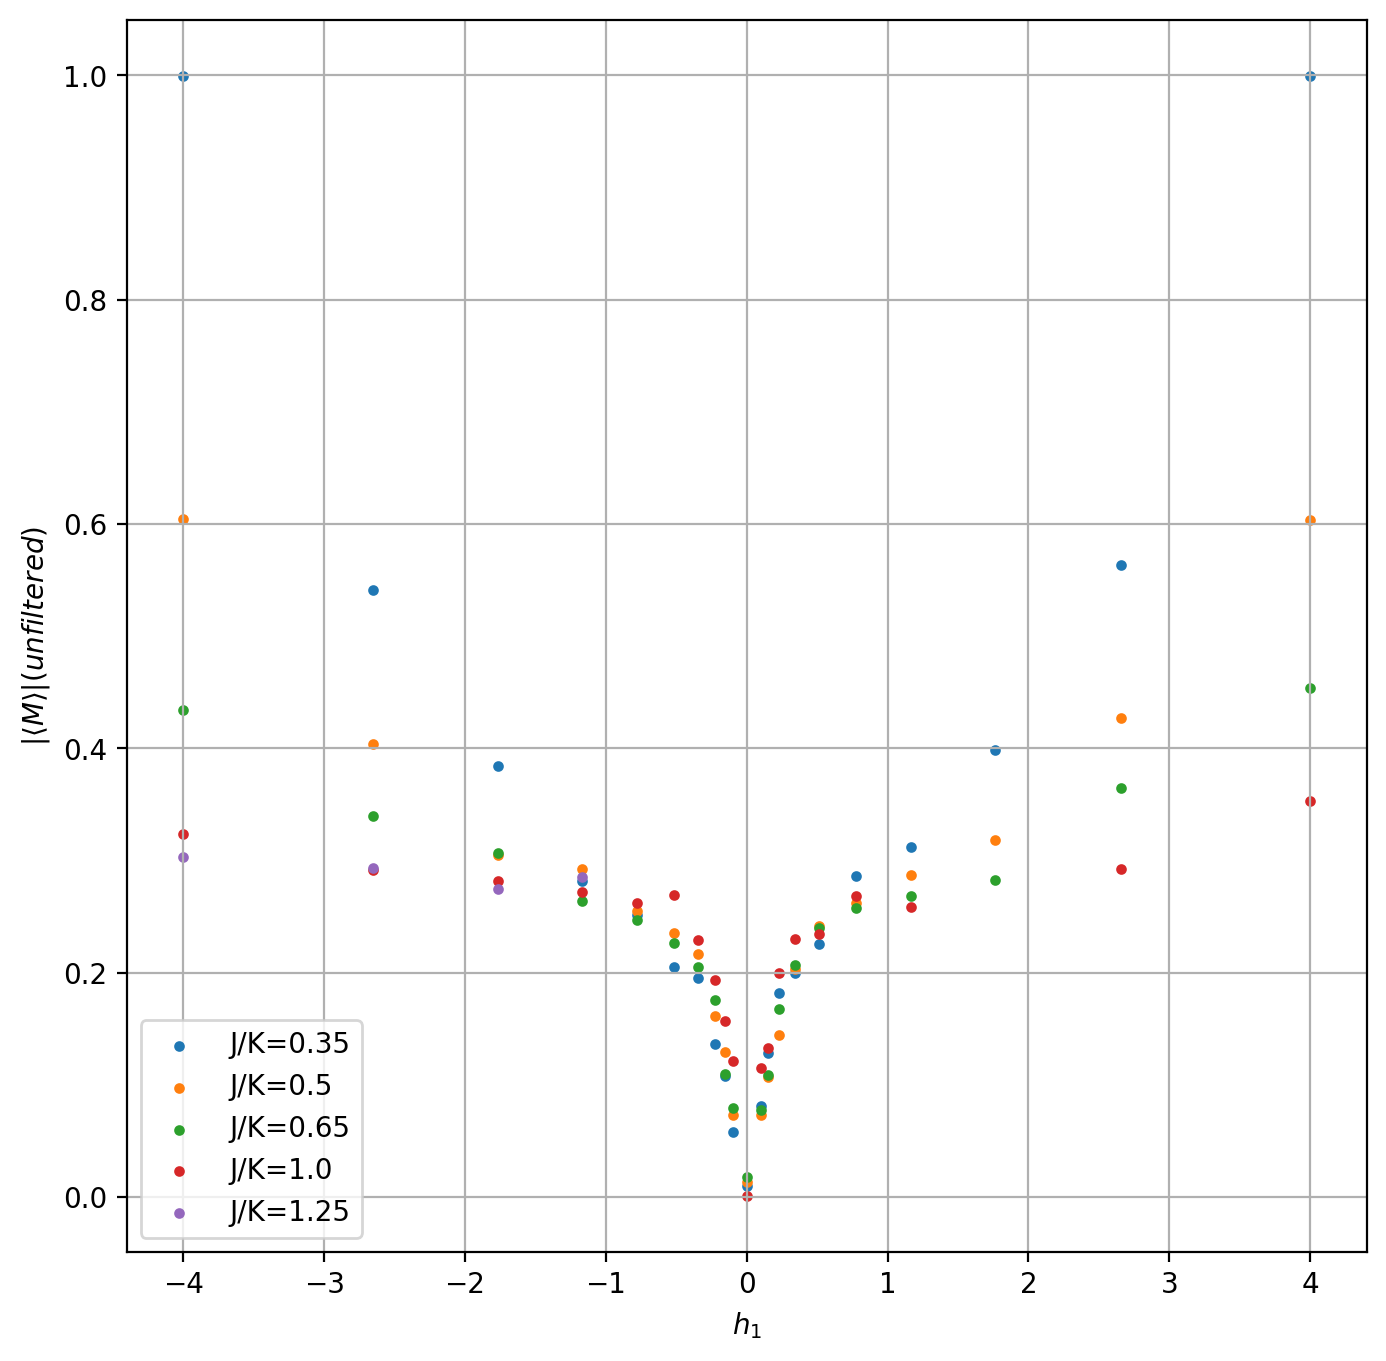

In [70]:
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['figure.dpi']=200

for i in range(bigarrnew.shape[1]):
    plt.scatter(bigarrnew[1][i],bigarrnew[2][i],label="J/K="+str(bigarrnew[0][i][0]/2),s=8)
    print(bigarrnew[1][i],bigarrnew[2][i],"J/K=",str(bigarrnew[0][i][0]/2))


# # plt.errorbar(h1s,avgmags,yerr=sds,fmt='o')
# plt.figtext(x=1.0,y=0.5,s="K="+k2)
# plt.figtext(x=1.0,y=0.4,s="J="+j)
plt.grid(True)
plt.xlabel(r'$ h_1 $')
plt.ylabel(r'$ |\langle M \rangle| (unfiltered) $')

plt.legend()

plt.show()

In [71]:
bigarrnew.shape[1]

5

# magnetization time series h=1.8

rev_sch = [[0.0, 1.0], [(1 - s), s], [(1 - s) + tpause, s],
                   [2 * (1 - s) + tpause, 1]]
tpause=50

m=1/3 initial state

In [72]:
initstate_folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8/magtimeseries_h=1.8_m=0.3_03-29-23--18').glob('*'))
initstates=[]
for file in initstate_folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            file=np.load(file)    
            resp=file['resp']
            paramsarray=file['paramsarray']
            missingqs=file['missingqs']
            twochains=file['twochains']
            nodes=file['final_nodes']
            initstates.append(resp[0][0])
        except ValueError:
            pass

In [73]:
folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8_2/magtimeseries_h=1.8_m=0.3_04-05-23--22').glob('*'))

h1_s=[]

for file in folder:
    name=os.path.basename(file)
    if name!='regs.npz':
        try:
            resp,paramsarray,missingqs,twochains,nodes=open_file(file)
            h1=float(paramsarray[1][2])
            s=float(paramsarray[1][4])
            h1_s.append((h1,s))
            k2=float(paramsarray[1][1])
            j=float(paramsarray[1][0])
        except ValueError:
            pass

h1_s=list(set(h1_s))
print(h1_s)

[(1.8, 0.2), (1.8, 0.8), (1.8, 0.6)]


In [74]:
timeseries_array = np.ones(shape=(3,101))

for i in range(len(h1_s)):
    combo = h1_s[i]
    print(combo)
    magarray = np.ones(shape=(10, 101))

    count = 0
    for file in folder:
        name = os.path.basename(file)
        if name != 'regs.npz':
            try:
                resp, paramsarray, missingqs, twochains, nodes = open_file(
                    file)
                h1 = float(paramsarray[1][2])
                s = float(paramsarray[1][4])
                k2 = float(paramsarray[1][1])
                j = float(paramsarray[1][0])

                
                if ((h1, s)) == combo:
#                     print(h1, s)

                    mags = []
                    trimeans_h1 = []
        
                    arr = initstates[count]
                    trimeans = []
                    for tri in alltrilist:
                        tripms = []
                        for qubit in tri:
                            index = np.where(nodes == qubit)[0][0]
                            tripms.append(arr[index])
                        #for each triangle in the lattice, average the sites and add it to the list
                        avg_over_tri = np.mean(tripms)
                        trimeans.append(avg_over_tri)
                    initstate_mag=np.mean(trimeans)
                    magarray[count][0]=initstate_mag

                    for j in range(len(resp)):
                        arr = resp[j][0]
                        trimeans = []
                        for tri in alltrilist:
                            tripms = []
                            for qubit in tri:
                                index = np.where(nodes == qubit)[0][0]
                                tripms.append(arr[index])
                            #for each triangle in the lattice, average the sites and add it to the list
                            avg_over_tri = np.mean(tripms)
                            trimeans.append(avg_over_tri)
                        #after doing all the triangles for a run, there should be 56 means (56 triangles)
                        #average these and add to this list
                        avg_over_alltris = np.mean(trimeans)
                        trimeans_h1.append(avg_over_alltris)
                    magarray[count][1:] = trimeans_h1
                    count += 1

            except ValueError:
                pass

#     timeseries_array[i]=(np.mean(magarray,axis=0))
        timeseries_array[i]=(np.mean(magarray,axis=0))

(1.8, 0.2)
(1.8, 0.8)
(1.8, 0.6)


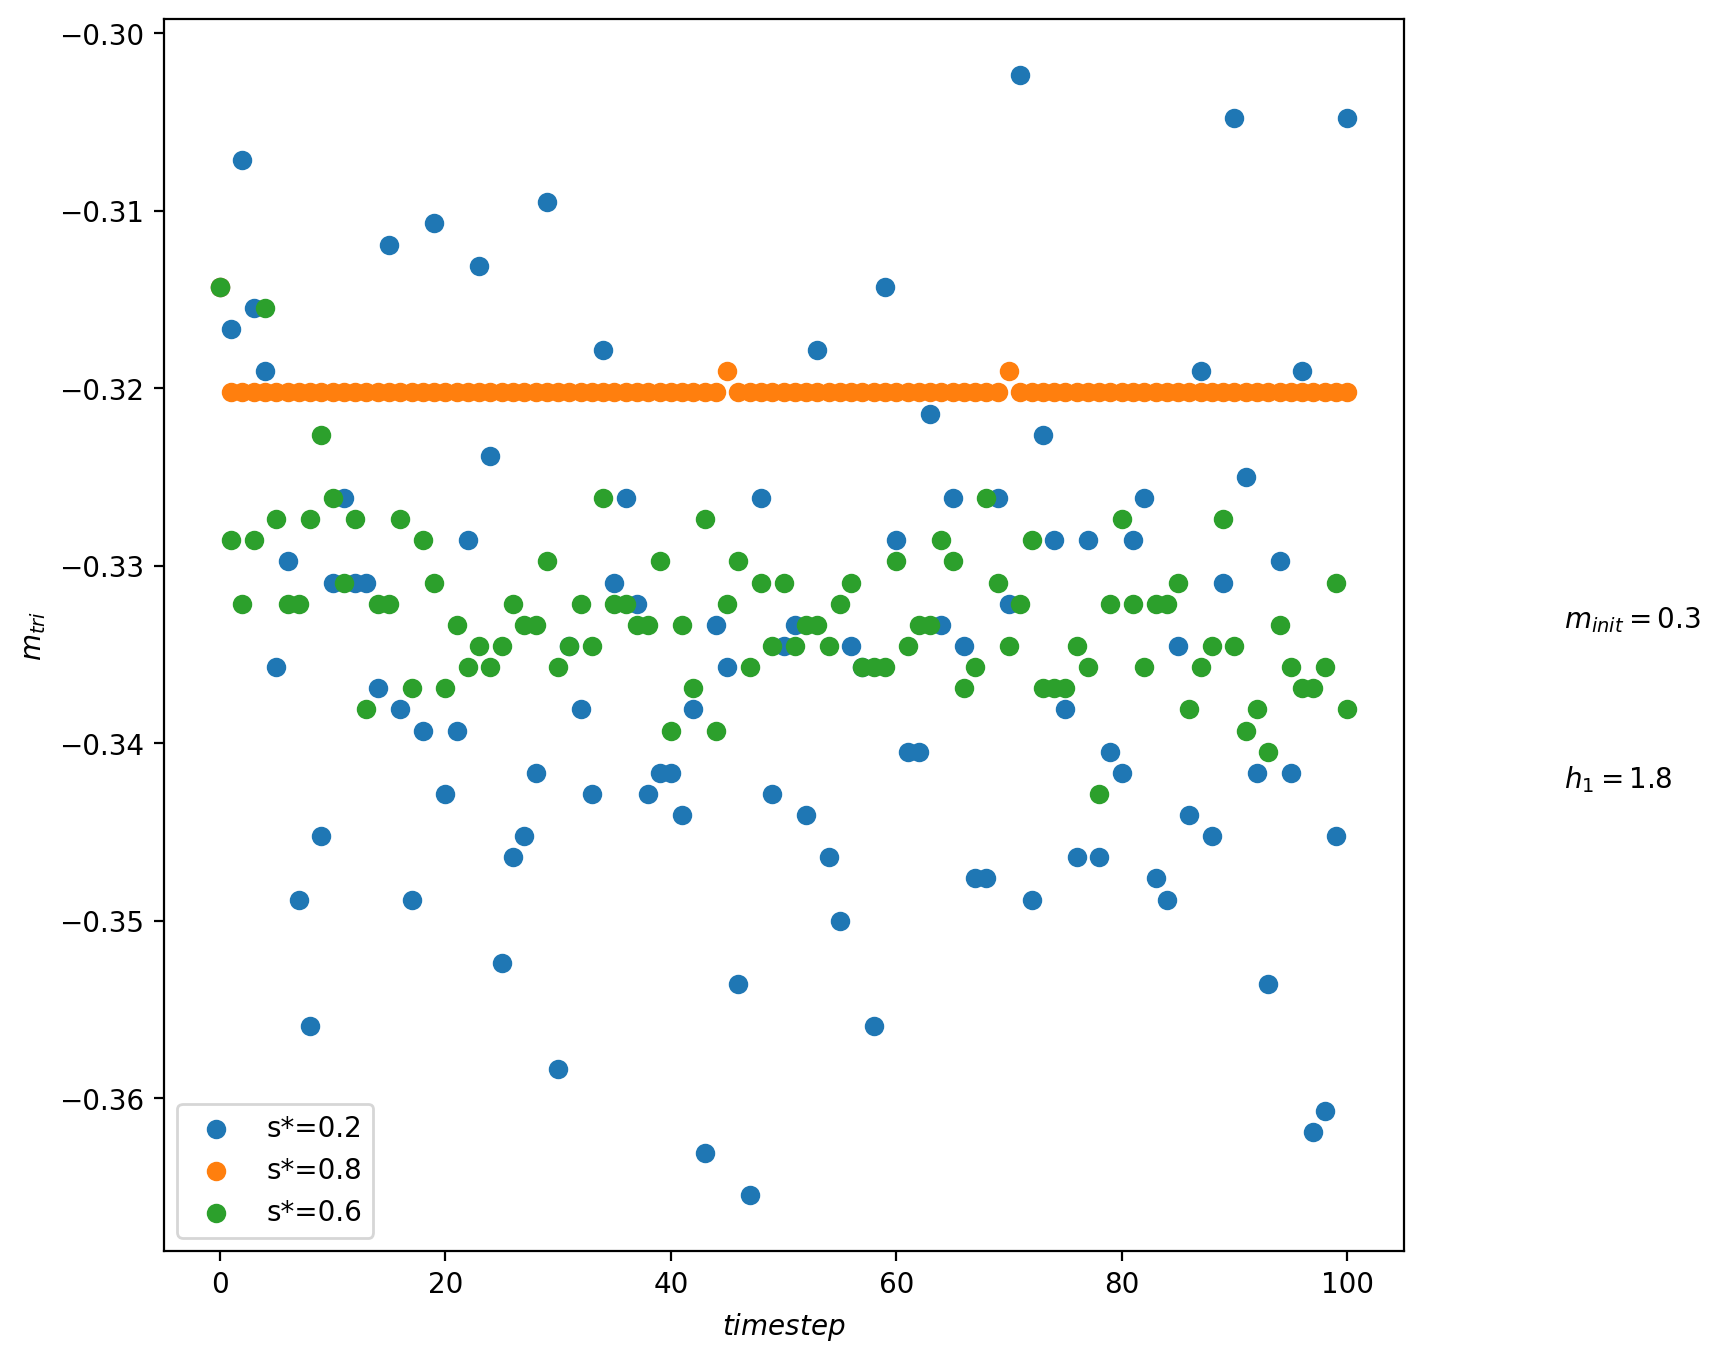

In [75]:
fig,ax=plt.subplots()
for i in range(len(timeseries_array)):
    ax.scatter(x=np.linspace(0,100,101),y=timeseries_array[i],label="s*="+str(h1_s[i][1]))
plt.figtext(s=r'$m_{init}=0.3$',x=1,y=0.5)
plt.figtext(s=r'$h_1=1.8$',x=1,y=0.4)
plt.xlabel(r'$timestep$')
plt.ylabel(r'$m_{tri}$')
plt.legend()
plt.show()

In [76]:
folder = list(
    Path(
        '/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8_2/magtimeseries_h=1.8_m=0.3_04-05-23--22'
    ).glob('*'))

nodes = sorted(nodes)

timeseries_array = np.ones(shape=(3, 101))

for i in range(len(h1_s)):
    combo = h1_s[i]
    print(combo)
    phiarray = np.ones(shape=(10, 101))

    count = 0
    for file in folder:
        name = os.path.basename(file)
        if name != 'regs.npz':
            try:
                resp, paramsarray, missingqs, twochains, nodes = open_file(
                    file)
                h1 = float(paramsarray[1][2])
                s = float(paramsarray[1][4])
                k2 = float(paramsarray[1][1])
                j = float(paramsarray[1][0])

                if ((h1, s)) == combo:
                    #                     print(h1,s)

                    arr = initstates[count]
                    phi, phi_abs = phi_tri(arr, p, q, r, nodes)
                    phiarray[count][0] = phi_abs

                    phis = []
                    phis_abs = []
                    phi_reals = []
                    phi_imags = []
                    for j in range(len(resp)):
                        arr = resp[j][0]
                        phi, phi_abs = phi_tri(arr, p, q, r, nodes)

                        phis.append(phi)
                        phi_reals.append(np.real(phi))
                        phi_imags.append(np.imag(phi))
                        phis_abs.append(phi_abs)

                    phiarray[count][1:] = phis_abs
                    count += 1

    #                     #take norm before average
    #                     avg_phi_abs.append(np.mean(phis_abs))
    #                     avg_phi_reals.append(np.mean(phi_reals))
    #                     avg_phi_imags.append(np.mean(phi_imags))
    #                     sds.append(np.std(phis_abs))
    #                     #take norm after average

            except ValueError:
                pass
    timeseries_array[i] = np.mean(phiarray, axis=0)

(1.8, 0.2)
(1.8, 0.8)
(1.8, 0.6)


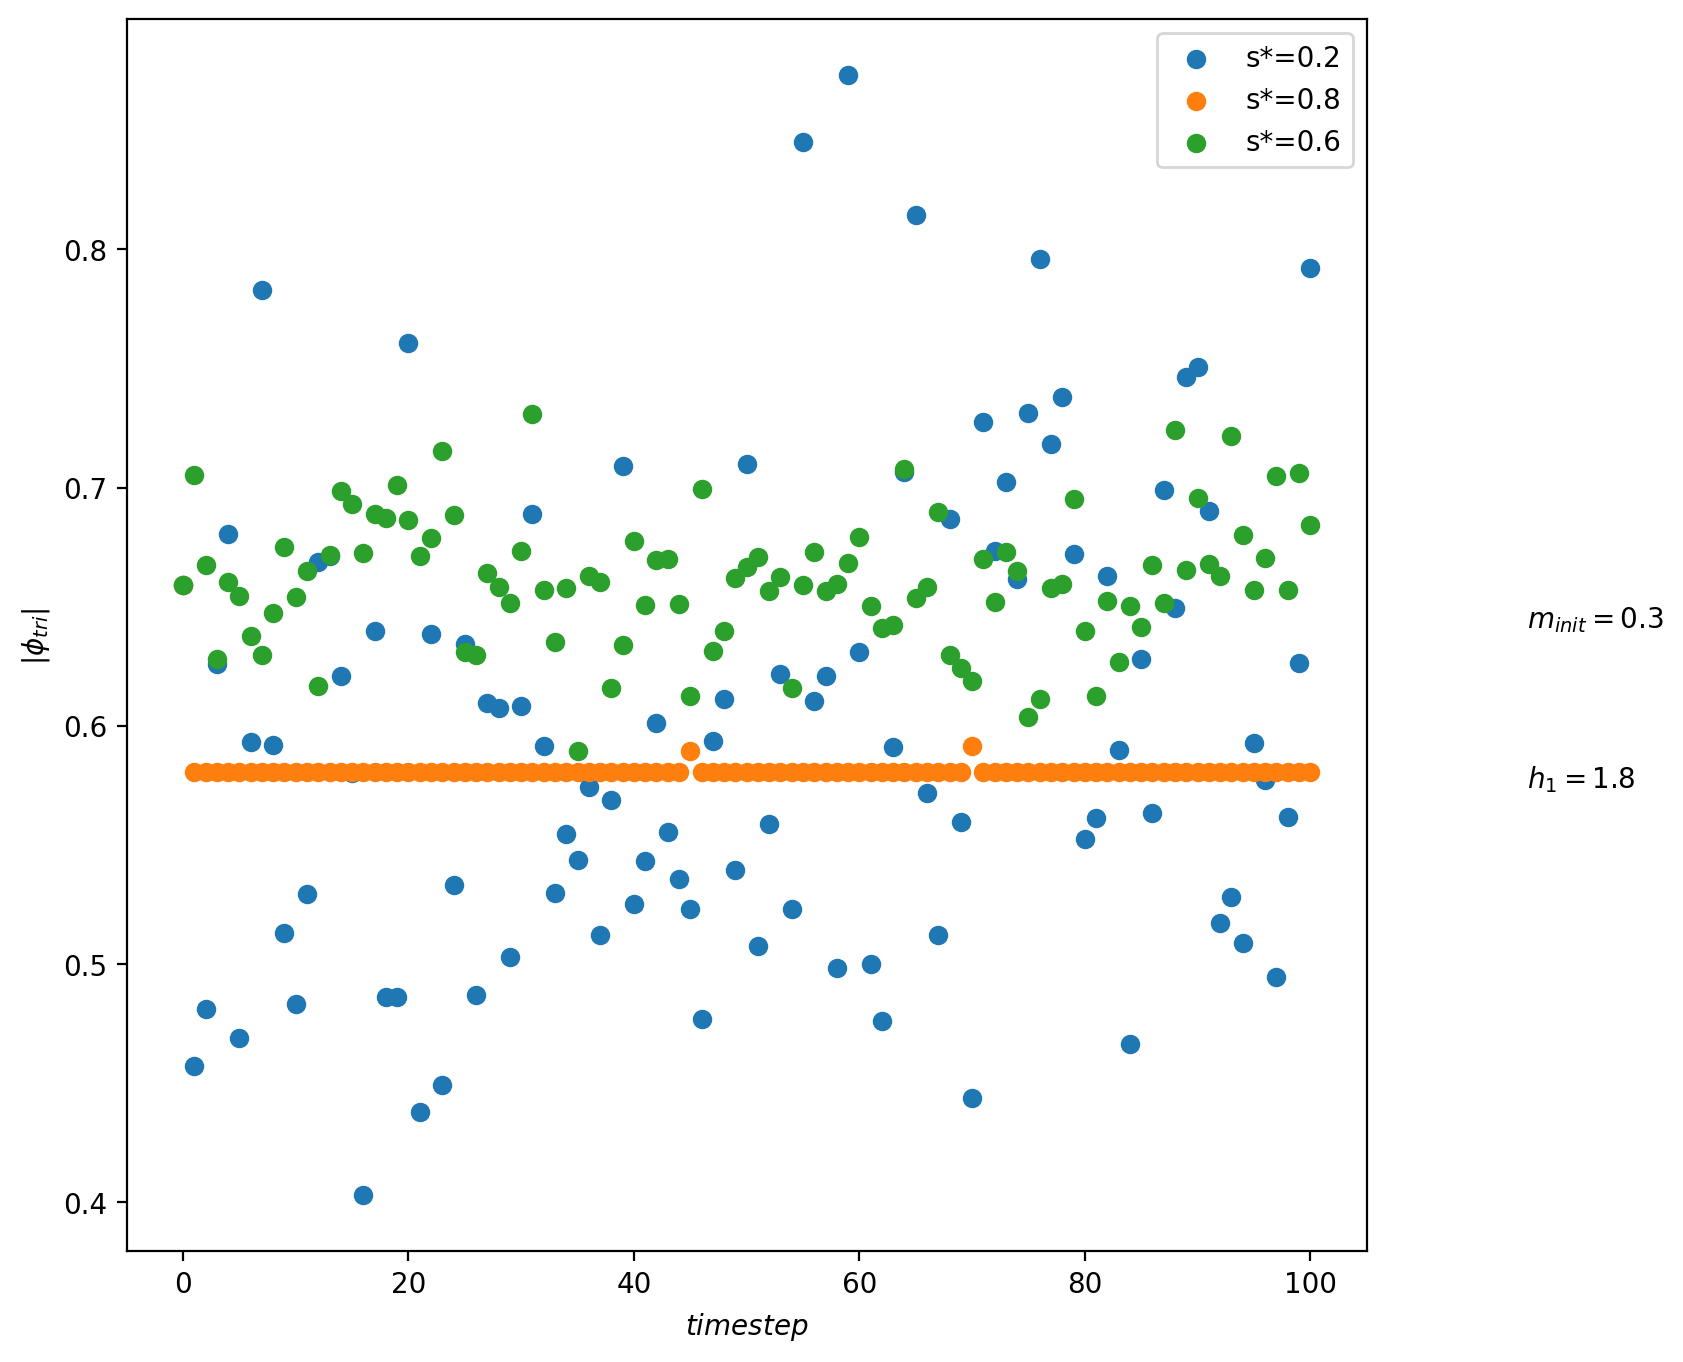

In [77]:
fig,ax=plt.subplots()
for i in range(len(timeseries_array)):
    ax.scatter(x=np.linspace(0,100,101),y=timeseries_array[i],label="s*="+str(h1_s[i][1]))
plt.figtext(s=r'$m_{init}=0.3$',x=1,y=0.5)
plt.figtext(s=r'$h_1=1.8$',x=1,y=0.4)
plt.xlabel(r'$timestep$')
plt.ylabel(r'$|\phi_{tri}|$')
plt.legend()
plt.show()

m=1 initial state

In [78]:
folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8_2/magtimeseries_h=1.8_m=1_04-05-23--22').glob('*'))

timeseries_array = np.ones(shape=(3,101))

for i in range(len(h1_s)):
    combo = h1_s[i]
    print(combo)
    magarray = np.ones(shape=(10, 101))

    count = 0
    for file in folder:
        name = os.path.basename(file)
        if name != 'regs.npz':
            try:
                resp, paramsarray, missingqs, twochains, nodes = open_file(
                    file)
                h1 = float(paramsarray[1][2])
                s = float(paramsarray[1][4])
                k2 = float(paramsarray[1][1])
                j = float(paramsarray[1][0])

                
                if ((h1, s)) == combo:
#                     print(h1, s)

                    mags = []
                    h1glob, sglob = h1, s
                    trimeans_h1 = []

                    magarray[count][0]=1

                    for j in range(len(resp)):
                        arr = resp[j][0]
                        trimeans = []
                        for tri in alltrilist:
                            tripms = []
                            for qubit in tri:
                                index = np.where(nodes == qubit)[0][0]
                                tripms.append(arr[index])
                            #for each triangle in the lattice, average the sites and add it to the list
                            avg_over_tri = np.mean(tripms)
                            trimeans.append(avg_over_tri)
                        #after doing all the triangles for a run, there should be 56 means (56 triangles)
                        #average these and add to this list
                        avg_over_alltris = np.mean(trimeans)
                        trimeans_h1.append(avg_over_alltris)
                    magarray[count][1:] = trimeans_h1
                    count += 1

            except ValueError:
                pass

#     timeseries_array[i]=(np.mean(magarray,axis=0))
        timeseries_array[i]=(np.mean(magarray,axis=0))

(1.8, 0.2)
(1.8, 0.8)
(1.8, 0.6)


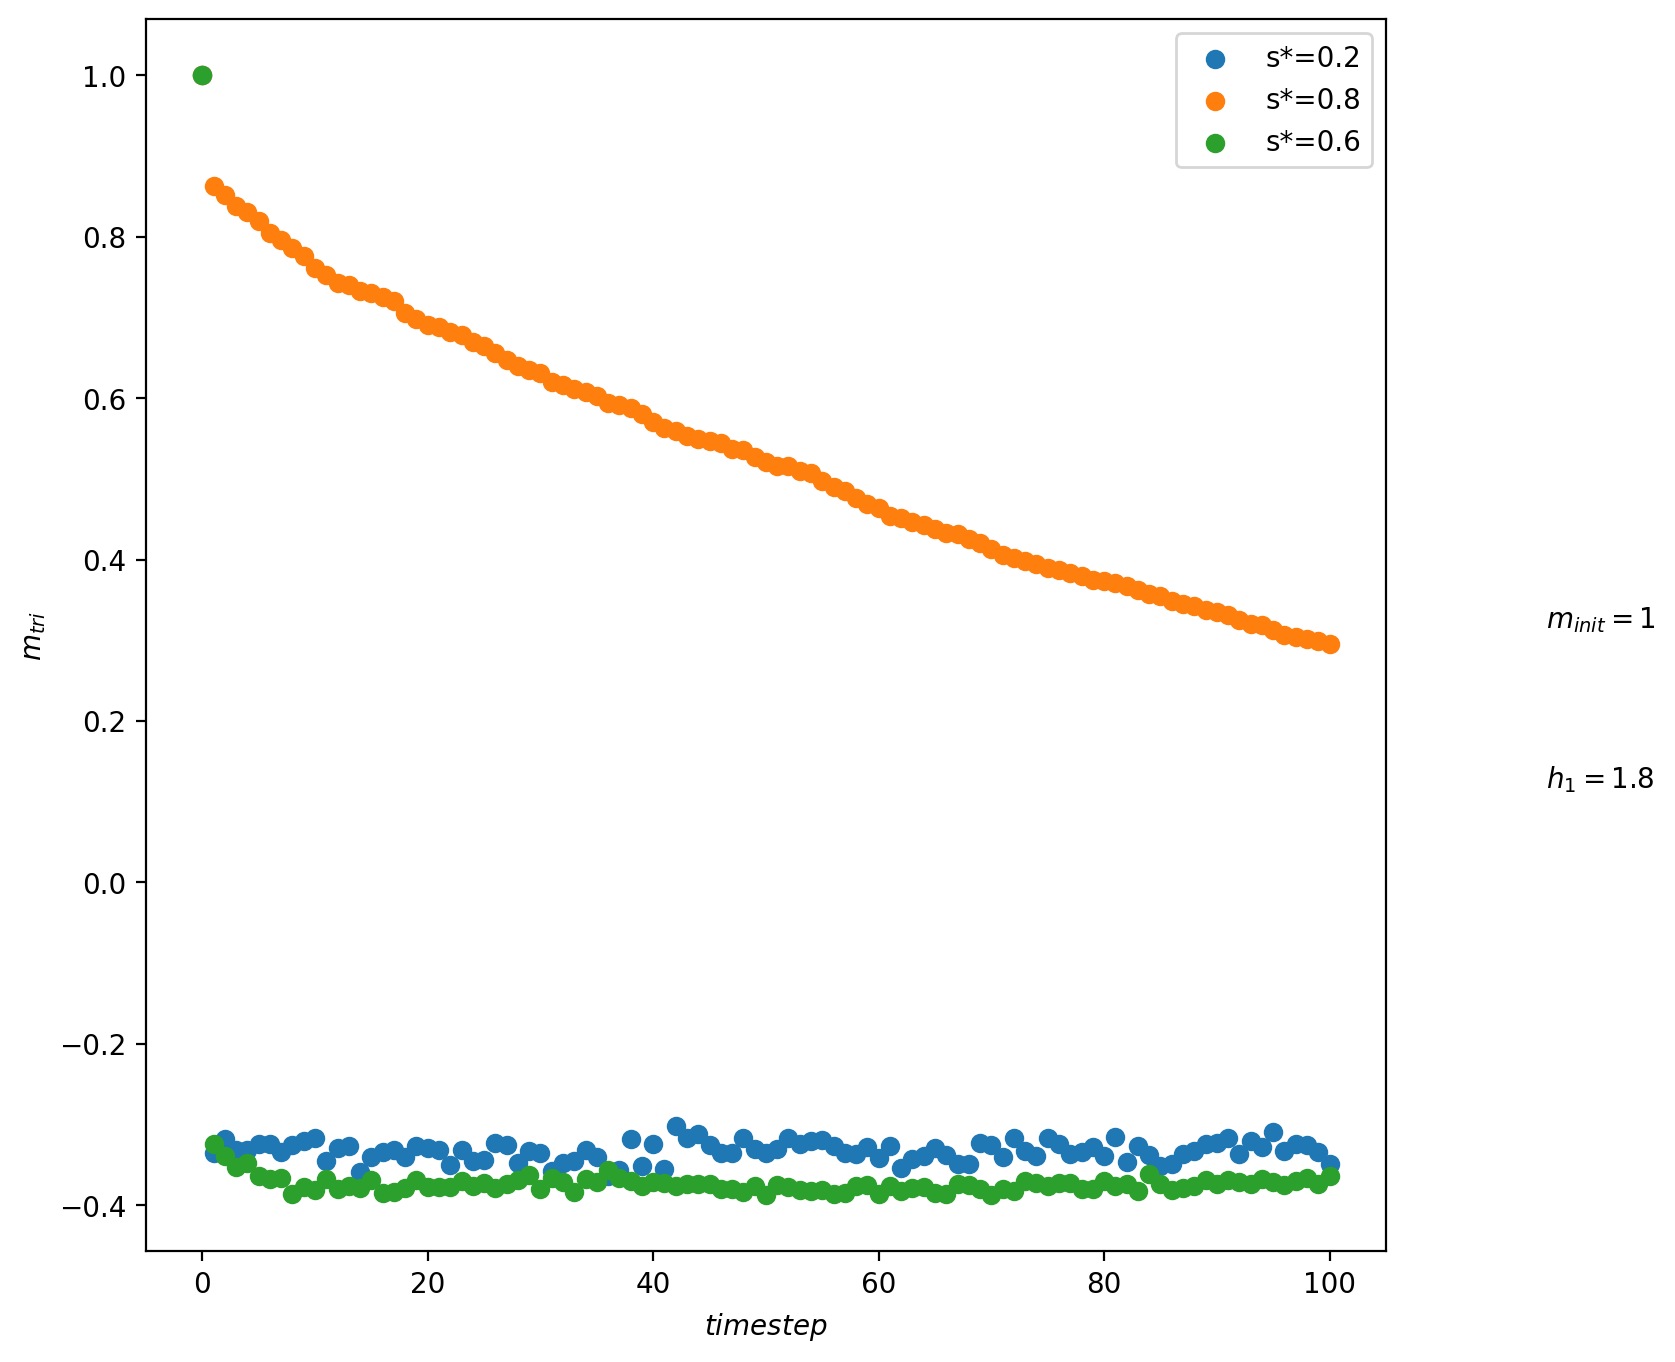

In [79]:
fig,ax=plt.subplots()
for i in range(len(timeseries_array)):
    ax.scatter(x=np.linspace(0,100,101),y=timeseries_array[i],label="s*="+str(h1_s[i][1]))
plt.figtext(s=r'$m_{init}=1$',x=1,y=0.5)
plt.figtext(s=r'$h_1=1.8$',x=1,y=0.4)
plt.xlabel(r'$timestep$')
plt.ylabel(r'$m_{tri}$')
plt.legend()
plt.show()

In [80]:
folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8_2/magtimeseries_h=1.8_m=1_04-05-23--22').glob('*'))

nodes=sorted(nodes)

timeseries_array = np.ones(shape=(3,101))

for i in range(len(h1_s)):
    combo = h1_s[i]
    print(combo)
    phiarray = np.ones(shape=(10, 101))
    


    count = 0
    for file in folder:
        name = os.path.basename(file)
        if name != 'regs.npz':
            try:
                resp, paramsarray, missingqs, twochains, nodes = open_file(
                    file)
                h1 = float(paramsarray[1][2])
                s = float(paramsarray[1][4])
                k2 = float(paramsarray[1][1])
                j = float(paramsarray[1][0])


                if ((h1, s)) == combo:
#                     print(h1,s)

                    arr = np.ones(len(nodes))
                    phi, phi_abs = phi_tri(arr, p, q, r, nodes)
                    phiarray[count][0] = phi_abs

                    phis = []
                    phis_abs = []
                    phi_reals = []
                    phi_imags = []
                    for j in range(len(resp)):
                        arr = resp[j][0]
                        phi, phi_abs = phi_tri(arr, p, q, r, nodes)

                        phi_abs=np.real(phi)**2+np.imag(phi)**2
                        phis.append(phi)
                        phi_reals.append(np.real(phi))
                        phi_imags.append(np.imag(phi))
                        phis_abs.append(phi_abs)

                    phiarray[count][1:] = phis_abs
                    count += 1


    #                     #take norm before average
    #                     avg_phi_abs.append(np.mean(phis_abs))
    #                     avg_phi_reals.append(np.mean(phi_reals))
    #                     avg_phi_imags.append(np.mean(phi_imags))
    #                     sds.append(np.std(phis_abs))
    #                     #take norm after average

            except ValueError:
                pass
    timeseries_array[i]=np.mean(phiarray,axis=0)




(1.8, 0.2)
(1.8, 0.8)
(1.8, 0.6)


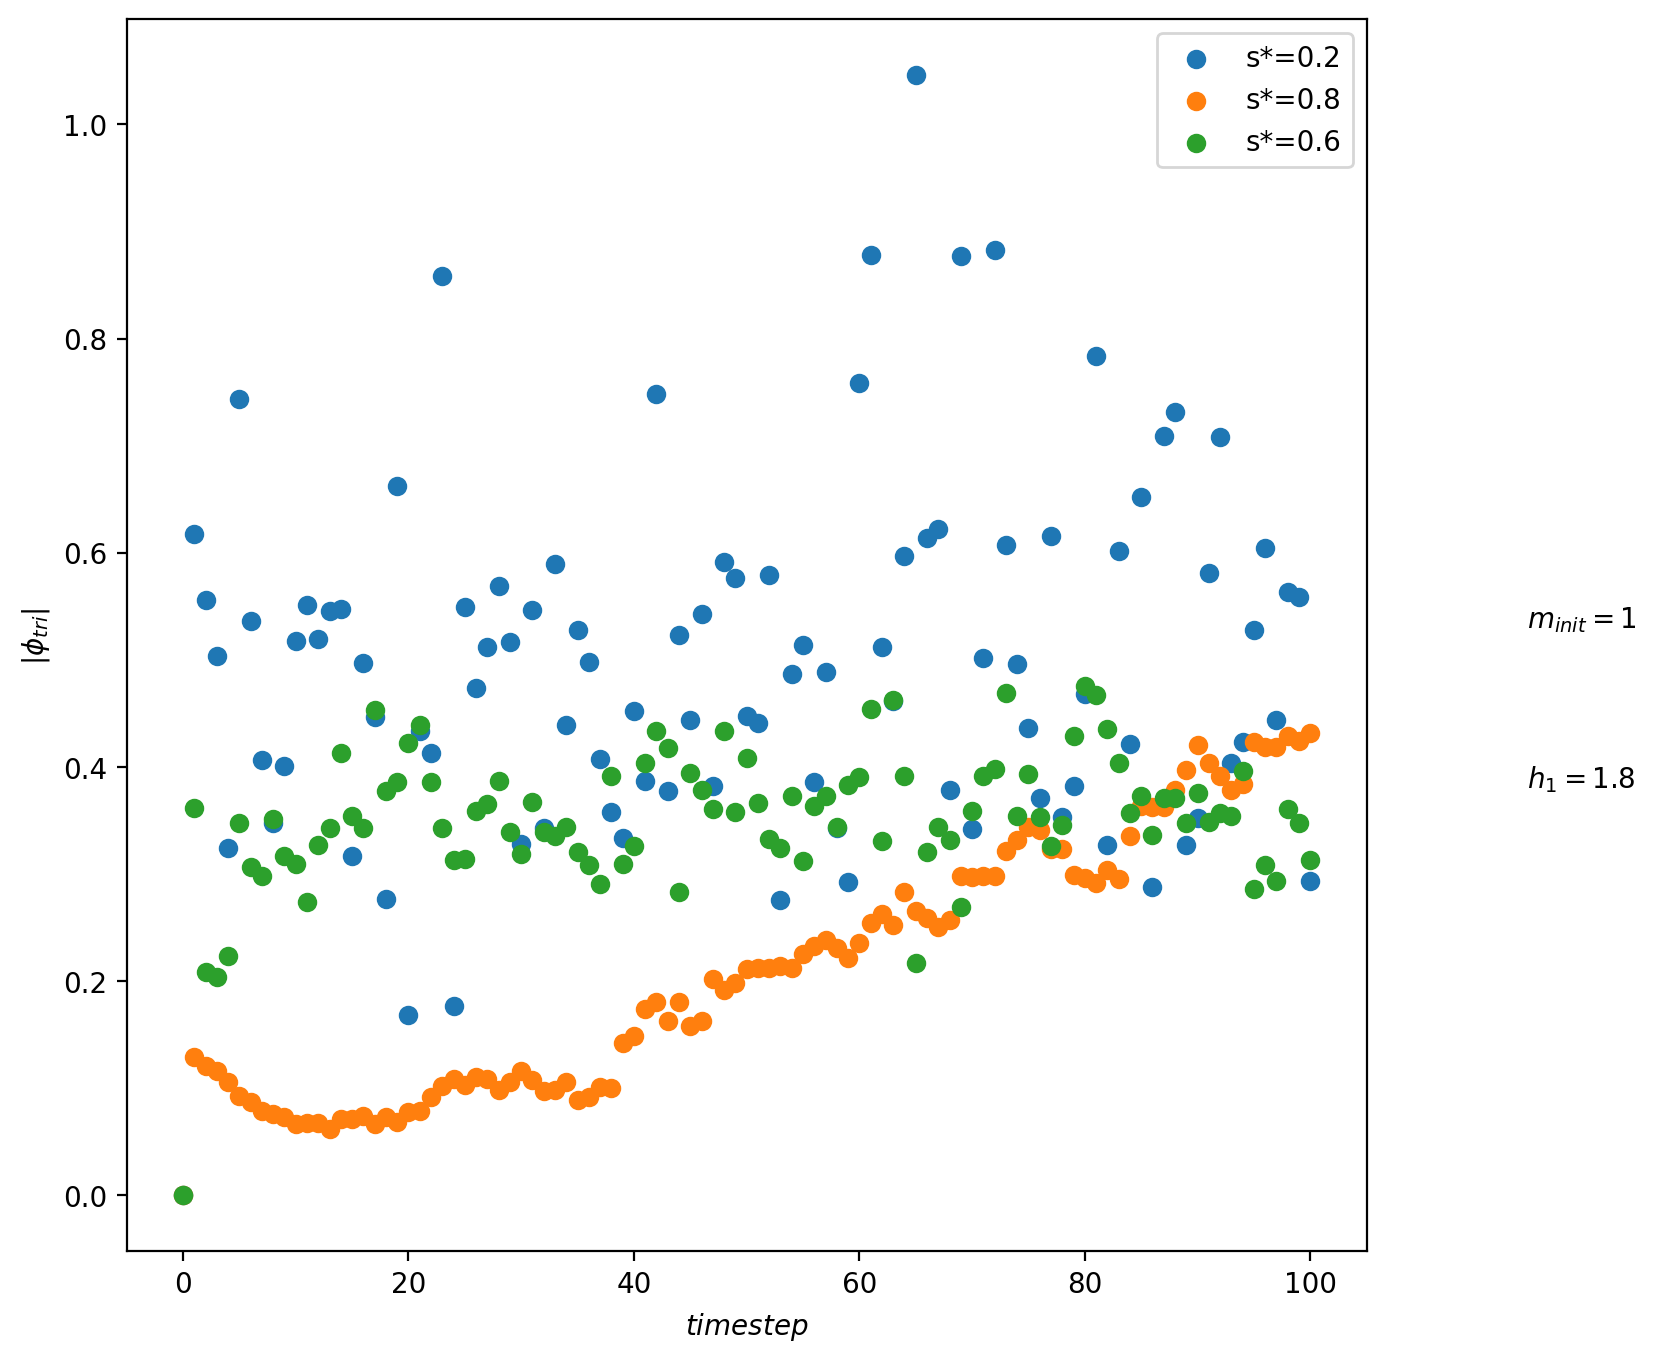

In [81]:
fig,ax=plt.subplots()
for i in range(len(timeseries_array)):
    ax.scatter(x=np.linspace(0,100,101),y=timeseries_array[i],label="s*="+str(h1_s[i][1]))
plt.figtext(s=r'$m_{init}=1$',x=1,y=0.5)
plt.figtext(s=r'$h_1=1.8$',x=1,y=0.4)
plt.xlabel(r'$timestep$')
plt.ylabel(r'$|\phi_{tri}|$')
plt.legend()
plt.show()

m=-1 initial state

In [82]:
folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8_2/magtimeseries_h=1.8_m=-1_04-05-23--22').glob('*'))

timeseries_array = np.ones(shape=(3,101))

for i in range(len(h1_s)):
    combo = h1_s[i]
    print(combo)
    magarray = np.ones(shape=(10, 101))

    count = 0
    for file in folder:
        name = os.path.basename(file)
        if name != 'regs.npz':
            try:
                resp, paramsarray, missingqs, twochains, nodes = open_file(
                    file)
                h1 = float(paramsarray[1][2])
                s = float(paramsarray[1][4])
                k2 = float(paramsarray[1][1])
                j = float(paramsarray[1][0])

                
                if ((h1, s)) == combo:
#                     print(h1, s)

                    mags = []
                    h1glob, sglob = h1, s
                    trimeans_h1 = []

                    magarray[count][0]=-1

                    for j in range(len(resp)):
                        arr = resp[j][0]
                        trimeans = []
                        for tri in alltrilist:
                            tripms = []
                            for qubit in tri:
                                index = np.where(nodes == qubit)[0][0]
                                tripms.append(arr[index])
                            #for each triangle in the lattice, average the sites and add it to the list
                            avg_over_tri = np.mean(tripms)
                            trimeans.append(avg_over_tri)
                        #after doing all the triangles for a run, there should be 56 means (56 triangles)
                        #average these and add to this list
                        avg_over_alltris = np.mean(trimeans)
                        trimeans_h1.append(avg_over_alltris)
                    magarray[count][1:] = trimeans_h1
                    count += 1

            except ValueError:
                pass

#     timeseries_array[i]=(np.mean(magarray,axis=0))
        timeseries_array[i]=(np.mean(magarray,axis=0))

(1.8, 0.2)
(1.8, 0.8)
(1.8, 0.6)


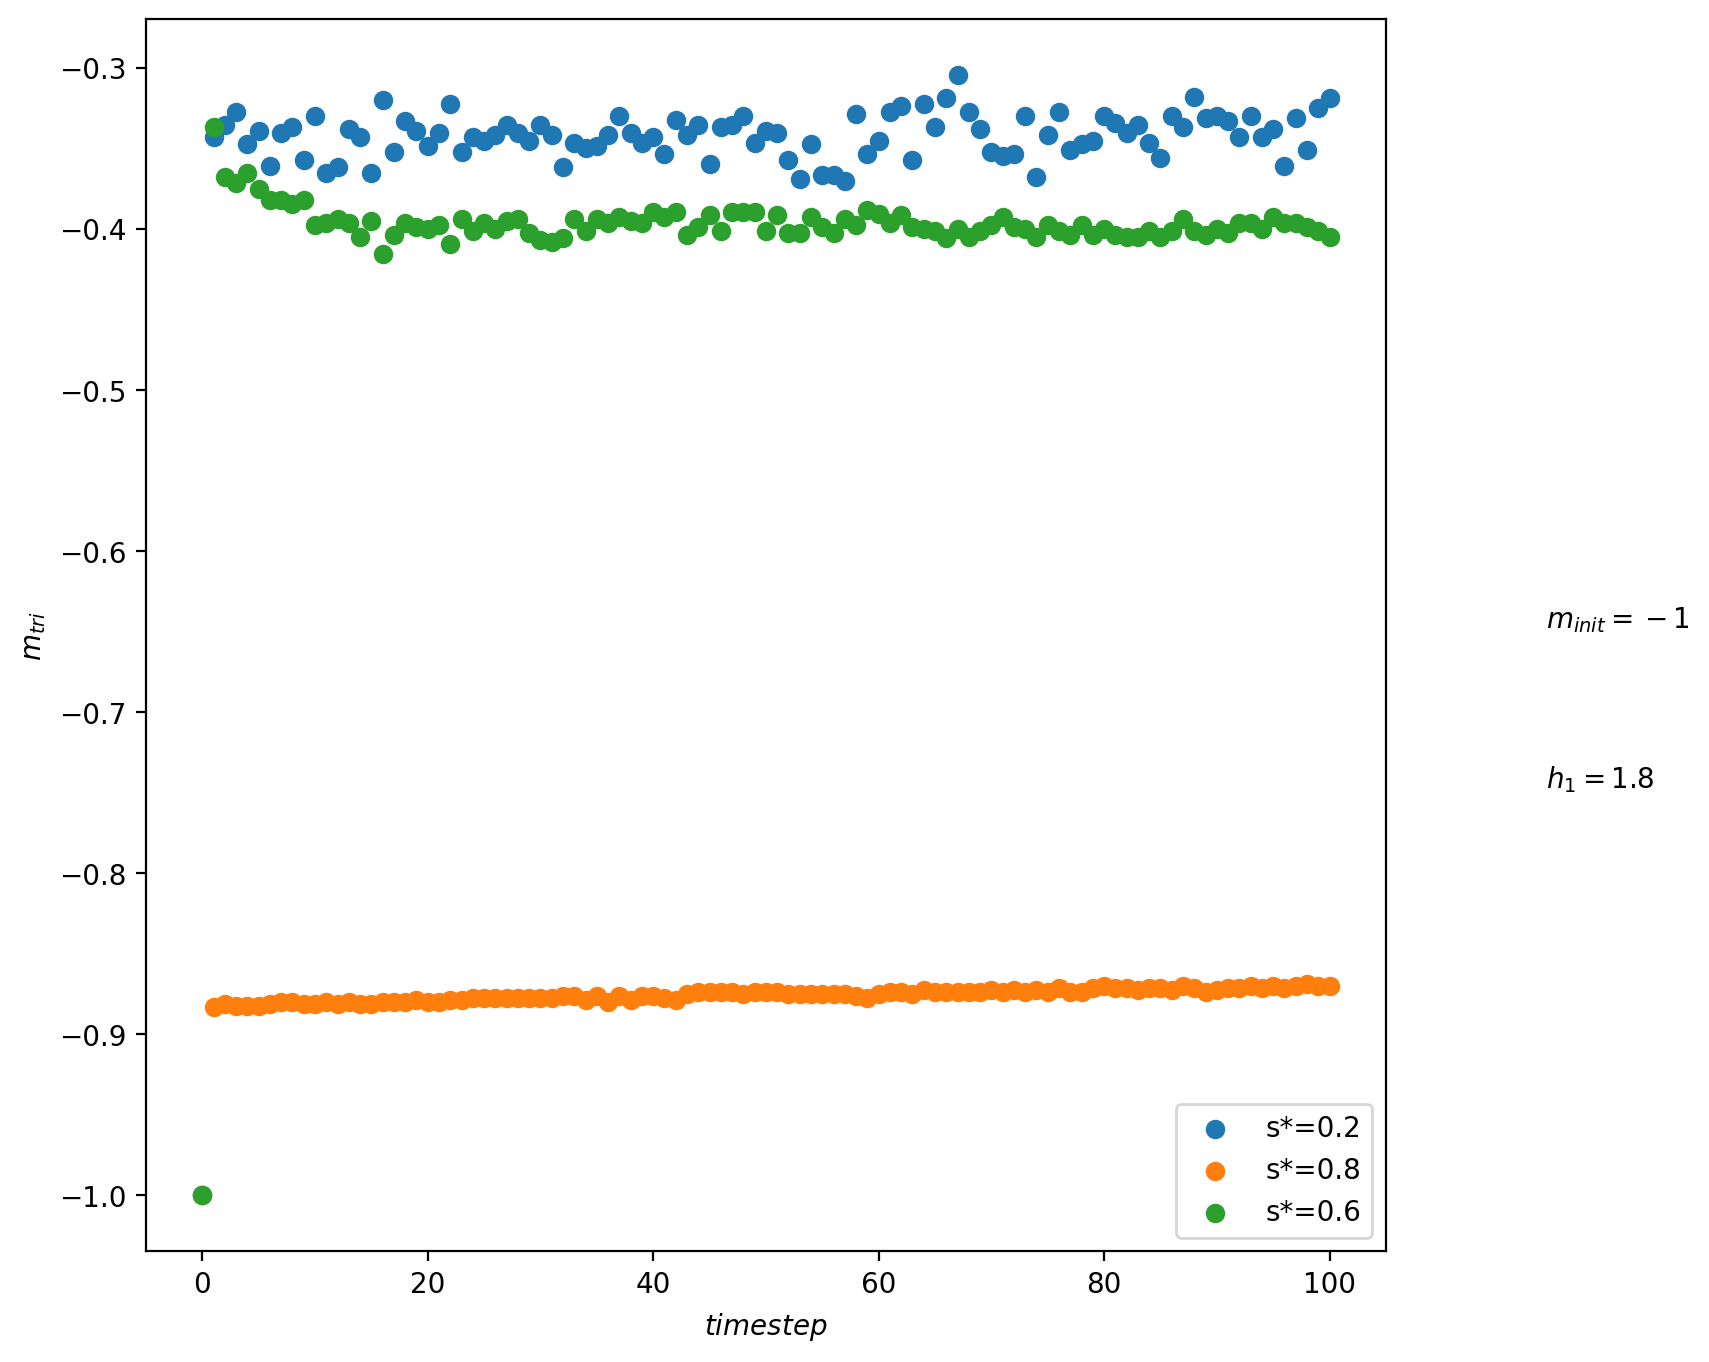

In [83]:
fig,ax=plt.subplots()
for i in range(len(timeseries_array)):
    ax.scatter(x=np.linspace(0,100,101),y=timeseries_array[i],label="s*="+str(h1_s[i][1]))
plt.figtext(s=r'$m_{init}=-1$',x=1,y=0.5)
plt.figtext(s=r'$h_1=1.8$',x=1,y=0.4)
plt.xlabel(r'$timestep$')
plt.ylabel(r'$m_{tri}$')
plt.legend()
plt.show()

In [84]:
folder=list(Path('/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/magtimeseries_h=1.8_2/magtimeseries_h=1.8_m=-1_04-05-23--22').glob('*'))

nodes=sorted(nodes)

timeseries_array = np.ones(shape=(3,101))

for i in range(len(h1_s)):
    combo = h1_s[i]
    print(combo)
    phiarray = np.ones(shape=(10, 101))
    

    count = 0
    for file in folder:
        name = os.path.basename(file)
        if name != 'regs.npz':
            try:
                resp, paramsarray, missingqs, twochains, nodes = open_file(
                    file)
                h1 = float(paramsarray[1][2])
                s = float(paramsarray[1][4])
                k2 = float(paramsarray[1][1])
                j = float(paramsarray[1][0])


                if ((h1, s)) == combo:
#                     print(h1,s)

                    arr = -1*np.ones(len(nodes))
                    phi, phi_abs = phi_tri(arr, p, q, r, nodes)
                    phiarray[count][0] = phi_abs

                    phis = []
                    phis_abs = []
                    phi_reals = []
                    phi_imags = []
                    for j in range(len(resp)):
                        arr = resp[j][0]
                        phi, phi_abs = phi_tri(arr, p, q, r, nodes)

                        phi_abs=np.real(phi)**2+np.imag(phi)**2
                        phis.append(phi)
                        phi_reals.append(np.real(phi))
                        phi_imags.append(np.imag(phi))
                        phis_abs.append(phi_abs)

                    phiarray[count][1:] = phis_abs
                    count += 1


    #                     

            except ValueError:
                pass
    timeseries_array[i]=np.mean(phiarray,axis=0)




(1.8, 0.2)
(1.8, 0.8)
(1.8, 0.6)


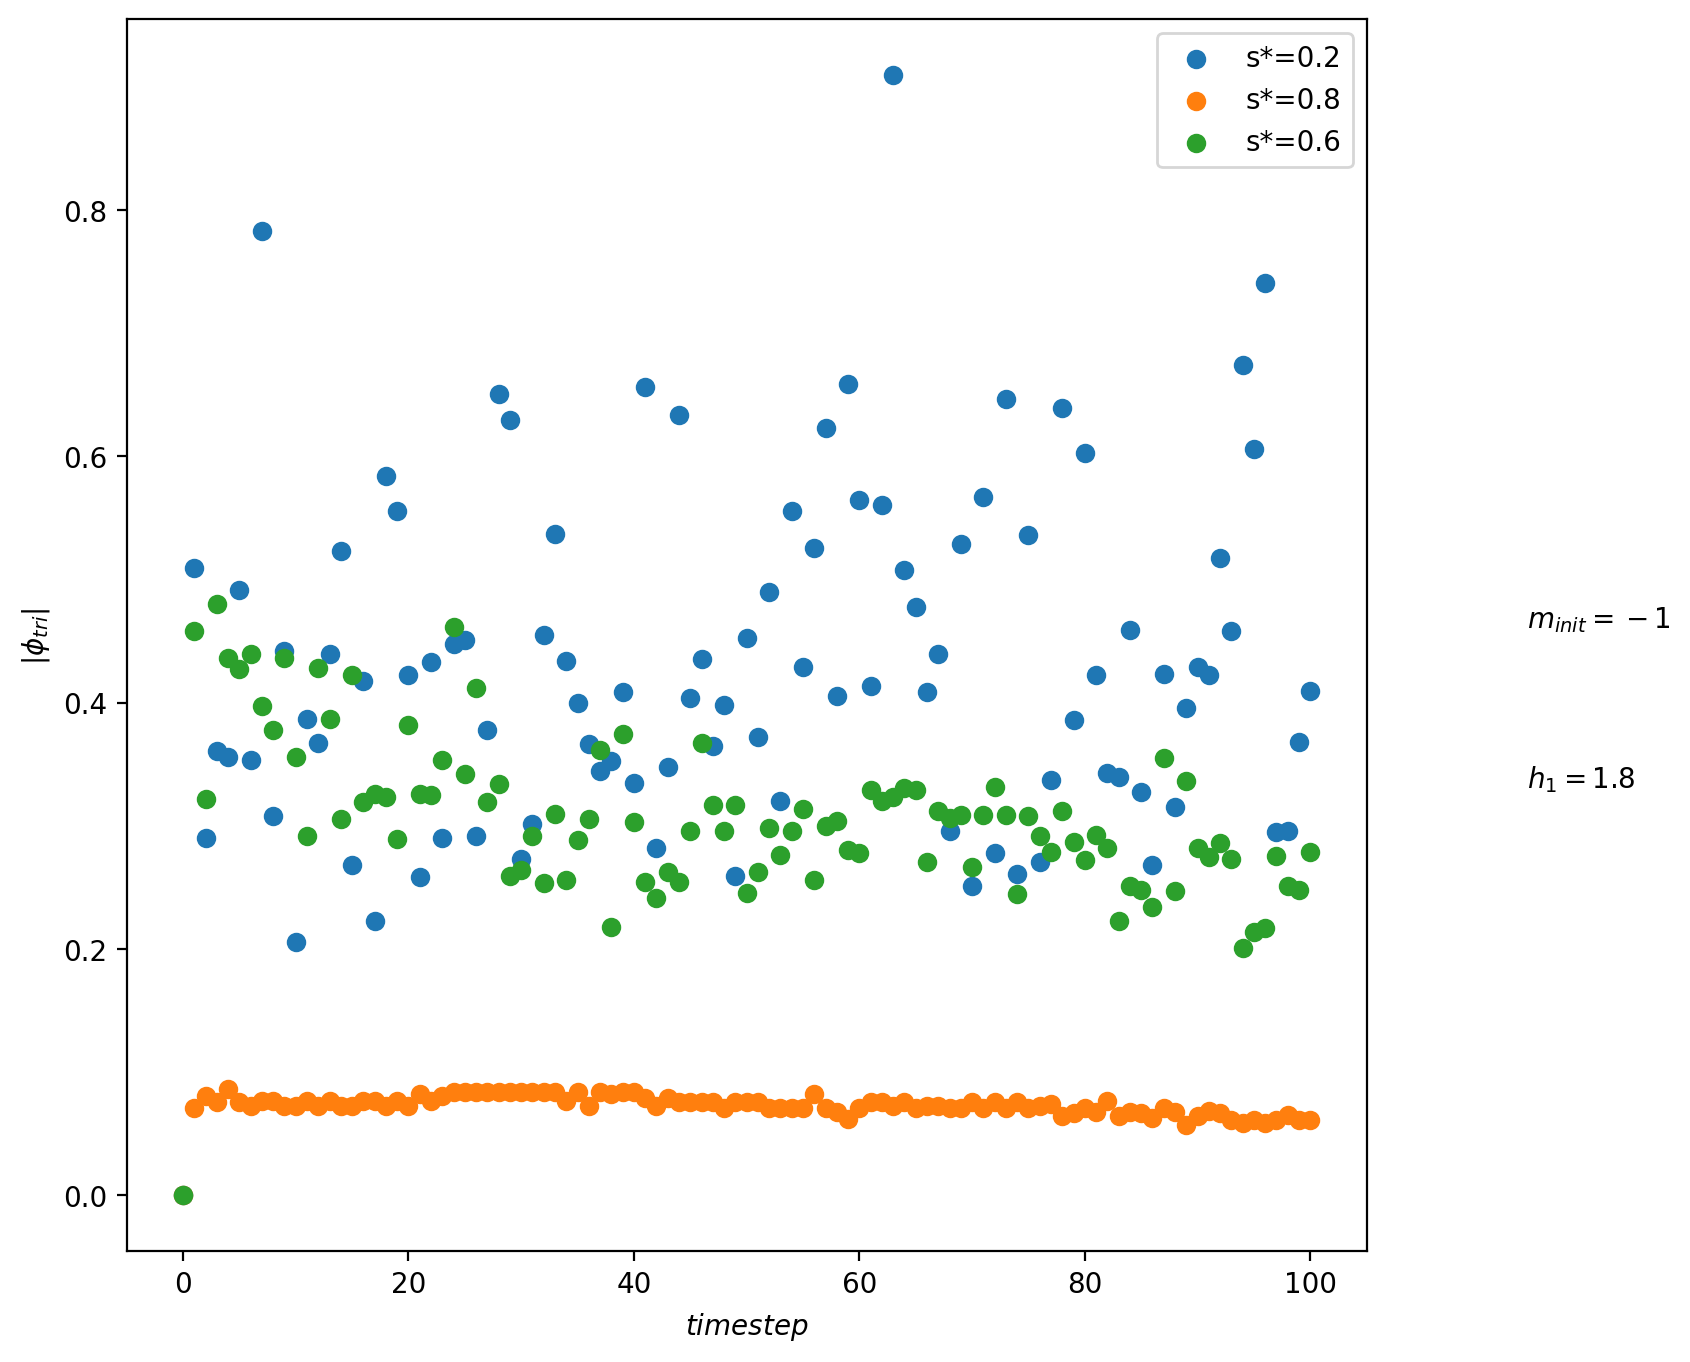

In [85]:
fig,ax=plt.subplots()
for i in range(len(timeseries_array)):
    ax.scatter(x=np.linspace(0,100,101),y=timeseries_array[i],label="s*="+str(h1_s[i][1]))
plt.figtext(s=r'$m_{init}=-1$',x=1,y=0.5)
plt.figtext(s=r'$h_1=1.8$',x=1,y=0.4)
plt.xlabel(r'$timestep$')
plt.ylabel(r'$|\phi_{tri}|$')
plt.legend()
plt.show()

# Expt 1: gamma=0 fwd anneals 4/6 runs

In [86]:
mainfolder = list(
    Path(
        '/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 46'
    ).glob('*'))

anntimes = []
bigarray = np.zeros(shape=(4, 3, 51))

anntimecount = 0
for foldername in mainfolder:
    print(foldername)
    folderlist = list(foldername.glob('*'))

    #take care of ds checkpoint folder
    if len(folderlist) != 0:
        #get anneal time from folder name
        anntime = float(
            str(foldername).split('_')[0].split('/')[-1].split('=')[1])
        anntimes.append(anntime)
        print(anntime)

        h1_mag_arr = np.zeros(shape=(3, 51))

        count = 0
        for file in folderlist:
            name = os.path.basename(file)
            if name != 'regs.npz':
                #             print(name)
                try:
                    resp, paramsarray, missingqs, twochains, nodes = open_file(
                        file)
                    h1 = float(paramsarray[1][2])
                    s = float(paramsarray[1][4])
                    h1_s.append((h1, s))
                    k2 = float(paramsarray[1][1])
                    j = float(paramsarray[1][0])

                    h1_mag_arr[0][count] = h1

                    trimeans_h1 = []

                    for j in range(len(resp)):
                        arr = resp[j][0]
                        frequency = resp[j][2]

                        trimeans = []
                        for tri in alltrilist:
                            tripms = []
                            for qubit in tri:
                                index = np.where(nodes == qubit)[0][0]
                                tripms.append(arr[index])
                            #for each triangle in the lattice, average the sites and add it to the list
                            avg_over_tri = np.mean(tripms)
                            trimeans.append(avg_over_tri)
                        #after doing all the triangles for a run, there should be 56 means (56 triangles)
                        #average these and add to this list
                        avg_over_alltris = np.mean(trimeans)

                        for k in range(frequency):
                            trimeans_h1.append(avg_over_alltris)
                    if len(trimeans_h1) != 100:
                        print(len(trimeans_h1))
                    h1_mag_arr[1][count] = np.mean(trimeans_h1)
                    h1_mag_arr[2][count] = np.std(trimeans_h1)
                    count += 1

                except ValueError:
                    pass

#         print(h1_mag_arr)
        bigarray[anntimecount] = h1_mag_arr
        anntimecount += 1
print("done")

/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 46/anntime=50_04-06-23--00
50.0
/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 46/anntime=500_04-06-23--00
500.0
/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 46/.DS_Store
/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 46/anntime=100_04-06-23--00
100.0
/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 46/anntime=1000_04-06-23--00
1000.0
done


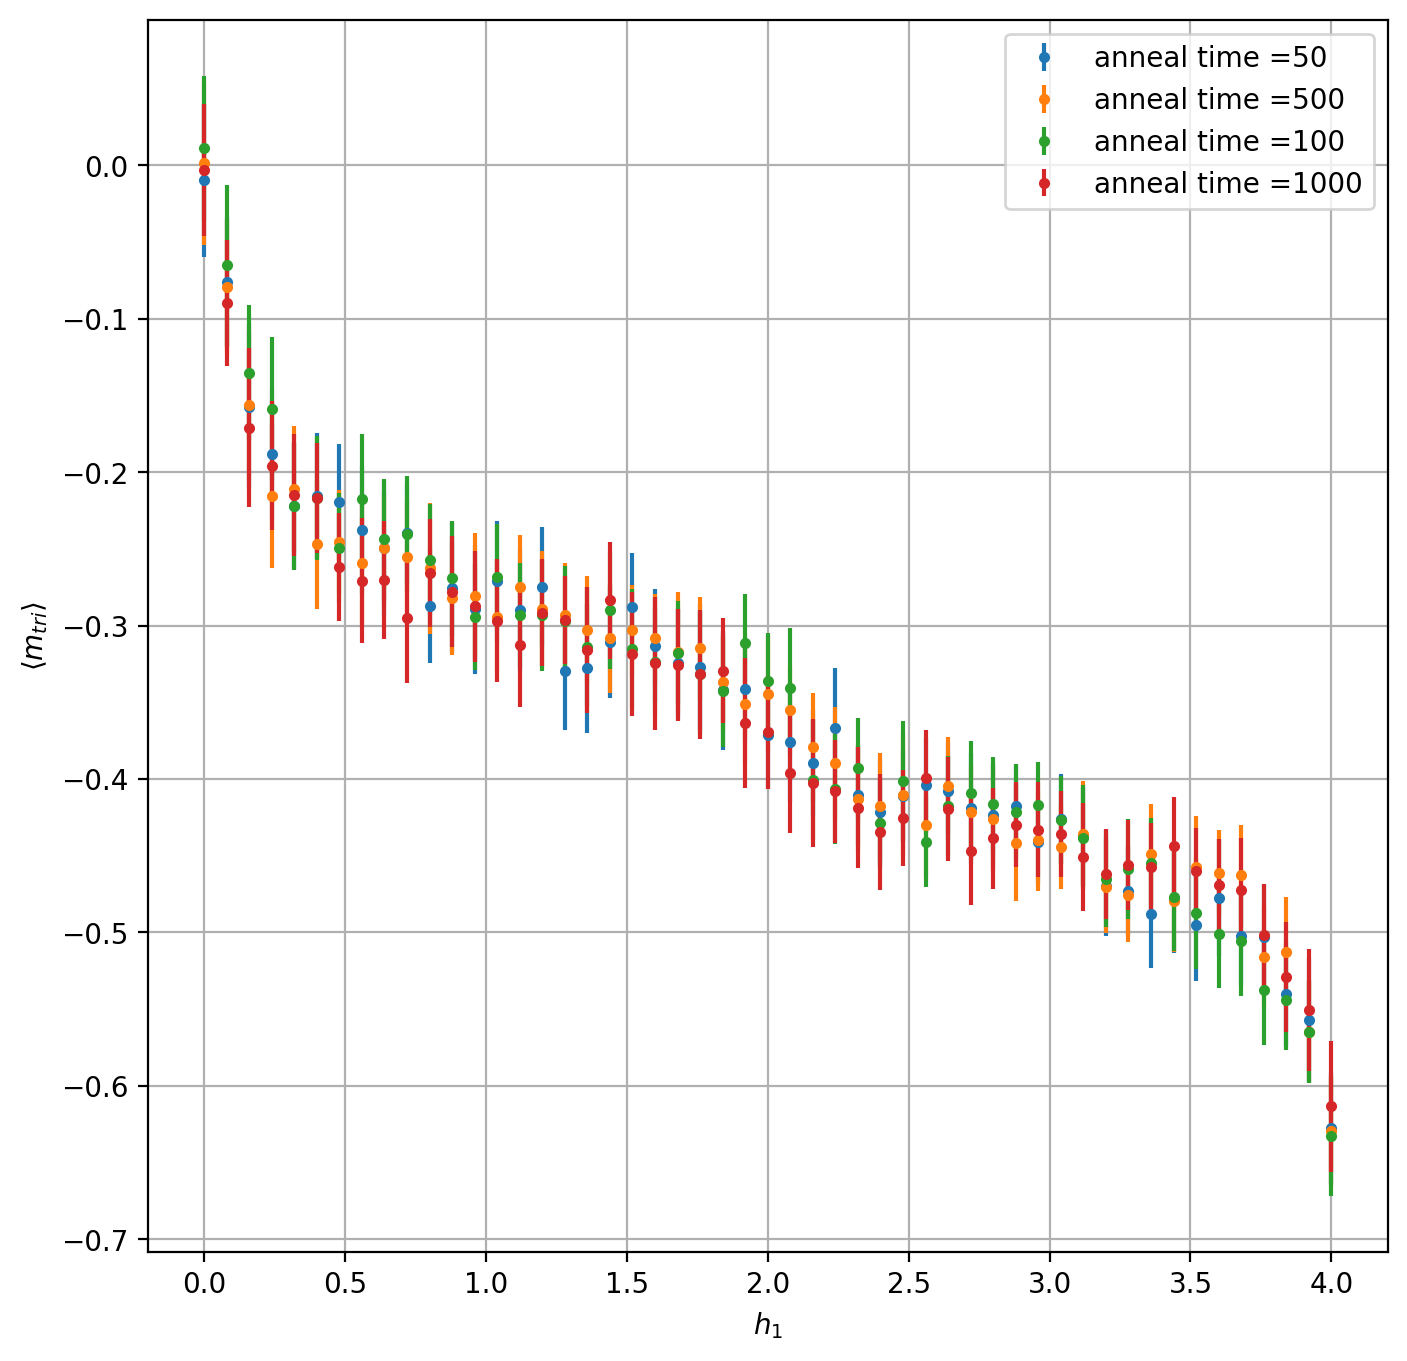

In [87]:
fig, ax = plt.subplots()
for i in range(len(bigarray)):
# for i in [1]:
#         ax.scatter(x=bigarray[i][0],y=bigarray[i][1],label="anneal time ="+str(int(anntimes[i])))
    ax.errorbar(x=bigarray[i][0],
                y=bigarray[i][1],
                yerr=bigarray[i][2],
                label="anneal time =" + str(int(anntimes[i])),
                fmt='.')
plt.xlabel(r'$h_1$')
plt.ylabel(r'$ \langle m_{tri} \rangle $')
plt.grid("on")
plt.legend()
plt.show()

# Expt 1: gamma=0 fwd anneals 4/10 runs

In [88]:
mainfolder = list(
    Path(
        '/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 410'
    ).glob('*'))

anntimes = []
bigarray = np.zeros(shape=(4, 3, 51))

anntimecount = 0
for foldername in mainfolder:
    folderlist = list(foldername.glob('*'))

    #take care of ds checkpoint folder
    if len(folderlist) != 0:
        #get anneal time from folder name
        anntime = float(
            str(foldername).split('_')[0].split('/')[-1].split('=')[1])
        anntimes.append(anntime)
        print("anntime=",anntime,"anntimecount=",anntimecount)
        print(len(folderlist),"files in the folder")

        h1_mag_arr = np.zeros(shape=(3, 51))

        #this is for anntimes where it was not necessary to split runs
        if len(folderlist) == h1_mag_arr.shape[1] + 1:
            count = 0
            for file in folderlist:
                name = os.path.basename(file)
                if name != 'regs.npz':
                    try:
                        resp, paramsarray, missingqs, twochains, nodes = open_file(
                            file)
                        h1 = float(paramsarray[1][2])
                        print("h1=",h1)
                        s = float(paramsarray[1][4])
                        k2 = float(paramsarray[1][1])
                        j = float(paramsarray[1][0])

                        h1_mag_arr[0][count] = h1

                        trimeans_h1 = []

                        for j in range(len(resp)):
                            arr = resp[j][0]
                            frequency = resp[j][2]

                            trimeans = []
                            for tri in alltrilist:
                                tripms = []
                                for qubit in tri:
                                    index = np.where(nodes == qubit)[0][0]
                                    tripms.append(arr[index])
                                #for each triangle in the lattice, average the sites and add it to the list
                                avg_over_tri = np.mean(tripms)
                                trimeans.append(avg_over_tri)
                            #after doing all the triangles for a run, there should be 56 means (56 triangles)
                            #average these and add to this list
                            avg_over_alltris = np.mean(trimeans)

                            for k in range(frequency):
                                trimeans_h1.append(avg_over_alltris)
                        if len(trimeans_h1) != 3000:
                            print(len(trimeans_h1))
                        h1_mag_arr[1][count] = np.mean(trimeans_h1)
                        h1_mag_arr[2][count] = np.std(trimeans_h1)
                        count += 1

                    except ValueError:
                        pass

#this is for anntimes where we needed to split runs
        if len(folderlist) > h1_mag_arr.shape[1] + 1:
            h1list = []
            resplist = []
            for file in folderlist:
                name = os.path.basename(file)
                if name != 'regs.npz':
                    try:
                        resp, paramsarray, missingqs, twochains, nodes = open_file(
                            file)
                        resplist.append(resp)
                        h1 = float(paramsarray[1][2])
                        h1list.append(h1)
                        s = float(paramsarray[1][4])
                        k2 = float(paramsarray[1][1])
                        j = float(paramsarray[1][0])

                        #the 2 lists, h1list and resplist now contain lists of h1 values and
                        #their corresponding response.
                        #h1list will contain some repeats.
                        #We have to concatenate the repeated h1s' responses together.
                    except ValueError:
                        pass
            h1_accounted = []
            newresps = []
            for p in range(len(h1list)):
                h1 = h1list[p]
                if h1 not in h1_accounted:
                    h1_accounted.append(h1)
                    #find all occurences of the h1
                    h1_indices = find_indices(h1list, h1)
                    #make a list of the resps for the h1
                    resps_h1 = []
                    for g in range(len(h1_indices)):
                        index = h1_indices[g]
                        resps_h1.append(resplist[index])
                    newresp = np.concatenate(resps_h1)
                    newresps.append(newresp)

            # now process the resps
            count=0
            for x in range(len(newresps)):
                h1 = h1_accounted[x]
                print("h1=",h1)
                resp = newresps[x]
                h1_mag_arr[0][count] = h1
                
                trimeans_h1 = []

                for j in range(len(resp)):
                    arr = resp[j][0]
                    frequency = resp[j][2]

                    trimeans = []
                    for tri in alltrilist:
                        tripms = []
                        for qubit in tri:
                            index = np.where(nodes == qubit)[0][0]
                            tripms.append(arr[index])
                        #for each triangle in the lattice, average the sites and add it to the list
                        avg_over_tri = np.mean(tripms)
                        trimeans.append(avg_over_tri)
                    #after doing all the triangles for a run, there should be 56 means (56 triangles)
                    #average these and add to this list
                    avg_over_alltris = np.mean(trimeans)

                    for k in range(frequency):
                        trimeans_h1.append(avg_over_alltris)
                if len(trimeans_h1) != 3000:
                    print(len(trimeans_h1))
                h1_mag_arr[1][count] = np.mean(trimeans_h1)
                h1_mag_arr[2][count] = np.std(trimeans_h1)
                count += 1


        print(h1_mag_arr)
        bigarray[anntimecount] = h1_mag_arr
        anntimecount += 1
    print("")
print("done")


anntime= 1000.0 anntimecount= 0
205 files in the folder
h1= 3.7600000000000002
h1= 1.84
h1= 0.8
h1= 2.8000000000000003
h1= 2.48
h1= 2.4
h1= 0.08
h1= 1.44
h1= 0.48
h1= 0.56
h1= 2.08
h1= 2.88
h1= 1.76
h1= 3.44
h1= 2.24
h1= 3.52
h1= 0.4
h1= 3.92
h1= 1.68
h1= 1.28
h1= 3.84
h1= 1.6
h1= 0.64
h1= 1.52
h1= 3.2800000000000002
h1= 3.2
h1= 2.0
h1= 0.72
h1= 3.04
h1= 1.04
h1= 2.96
h1= 1.12
h1= 3.68
h1= 1.2
h1= 3.6
h1= 1.92
h1= 0.0
h1= 0.32
h1= 2.72
h1= 2.64
h1= 0.96
h1= 0.16
h1= 0.88
h1= 1.36
h1= 3.12
h1= 2.32
h1= 4.0
h1= 0.24
h1= 2.56
h1= 3.36
h1= 2.16
[[ 3.76        1.84        0.8         2.8         2.48        2.4
   0.08        1.44        0.48        0.56        2.08        2.88
   1.76        3.44        2.24        3.52        0.4         3.92
   1.68        1.28        3.84        1.6         0.64        1.52
   3.28        3.2         2.          0.72        3.04        1.04
   2.96        1.12        3.68        1.2         3.6         1.92
   0.          0.32        2.72        2.64  

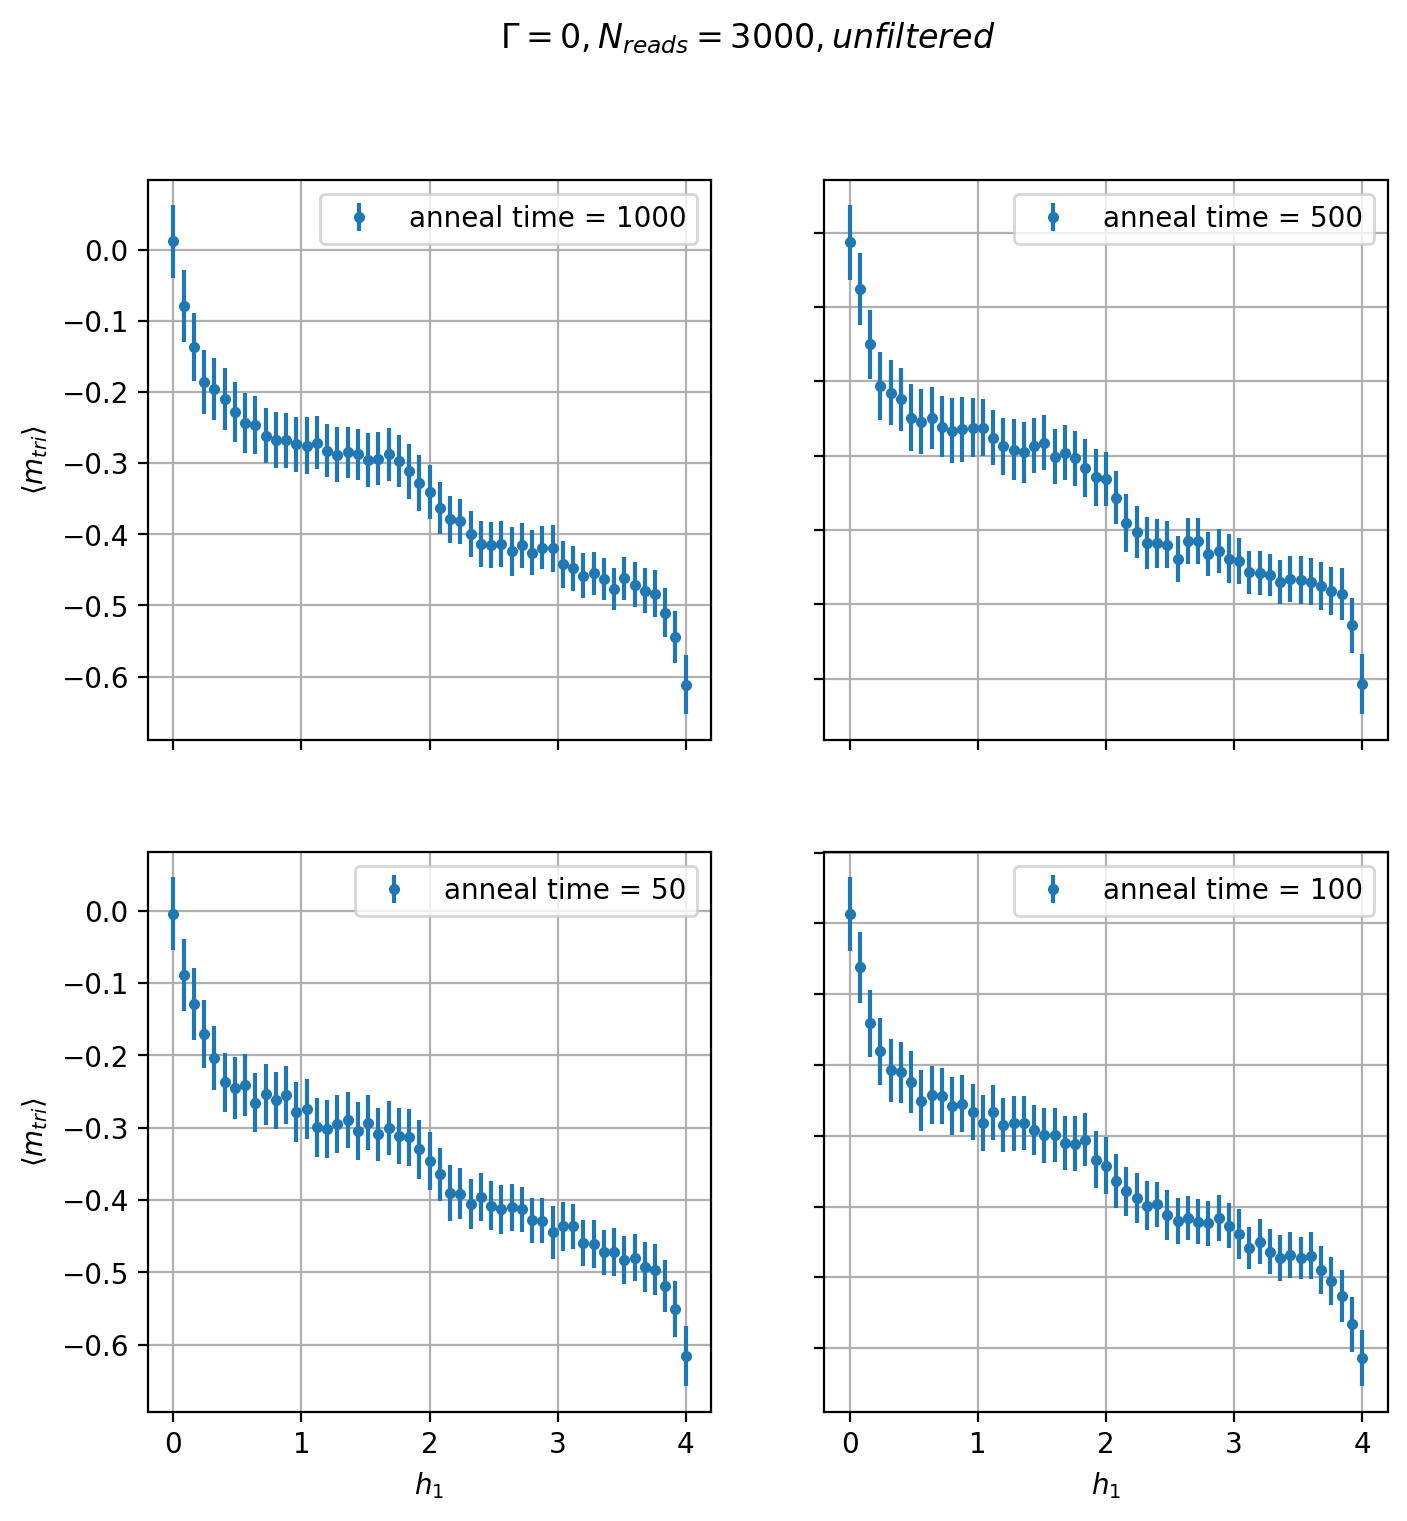

In [89]:
fig, ax = plt.subplots(2,2)
ax[0,0].errorbar(x=bigarray[0][0],
            y=bigarray[0][1],
            yerr=bigarray[0][2],
            label="anneal time = " + str(int(anntimes[0])),
            fmt='.')
ax[1,0].errorbar(x=bigarray[1][0],
            y=bigarray[1][1],
            yerr=bigarray[1][2],
            label="anneal time = " + str(int(anntimes[1])),
            fmt='.')
ax[0,1].errorbar(x=bigarray[2][0],
            y=bigarray[2][1],
            yerr=bigarray[2][2],
            label="anneal time = " + str(int(anntimes[2])),
            fmt='.')
ax[1,1].errorbar(x=bigarray[3][0],
            y=bigarray[3][1],
            yerr=bigarray[3][2],
            label="anneal time = " + str(int(anntimes[3])),
            fmt='.')

xlabel=r'$h_1$'
ylabel=r'$ \langle m_{tri} \rangle $'
for axis in ax.flat:
    axis.set(xlabel=xlabel, ylabel=ylabel)
    axis.grid()
    axis.label_outer()
    axis.legend()

fig.suptitle(r'$ \Gamma = 0, N_{reads} = 3000, unfiltered $')
# plt.legend()
plt.show()

In [100]:
mainfolder = list(
    Path(
        '/Users/prathunarasimhan/Library/CloudStorage/GoogleDrive-pn187@scarletmail.rutgers.edu/My Drive/Zephyr Kagome prelim/best plateau 410'
    ).glob('*'))

anntimes = []
bigarray = np.zeros(shape=(4, 3, 51))

anntimecount = 0
for foldername in mainfolder:
    folderlist = list(foldername.glob('*'))

    #take care of ds checkpoint folder
    if len(folderlist) != 0:
        #get anneal time from folder name
        anntime = float(
            str(foldername).split('_')[0].split('/')[-1].split('=')[1])
        anntimes.append(anntime)
        print("anntime=",anntime,"anntimecount=",anntimecount)
        print(len(folderlist),"files in the folder")

        h1_mag_arr = np.zeros(shape=(3, 51))

        #this is for anntimes where it was not necessary to split runs
        if len(folderlist) == h1_mag_arr.shape[1] + 1:
            count = 0
            for file in folderlist:
                name = os.path.basename(file)
                if name != 'regs.npz':
                    try:
                        resp, paramsarray, missingqs, twochains, nodes = open_file(
                            file)
                        h1 = float(paramsarray[1][2])
                        print(h1)
                        s = float(paramsarray[1][4])
                        k2 = float(paramsarray[1][1])
                        j = float(paramsarray[1][0])

                        h1_mag_arr[0][count] = h1

                        trimeans_h1 = []
                        
                        energies=[]
                        for j in range(len(resp)):
                            arr = resp[j][0]
                            frequency = resp[j][2]
                            energy=resp[j][1]
                            energies.append(energy)
                        minenergy=np.min(energies)
                        indices_minenergy=find_indices(energies,minenergy)
                        num_minenergy=len(indices_minenergy)
                        print("h1=",h1,num_minenergy,"instances of min energy")
                        
                        for j in range(len(resp)):
                            arr = resp[j][0]
                            frequency = resp[j][2]
                            energy=resp[j][1]
                            if energy==minenergy:

                                trimeans = []
                                for tri in alltrilist:
                                    tripms = []
                                    for qubit in tri:
                                        index = np.where(nodes == qubit)[0][0]
                                        tripms.append(arr[index])
                                    #for each triangle in the lattice, average the sites and add it to the list
                                    avg_over_tri = np.mean(tripms)
                                    trimeans.append(avg_over_tri)
                                #after doing all the triangles for a run, there should be 56 means (56 triangles)
                                #average these and add to this list
                                avg_over_alltris = np.mean(trimeans)

                                for k in range(frequency):
                                    trimeans_h1.append(avg_over_alltris)
                                    
                        if len(trimeans_h1) != num_minenergy:
                            print("error:",len(trimeans_h1))
                        h1_mag_arr[1][count] = np.mean(trimeans_h1)
                        h1_mag_arr[2][count] = np.std(trimeans_h1)
                        count += 1

                    except ValueError:
                        pass

#this is for anntimes where we needed to split runs
        if len(folderlist) > h1_mag_arr.shape[1] + 1:
            h1list = []
            resplist = []
            for file in folderlist:
                name = os.path.basename(file)
                if name != 'regs.npz':
                    try:
                        resp, paramsarray, missingqs, twochains, nodes = open_file(
                            file)
                        resplist.append(resp)
                        h1 = float(paramsarray[1][2])
                        h1list.append(h1)
                        s = float(paramsarray[1][4])
                        k2 = float(paramsarray[1][1])
                        j = float(paramsarray[1][0])

                        #the 2 lists, h1list and resplist now contain lists of h1 values and
                        #their corresponding response.
                        #h1list will contain some repeats.
                        #We have to concatenate the repeated h1s' responses together.
                    except ValueError:
                        pass
            h1_accounted = []
            newresps = []
            for p in range(len(h1list)):
                h1 = h1list[p]
                if h1 not in h1_accounted:
                    h1_accounted.append(h1)
                    #find all occurences of the h1
                    h1_indices = find_indices(h1list, h1)
                    #make a list of the resps for the h1
                    resps_h1 = []
                    for g in range(len(h1_indices)):
                        index = h1_indices[g]
                        resps_h1.append(resplist[index])
                    newresp = np.concatenate(resps_h1)
                    newresps.append(newresp)

            # now process the resps
            count=0
            for x in range(len(newresps)):
                h1 = h1_accounted[x]
                print(h1)
                resp = newresps[x]
                h1_mag_arr[0][count] = h1
                
                energies=[]
                for j in range(len(resp)):
                    arr = resp[j][0]
                    frequency = resp[j][2]
                    energy=resp[j][1]
                    energies.append(energy)
                minenergy=np.min(energies)
                indices_minenergy=find_indices(energies,minenergy)
                num_minenergy=len(indices_minenergy)
                print("h1=",h1,num_minenergy,"instances of min energy")
                
                
                trimeans_h1 = []

                for j in range(len(resp)):
                    arr = resp[j][0]
                    frequency = resp[j][2]
                    energy=resp[j][1]
                    if energy==minenergy:

                        trimeans = []
                        for tri in alltrilist:
                            tripms = []
                            for qubit in tri:
                                index = np.where(nodes == qubit)[0][0]
                                tripms.append(arr[index])
                            #for each triangle in the lattice, average the sites and add it to the list
                            avg_over_tri = np.mean(tripms)
                            trimeans.append(avg_over_tri)
                        #after doing all the triangles for a run, there should be 56 means (56 triangles)
                        #average these and add to this list
                        avg_over_alltris = np.mean(trimeans)
                        for k in range(frequency):
                            trimeans_h1.append(avg_over_alltris)
                if len(trimeans_h1) != num_minenergy:
                    print("error:",len(trimeans_h1))
                h1_mag_arr[1][count] = np.mean(trimeans_h1)
                h1_mag_arr[2][count] = np.std(trimeans_h1)
                count += 1


        print(h1_mag_arr)
        bigarray[anntimecount] = h1_mag_arr
        anntimecount += 1
    print("")
print("done")


anntime= 1000.0 anntimecount= 0
205 files in the folder
3.7600000000000002
h1= 3.7600000000000002 1 instances of min energy
1.84
h1= 1.84 1 instances of min energy
0.8
h1= 0.8 3 instances of min energy
2.8000000000000003
h1= 2.8000000000000003 7 instances of min energy
2.48
h1= 2.48 1 instances of min energy
2.4
h1= 2.4 1 instances of min energy
0.08
h1= 0.08 1 instances of min energy
1.44
h1= 1.44 23 instances of min energy
0.48
h1= 0.48 1 instances of min energy
0.56
h1= 0.56 88 instances of min energy
2.08
h1= 2.08 1 instances of min energy
2.88
h1= 2.88 52 instances of min energy
error: 55
1.76
h1= 1.76 5 instances of min energy
3.44
h1= 3.44 2 instances of min energy
2.24
h1= 2.24 1 instances of min energy
3.52
h1= 3.52 8 instances of min energy
error: 13
0.4
h1= 0.4 3 instances of min energy
3.92
h1= 3.92 1 instances of min energy
1.68
h1= 1.68 12 instances of min energy
1.28
h1= 1.28 4 instances of min energy
3.84
h1= 3.84 1 instances of min energy
1.6
h1= 1.6 1 instances of mi

1.36
h1= 1.36 2 instances of min energy
3.2
h1= 3.2 2 instances of min energy
error: 3
2.24
h1= 2.24 7 instances of min energy
0.88
h1= 0.88 7 instances of min energy
1.04
h1= 1.04 2 instances of min energy
0.0
h1= 0.0 2994 instances of min energy
1.12
h1= 1.12 2 instances of min energy
0.48
h1= 0.48 1 instances of min energy
1.6
h1= 1.6 7 instances of min energy
2.88
h1= 2.88 67 instances of min energy
error: 77
2.4
h1= 2.4 1 instances of min energy
2.48
h1= 2.48 1 instances of min energy
3.68
h1= 3.68 1 instances of min energy
3.36
h1= 3.36 216 instances of min energy
error: 334
2.8000000000000003
h1= 2.8000000000000003 18 instances of min energy
error: 23
2.32
h1= 2.32 1 instances of min energy
1.52
h1= 1.52 1 instances of min energy
0.32
h1= 0.32 2 instances of min energy
2.72
h1= 2.72 15 instances of min energy
3.7600000000000002
h1= 3.7600000000000002 8 instances of min energy
0.96
h1= 0.96 2 instances of min energy
4.0
h1= 4.0 2991 instances of min energy
2.96
h1= 2.96 1 instanc

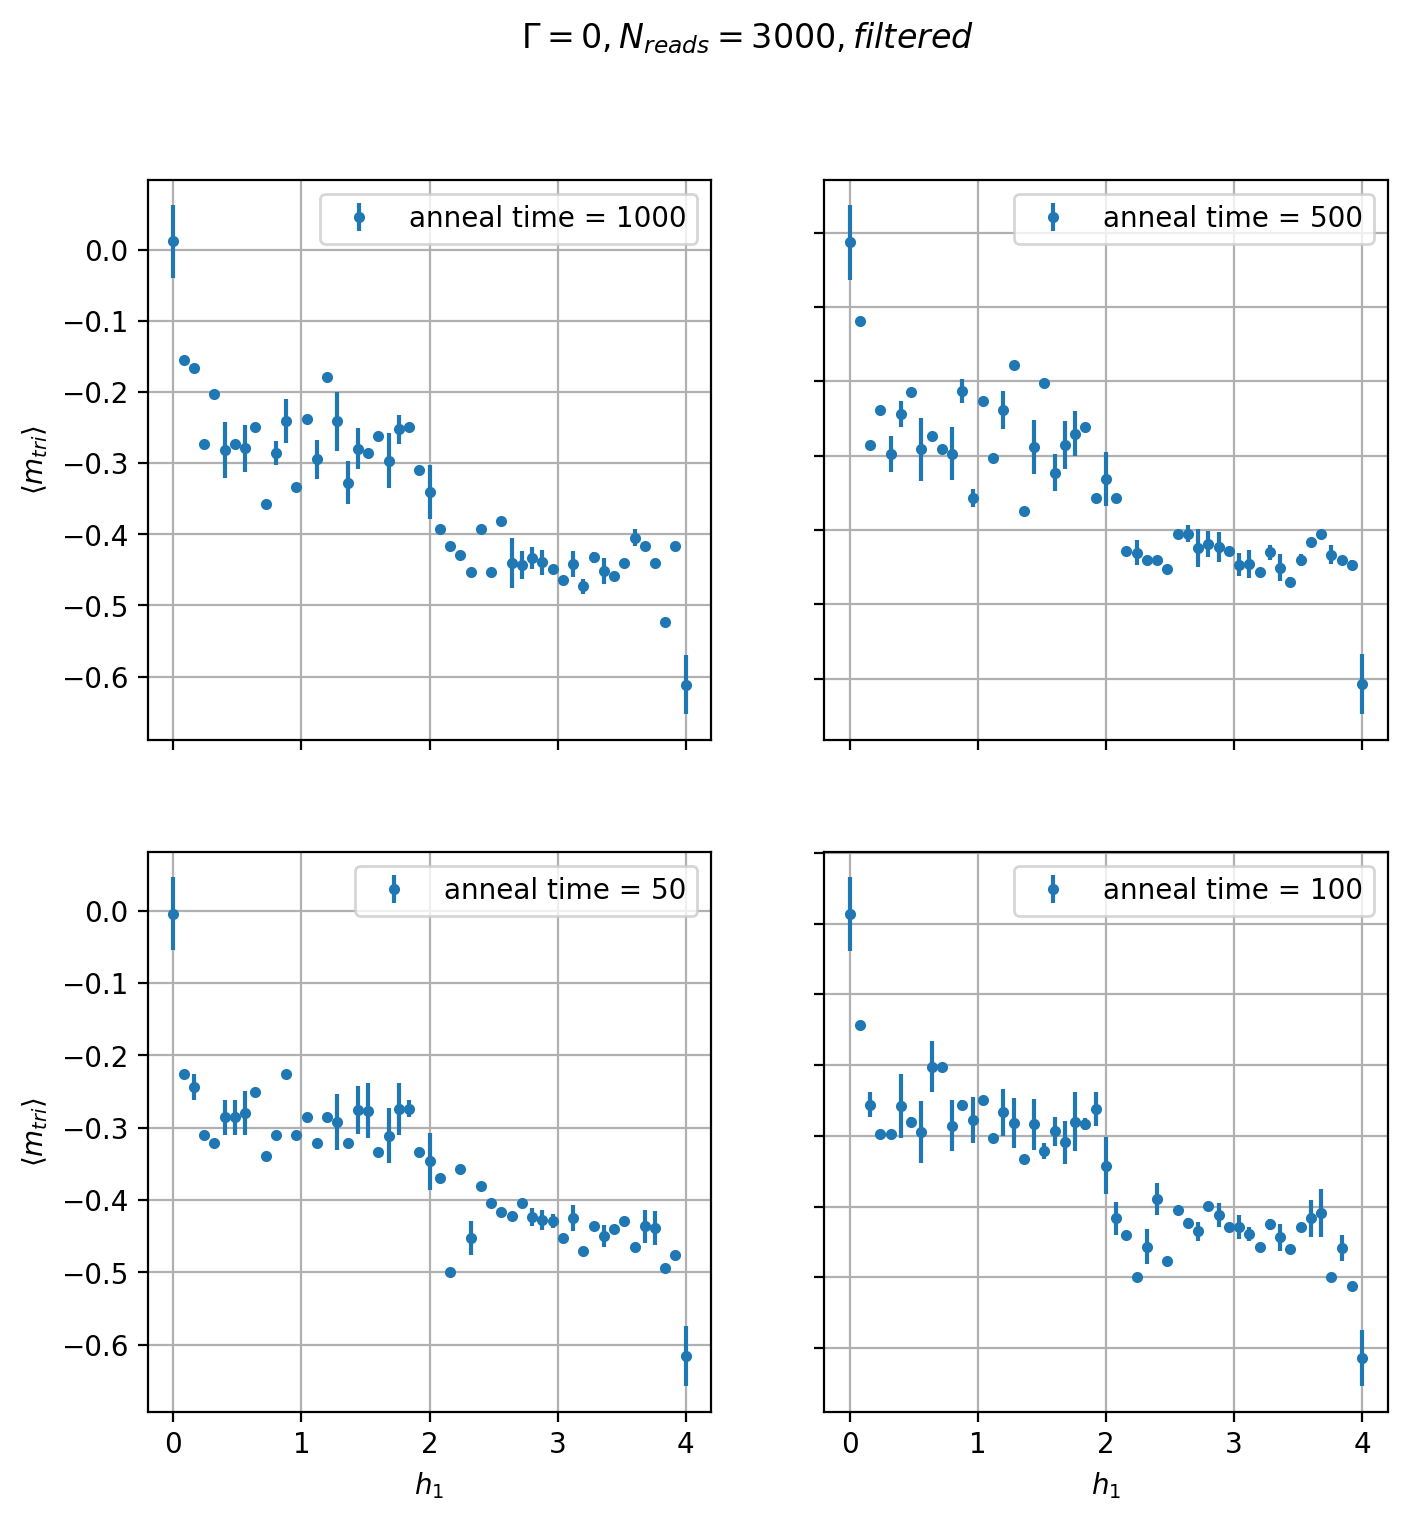

In [102]:
fig, ax = plt.subplots(2,2)
ax[0,0].errorbar(x=bigarray[0][0],
            y=bigarray[0][1],
            yerr=bigarray[0][2],
            label="anneal time = " + str(int(anntimes[0])),
            fmt='.')
ax[1,0].errorbar(x=bigarray[1][0],
            y=bigarray[1][1],
            yerr=bigarray[1][2],
            label="anneal time = " + str(int(anntimes[1])),
            fmt='.')
ax[0,1].errorbar(x=bigarray[2][0],
            y=bigarray[2][1],
            yerr=bigarray[2][2],
            label="anneal time = " + str(int(anntimes[2])),
            fmt='.')
ax[1,1].errorbar(x=bigarray[3][0],
            y=bigarray[3][1],
            yerr=bigarray[3][2],
            label="anneal time = " + str(int(anntimes[3])),
            fmt='.')

xlabel=r'$h_1$'
ylabel=r'$ \langle m_{tri} \rangle $'
for axis in ax.flat:
    axis.set(xlabel=xlabel, ylabel=ylabel)
    axis.grid()
    axis.label_outer()
    axis.legend()

fig.suptitle(r'$ \Gamma = 0, N_{reads} = 3000, filtered $')
# plt.legend()
plt.show()